In [1]:
%matplotlib inline



In [2]:
!pip install tqdm

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
fima_claim_dataset = pd.read_parquet('./FimaNfipClaims.parquet')
df_claims = fima_claim_dataset.copy()


In [7]:
df_claims.head()

agricultureStructureIndicator                         asOfDate  \
0                          False 2020-12-11 16:25:40.587000+00:00   
1                          False 2020-11-13 14:50:38.288000+00:00   
2                          False 2020-03-27 12:15:45.887000+00:00   
3                          False 2020-03-27 12:15:45.887000+00:00   
4                          False 2020-03-26 12:56:27.476000+00:00   

   basementEnclosureCrawlspaceType  policyCount  crsClassificationCode  \
0                              0.0            1                    NaN   
1                              2.0            1                    NaN   
2                              0.0            1                    NaN   
3                              0.0            1                    NaN   
4                              0.0            1                    NaN   

   dateOfLoss  elevatedBuildingIndicator elevationCertificateIndicator  \
0  2020-09-16                       True                          None   
1  2020-09-16                      False                          None   
2  2016-08-02                      False                             2   
3  2014-09-08                      False                             2   
4  2018-01-09                       True                          None   

  elevationDifference baseFloodElevation  ... rentalPropertyIndicator  state  \
0                 4.0               10.0  ...                   False     AL   
1                 6.0               10.0  ...                   False     AL   
2                None               None  ...                   False     AZ   
3                None               None  ...                   False     AZ   
4                None               None  ...                   False     CA   

            reportedCity reportedZipCode countyCode  censusTract  \
0  Currently Unavailable           36542      01003  01003011407   
1  Currently Unavailable           36542      01003  01003011407   
2  Currently Unavailable           85015      04013  04013108902   
3  Currently Unavailable           85015      04013  04013108902   
4  Currently Unavailable           93108      06083  06083001402   

   censusBlockGroupFips  latitude  longitude  \
0          010030114072      30.3      -87.7   
1          010030114073      30.3      -87.7   
2          040131089022      33.5     -112.1   
3          040131089022      33.5     -112.1   
4          060830014022      34.4     -119.6   

                                                  id  
0  b'\x9f5\xfa\xc5\xc2\xd0O\x06\xb2\xe8cbH3\x14\xe7'  
1  b'\xdc\x90\xbf\x00\xa7\xb3D\x8a\xa7\xd9\xc2}\x...  
2     b'&x\xf7\xa0,\xe7@R\x96\xac\x86k\x87\xf8\xcb9'  
3  b'\x92\xc06"\xba`I\xc7\xac\x00Q\x80g\xdd\xab\xa1'  
4  b'\xb1\xcd\xf6\xdf\x828M\xbd\x8c]\xd9\xe8\x89\...  

[5 rows x 73 columns]

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
missing_values_df = pd.DataFrame({
    "Missing Values": df_claims.isna().sum(),
    "Percentage Missing": (df_claims.isna().sum() / len(df_claims)) * 100
})

missing_values_df


Missing Values  Percentage Missing
agricultureStructureIndicator                            0            0.000000
asOfDate                                                 0            0.000000
basementEnclosureCrawlspaceType                    1890227           69.827477
policyCount                                              0            0.000000
crsClassificationCode                              2157275           79.692582
dateOfLoss                                               0            0.000000
elevatedBuildingIndicator                                0            0.000000
elevationCertificateIndicator                      2108944           77.907171
elevationDifference                                1974428           72.937973
baseFloodElevation                                 2048159           75.661693
ratedFloodZone                                      139026            5.135804
houseWorship                                             0            0.000000
locationOfContents                                  915021           33.802082
lowestAdjacentGrade                                2195120           81.090626
lowestFloorElevation                               2066858           76.352459
numberOfFloorsInTheInsuredBuilding                   17248            0.637164
nonProfitIndicator                                       0            0.000000
obstructionType                                    1197522           44.238041
occupancyType                                          572            0.021130
originalConstructionDate                              1784            0.065903
originalNBDate                                          78            0.002881
amountPaidOnBuildingClaim                           568127           20.987360
amountPaidOnContentsClaim                           568127           20.987360
amountPaidOnIncreasedCostOfComplianceClaim          568127           20.987360
postFIRMConstructionIndicator                            0            0.000000
rateMethod                                           49543            1.830184
smallBusinessIndicatorBuilding                           0            0.000000
totalBuildingInsuranceCoverage                           2            0.000074
totalContentsInsuranceCoverage                          11            0.000406
yearOfLoss                                               0            0.000000
primaryResidenceIndicator                                0            0.000000
buildingDamageAmount                                603708           22.301769
buildingDeductibleCode                              315141           11.641724
netBuildingPaymentAmount                                 0            0.000000
buildingPropertyValue                               603708           22.301769
causeOfDamage                                        38129            1.408536
condominiumCoverageTypeCode                          37453            1.383563
contentsDamageAmount                               1588438           58.678993
contentsDeductibleCode                              560327           20.699218
netContentsPaymentAmount                                 0            0.000000
contentsPropertyValue                              1588438           58.678993
disasterAssistanceCoverageRequired                  386762           14.287498
eventDesignationNumber                             2523790           93.232129
ficoNumber                                          977756           36.119595
floodCharacteristicsIndicator                      2667143           98.527778
floodWaterDuration                                  273414           10.100274
floodproofedIndicator                                    0            0.000000
floodEvent                                          763944           28.221098
iccCoverage                                         973083           35.946969
netIccPaymentAmount                                      0            0.000000
nfipRatedCommun

In [10]:
nfip_df = df_claims.copy()


In [11]:
# Code to inspect the nonPaymentReasonBuilding and nonPaymentReasonContents columns

# Print a summary of unique values (including nulls) for nonPaymentReasonBuilding
print("=== nonPaymentReasonBuilding Summary ===")
print(nfip_df['nonPaymentReasonBuilding'].value_counts(dropna=False))
print("\n=== nonPaymentReasonBuilding: Detailed Counts ===")
building_none_count = (nfip_df['nonPaymentReasonBuilding'] == "None").sum()
building_null_count = nfip_df['nonPaymentReasonBuilding'].isnull().sum()
print(f"'None' as string: {building_none_count}")
print(f"Null values: {building_null_count}")

# Print a summary of unique values (including nulls) for nonPaymentReasonContents
print("\n=== nonPaymentReasonContents Summary ===")
print(nfip_df['nonPaymentReasonContents'].value_counts(dropna=False))
print("\n=== nonPaymentReasonContents: Detailed Counts ===")
contents_none_count = (nfip_df['nonPaymentReasonContents'] == "None").sum()
contents_null_count = nfip_df['nonPaymentReasonContents'].isnull().sum()
print(f"'None' as string: {contents_none_count}")
print(f"Null values: {contents_null_count}")


=== nonPaymentReasonBuilding Summary ===
nonPaymentReasonBuilding
None    2109976
97       130060
01       126488
06       116977
20        79750
99        47328
98        37197
08        21851
16        14145
02         7680
03         2713
05         2704
14         1812
17         1374
11         1371
07         1192
15         1138
04         1022
18         1001
12          432
19          384
09          174
10          128
13           99
Name: count, dtype: int64

=== nonPaymentReasonBuilding: Detailed Counts ===
'None' as string: 0
Null values: 2109976

=== nonPaymentReasonContents Summary ===
nonPaymentReasonContents
None    1857417
97       290068
20       259445
01        91164
06        82288
99        48168
98        39441
08        17575
16         9407
02         4117
07         1366
03         1325
05         1073
15          747
18          687
11          619
17          468
14          436
04          372
19          261
10          199
12          192
09          1

# Filter data to keep only records within 10 year range, Creating the target variable and dropping the columns used to create the variable to avoid data leakage/cheating during model training

In [13]:
# Step 1: Copy original data
nfip_df = df_claims.copy()

# Step 2: Filter to overlapping date range & ensure datetime type
def filter_dateOfLoss_to_overlap(df, start_year=2014, end_year=2024):
    """
    Filters the NFIP dataset to only include records where dateOfLoss falls between 
    start_year and end_year (inclusive). Ensures the column is datetime.
    """
    df = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df["dateOfLoss"]):
        df["dateOfLoss"] = pd.to_datetime(df["dateOfLoss"], errors="coerce")

    mask = (df["dateOfLoss"].dt.year >= start_year) & (df["dateOfLoss"].dt.year <= end_year)
    filtered_df = df.loc[mask].copy()
    print(f"Filtered records: {len(filtered_df)} out of {len(df)} remain within {start_year}-{end_year}.")
    return filtered_df

# Apply filtering
nfip_valid = filter_dateOfLoss_to_overlap(nfip_df, start_year=2014, end_year=2024)

# Step 3: Create target column (claim_approval)
nfip_valid["claim_approval"] = np.where(
    (nfip_valid["netBuildingPaymentAmount"] > 0) | (nfip_valid["netContentsPaymentAmount"] > 0),
    1,
    0
)

# Check class distribution
approved_count = nfip_valid["claim_approval"].sum()
denied_count = len(nfip_valid) - approved_count
print("Approved claims count:", approved_count)
print("Denied claims count:", denied_count)

# Step 4: Drop columns used in target creation (and ID) 
cols_to_drop = ['id']
               #  ,'netBuildingPaymentAmount', 'netContentsPaymentAmount', 'amountPaidOnContentsClaim',
               #  'amountPaidOnBuildingClaim','contentsDamageAmount','buildingDamageAmount','amountPaidOnIncreasedCostOfComplianceClaim'
               # ,'netIccPaymentAmount','contentsReplacementCost','replacementCostBasis','buildingReplacementCost']
nfip_valid = nfip_valid.drop(columns=cols_to_drop, errors="ignore")
print("Dropped columns:", cols_to_drop)
print("New shape of nfip_valid:", nfip_valid.shape)


Filtered records: 625054 out of 2706996 remain within 2014-2024.
Approved claims count: 487699
Denied claims count: 137355
Dropped columns: ['id']
New shape of nfip_valid: (625054, 73)


In [14]:
type(nfip_df["nonPaymentReasonBuilding"][0])

NoneType

# Dropping high null % columns

In [16]:
def drop_high_null_columns(df, threshold=0.70, exclude_cols=None):
    """
    Drops columns from df where the percentage of missing values exceeds the specified threshold,
    except for columns listed in exclude_cols.
    
    Parameters:
      df (pd.DataFrame): Input DataFrame.
      threshold (float): Maximum allowed fraction of missing values (e.g., 0.70 means 70%).
      exclude_cols (list): List of column names that should not be dropped even if they exceed the threshold.
      
    Returns:
      pd.DataFrame: DataFrame after dropping high-null columns.
    """
    if exclude_cols is None:
        exclude_cols = []
    
    # Calculate the fraction of missing values for each column.
    missing_pct = df.isna().mean()
    
    # Identify columns that exceed the threshold.
    cols_to_drop = missing_pct[missing_pct > threshold].index.tolist()
    
    # Exclude the columns specified by the user from being dropped.
    cols_to_drop = [col for col in cols_to_drop if col not in exclude_cols]
    
    print(f"Dropping {len(cols_to_drop)} columns with > {threshold*100}% missing values (excluding {exclude_cols}):")
    for col in cols_to_drop:
        print(f"  - {col}")
        
    return df.drop(cols_to_drop, axis=1)

# Assuming nfip_valid is your DataFrame of valid claims (filtered according to your criteria)
# and that non-valid claims are stored separately.
target_cols = [
    "nonPaymentReasonBuilding", 
    "nonPaymentReasonContents"
]

# Step 1: Drop columns with high missingness (using a 70% threshold)
# Excluding target_cols so they are always preserved.
nfip_valid = drop_high_null_columns(nfip_valid, threshold=0.70, exclude_cols=target_cols)



Dropping 4 columns with > 70.0% missing values (excluding ['nonPaymentReasonBuilding', 'nonPaymentReasonContents']):
  - elevationCertificateIndicator
  - obstructionType
  - eventDesignationNumber
  - floodCharacteristicsIndicator


# Converting object type numeric columns (containing numeric values as strings) to numeric data type.

In [19]:
nfip_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625054 entries, 0 to 2690103
Data columns (total 69 columns):
 #   Column                                      Non-Null Count   Dtype              
---  ------                                      --------------   -----              
 0   agricultureStructureIndicator               625054 non-null  bool               
 1   asOfDate                                    625054 non-null  datetime64[us, UTC]
 2   basementEnclosureCrawlspaceType             298174 non-null  float64            
 3   policyCount                                 625054 non-null  int16              
 4   crsClassificationCode                       422052 non-null  float64            
 5   dateOfLoss                                  625054 non-null  datetime64[ns]     
 6   elevatedBuildingIndicator                   625054 non-null  bool               
 7   elevationDifference                         218321 non-null  object             
 8   baseFloodElevation          

In [20]:
nfip_valid["buildingDescriptionCode"].value_counts()

buildingDescriptionCode
1.0     496839
8.0      26005
10.0      2445
5.0       2031
2.0       1752
6.0       1214
7.0        804
3.0        602
11.0       348
4.0        174
9.0        171
12.0       138
13.0       113
14.0         5
15.0         4
18.0         2
21.0         2
16.0         1
Name: count, dtype: int64

In [22]:
def convert_fields_to_numeric(df):
    """
    Converts specified fields in the DataFrame to numeric data types and
    converts all boolean columns to numeric (0/1).

    Parameters:
      df (pd.DataFrame): Input DataFrame (e.g., nfip_valid)
      
    The following columns are converted to numeric:
      - amountPaidOnBuildingClaim
      - amountPaidOnContentsClaim
      - amountPaidOnIncreasedCostOfComplianceClaim
      - netIccPaymentAmount
      - longitude
      - latitude
      
    Also, any columns with boolean dtype are converted to numeric values.
    
    Returns:
      pd.DataFrame: DataFrame with specified fields and boolean columns converted.
    """
    # List of columns to convert to numeric
    cols_to_convert = [
        "netBuildingPaymentAmount",
        "netContentsPaymentAmount",
        "amountPaidOnBuildingClaim", 
        "amountPaidOnContentsClaim", 
        "amountPaidOnIncreasedCostOfComplianceClaim",
        "netIccPaymentAmount",
        "longitude", 
        "latitude"
    ]
    
    # Convert specified columns to numeric (non-convertible values become NaN)
    for col in cols_to_convert:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Convert all boolean columns to numeric (True -> 1, False -> 0)
    for col in df.columns:
        if df[col].dtype == 'bool':
            df[col] = df[col].astype(int)
    
    return df

# Example usage:
nfip_valid = convert_fields_to_numeric(nfip_valid)


In [23]:
def downcast_float_columns(df):
    """
    Downcasts float64 columns to float32 for memory efficiency.
    """
    float_cols = df.select_dtypes(include=['float64']).columns
    for col in float_cols:
        df[col] = pd.to_numeric(df[col], downcast='float')
    return df

# Optionally apply downcasting after your other conversions:
nfip_valid = downcast_float_columns(nfip_valid)


# Converting remaining date fields to datetime

In [27]:
type(nfip_valid["dateOfLoss"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:

# Define the list of date columns (adjust the list if you have additional date fields)
date_columns = ['asOfDate', 'originalConstructionDate', 'originalNBDate']

# Convert each specified column to datetime
for col in date_columns:
    if col in nfip_valid.columns:
        nfip_valid[col] = pd.to_datetime(nfip_valid[col], errors='coerce')
        print(f"Converted column '{col}' to datetime.")


Converted column 'asOfDate' to datetime.
Converted column 'originalConstructionDate' to datetime.
Converted column 'originalNBDate' to datetime.


In [29]:
nfip_valid["asOfDate"][0]

Timestamp('2020-12-11 16:25:40.587000+0000', tz='UTC')

# Separating Numeric and Categorical Variables for structured analysis

In [31]:
def separate_numeric_categorical(df, force_categorical=None):
    """
    Separates the DataFrame columns into numeric and categorical lists.
    
    Parameters:
      df (pd.DataFrame): Input DataFrame.
      force_categorical (list): List of column names to force into categorical,
                                regardless of their dtype.
      force_object (list): List of column names that should be converted to object
                           type before separation.
      
    Returns:
      tuple: Two lists (numeric_cols, categorical_cols).
    """
    if force_categorical is None:
        force_categorical = []
    df_copy = df.copy()
    
    # Convert forced object columns to string type.
    for col in force_categorical:
        if col in df_copy.columns:
            df_copy[col] = df_copy[col].astype(str)
    
    numeric_cols = []
    categorical_cols = []
    
    for col in df_copy.columns:
        if col in force_categorical:
            categorical_cols.append(col)
        elif (pd.api.types.is_numeric_dtype(df_copy[col]) or 
              pd.api.types.is_bool_dtype(df_copy[col]) or 
              pd.api.types.is_datetime64_any_dtype(df_copy[col])):
            numeric_cols.append(col)
        else:
            categorical_cols.append(col)
    
    return numeric_cols, categorical_cols

# Example usage:
# Suppose we want to force "buildingDescriptionCode" (and perhaps "disasterAssistanceCoverageRequired")
# to be treated as categorical even if they are stored as numeric.
force_cat = ["buildingDescriptionCode", "disasterAssistanceCoverageRequired","obstructionType","occupancyType","basementEnclosureCrawlspaceType"]


numeric_cols, categorical_cols = separate_numeric_categorical(nfip_valid, force_categorical=force_cat)

print("\nNumeric Columns ("+ str(len(numeric_cols)) +"):")
for col in numeric_cols:
    print(f"  - {col}")

print("\nCategorical Columns ("+ str(len(categorical_cols)) +"):")
for col in categorical_cols:
    print(f"  - {col}")



Numeric Columns (41):
  - agricultureStructureIndicator
  - asOfDate
  - policyCount
  - crsClassificationCode
  - dateOfLoss
  - elevatedBuildingIndicator
  - houseWorship
  - locationOfContents
  - numberOfFloorsInTheInsuredBuilding
  - nonProfitIndicator
  - originalConstructionDate
  - originalNBDate
  - amountPaidOnBuildingClaim
  - amountPaidOnContentsClaim
  - amountPaidOnIncreasedCostOfComplianceClaim
  - postFIRMConstructionIndicator
  - smallBusinessIndicatorBuilding
  - totalBuildingInsuranceCoverage
  - totalContentsInsuranceCoverage
  - yearOfLoss
  - primaryResidenceIndicator
  - buildingDamageAmount
  - netBuildingPaymentAmount
  - buildingPropertyValue
  - contentsDamageAmount
  - netContentsPaymentAmount
  - contentsPropertyValue
  - ficoNumber
  - floodWaterDuration
  - floodproofedIndicator
  - iccCoverage
  - netIccPaymentAmount
  - numberOfUnits
  - buildingReplacementCost
  - contentsReplacementCost
  - stateOwnedIndicator
  - waterDepth
  - rentalPropertyIndicat

In [32]:
nfip_valid[numeric_cols].shape

(625054, 41)

## Engineering 2 new features based on their descriptions (Executed after visualisation of numeric_outlier code)

In [34]:
# def engineer_reissued_check_features(df):
#     """
#     Engineers binary indicator features for reissued checks based on negative payment amounts.
    
#     For amountPaidOnBuildingClaim:
#       - If the value is negative, reissuedCheckBuilding is set to 1, else 0.
    
#     For amountPaidOnContentsClaim:
#       - If the value is negative, reissuedCheckContents is set to 1, else 0.
    
#     These features capture the domain signal that a check was reissued.
#     They should be engineered before any outlier handling modifies the payment fields.
    
#     Parameters:
#       df (pd.DataFrame): DataFrame containing the payment fields.
      
#     Returns:
#       pd.DataFrame: Updated DataFrame with the new binary indicator columns added.
#     """
#     df_updated = df.copy()
    
#     if "amountPaidOnBuildingClaim" in df_updated.columns:
#         # Create indicator: 1 if negative, 0 otherwise
#         df_updated["reissuedCheckBuilding"] = (df_updated["amountPaidOnBuildingClaim"] < 0).astype(int)
#     else:
#         print("Column 'amountPaidOnBuildingClaim' not found in the DataFrame.")
    
#     if "amountPaidOnContentsClaim" in df_updated.columns:
#         # Create indicator: 1 if negative, 0 otherwise
#         df_updated["reissuedCheckContents"] = (df_updated["amountPaidOnContentsClaim"] < 0).astype(int)
#     else:
#         print("Column 'amountPaidOnContentsClaim' not found in the DataFrame.")
    
#     return df_updated

# # Example usage:
# # Apply this function to your working DataFrame (nfip_valid)
# nfip_valid = engineer_reissued_check_features(nfip_valid)

# # Verify the new features
# print(nfip_valid[["amountPaidOnBuildingClaim", "reissuedCheckBuilding",
#                    "amountPaidOnContentsClaim", "reissuedCheckContents"]].head())


## Engineering 1 new feature 'reissuedCheckICC' based on its description (Executed after visualisation of numeric_outlier code)

In [36]:
# def engineer_reissued_check_icc(df):
#     """
#     Engineers a binary indicator for reissued ICC checks based on netIccPaymentAmount.
    
#     A negative netIccPaymentAmount indicates that a check was not cashed and had to be reissued.
#     This function creates a new column 'reissuedCheckICC' that is set to:
#       - 1 if netIccPaymentAmount is negative,
#       - 0 otherwise.
    
#     Parameters:
#       df (pd.DataFrame): Input DataFrame containing the 'netIccPaymentAmount' column.
      
#     Returns:
#       pd.DataFrame: DataFrame with a new binary column 'reissuedCheckICC' added.
#     """
#     df_updated = df.copy()
#     if "netIccPaymentAmount" in df_updated.columns:
#         df_updated["reissuedCheckICC"] = (df_updated["netIccPaymentAmount"] < 0).astype(int)
#         print("Engineered 'reissuedCheckICC' column based on netIccPaymentAmount negative values.")
#     else:
#         print("Column 'netIccPaymentAmount' not found in DataFrame.")
#     return df_updated

# # Example usage:
# # Run this right after creating the target variable:
# nfip_valid = engineer_reissued_check_icc(nfip_valid)

# # Verify the new column:
# print(nfip_valid[["netIccPaymentAmount", "reissuedCheckICC"]].head())


# Creating a Heatmap with only continuous numeric variables before Outlier handling, imputation and encoding.

In [38]:
# Select all numeric columns from the encoded DataFrame
all_numeric = nfip_valid.select_dtypes(include=['number'])

# Filter out binary dummy columns (assuming binary dummies only contain 0 and 1)
# We'll keep only columns that have more than 2 unique values.
continuous_cols = [col for col in all_numeric.columns if all_numeric[col].nunique() > 2]



41


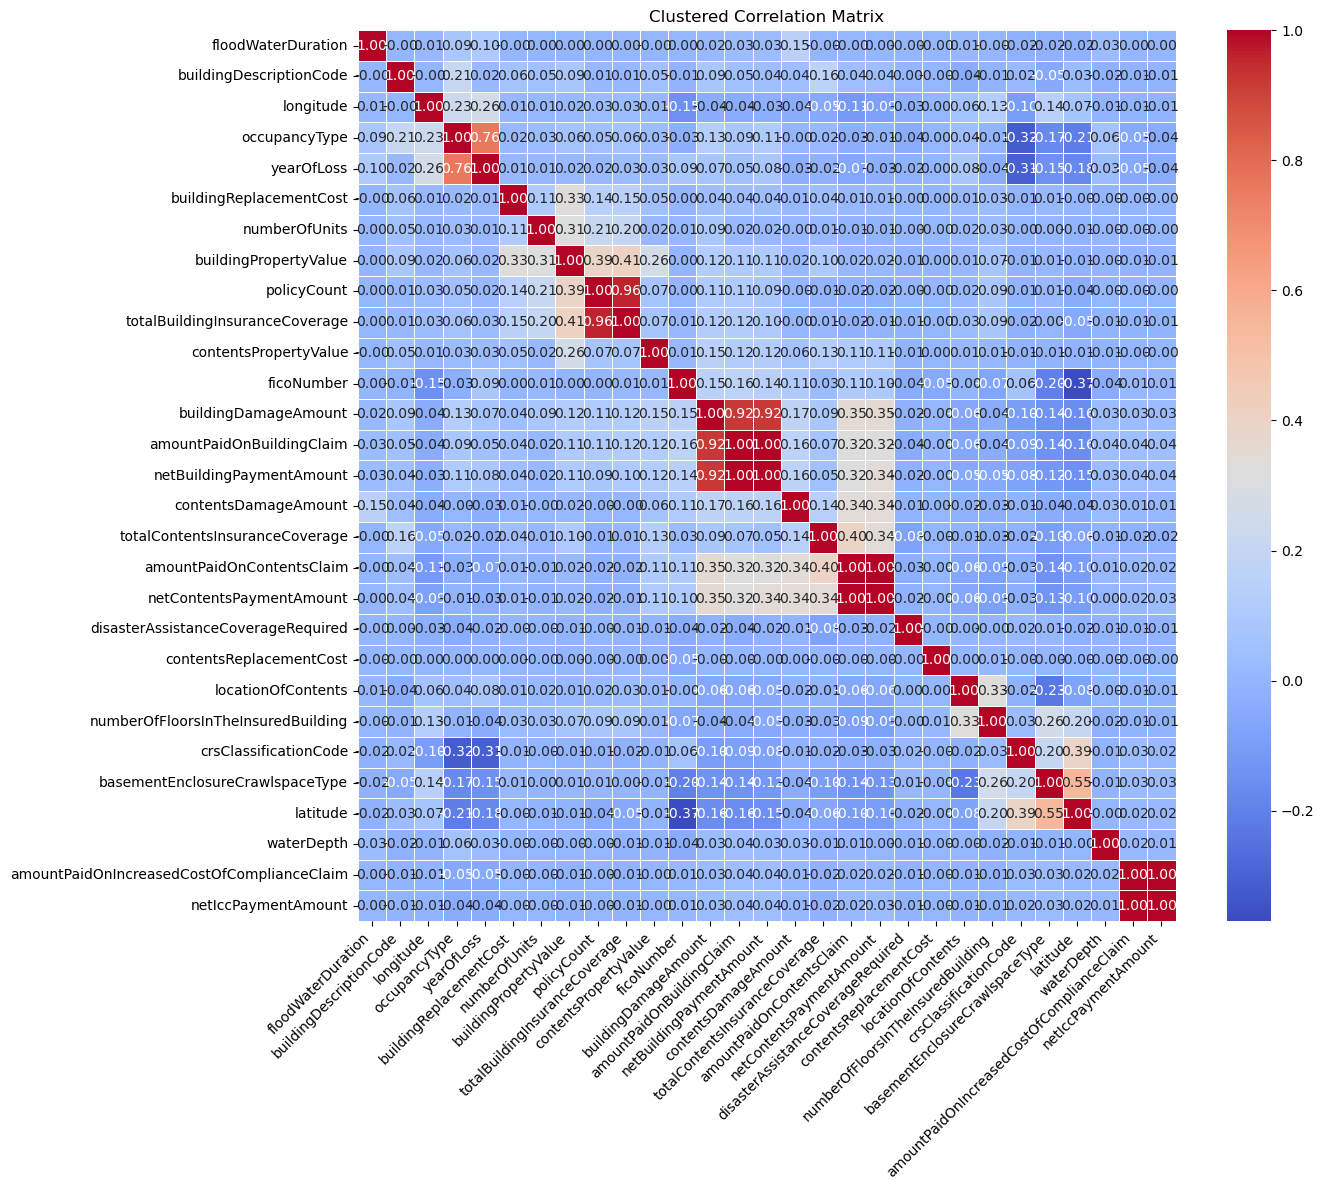

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


# Identify numeric columns in nfip_valid
numeric_cols = nfip_valid.select_dtypes(include=[np.number]).columns.tolist()
print(len(numeric_cols))

# Scale the numeric features
scaler = StandardScaler()
scaled_values = scaler.fit_transform(nfip_valid[continuous_cols])
scaled_df = pd.DataFrame(scaled_values, columns=continuous_cols, index=nfip_valid.index)

# Compute the correlation matrix on the scaled data
corr_matrix_scaled = scaled_df.corr()

def plot_clustered_heatmap(corr, figsize=(14,12), decimals=2):
    # Fill any NaN values in the correlation matrix (if any) with 0
    corr = corr.fillna(0)
    
    # Force symmetry by averaging with its transpose
    corr = (corr + corr.T) / 2

    # Convert correlation matrix to condensed distance for clustering
    d = 1 - corr  # distance = 1 - correlation
    linkage = sch.linkage(sch.distance.squareform(d), method='average')
    
    # Get cluster order
    dendro = sch.dendrogram(linkage, no_plot=True)
    idx = dendro['leaves']
    
    # Reorder the correlation matrix
    corr_reordered = corr.iloc[idx, :].iloc[:, idx]
    corr_reordered_rounded = corr_reordered.round(decimals)
    
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_reordered_rounded, 
        annot=True, 
        cmap='coolwarm', 
        fmt=".2f", 
        linewidths=0.5
    )
    plt.title("Clustered Correlation Matrix")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Usage:
plot_clustered_heatmap(corr_matrix_scaled)


In [40]:
def get_highly_correlated_pairs(df, corr_matrix, threshold=0.90001):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                corr_pairs.append((col1, col2, corr_value))

    # Sort by absolute correlation value (descending)
    corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
    return corr_pairs_sorted

# Example usage:
high_corr_pairs = get_highly_correlated_pairs(nfip_valid[continuous_cols], corr_matrix_scaled)
for col1, col2, corr in high_corr_pairs:
    print(f"{col1} ↔ {col2} : correlation = {corr:.3f}")


amountPaidOnContentsClaim ↔ netContentsPaymentAmount : correlation = 1.000
amountPaidOnBuildingClaim ↔ netBuildingPaymentAmount : correlation = 1.000
amountPaidOnIncreasedCostOfComplianceClaim ↔ netIccPaymentAmount : correlation = 1.000
policyCount ↔ totalBuildingInsuranceCoverage : correlation = 0.964
buildingDamageAmount ↔ netBuildingPaymentAmount : correlation = 0.925
amountPaidOnBuildingClaim ↔ buildingDamageAmount : correlation = 0.924


For the binary classification baseline using NFIP data we are droppingg all fields that are either directly post-approval or are highly redundant with respect to the key pre-approval predictors. 

Payment-related fields (post-approval):
amountPaidOnContentsClaim
netContentsPaymentAmount
amountPaidOnBuildingClaim
netBuildingPaymentAmount
amountPaidOnIncreasedCostOfComplianceClaim
netIccPaymentAmount
Redundant coverage field:
policyCount (since it’s highly correlated with totalBuildingInsuranceCoverage and less direct)
Non-payment reason fields (since they leak target information):
nonPaymentReasonBuilding
nonPaymentReasonContents

This left us you with the following cost/damage/coverage fields that are conceptually pre-approval and aligned with the field descriptions:
buildingDamageAmount (actual cash value damage to the main property)
contentsDamageAmount (actual cash value damage to contents)
totalBuildingInsuranceCoverage (total insurance coverage on the building)


In [42]:
cols_to_drop = [
    "amountPaidOnContentsClaim",
    "netContentsPaymentAmount",
    "amountPaidOnBuildingClaim",
    "netBuildingPaymentAmount",
    "amountPaidOnIncreasedCostOfComplianceClaim",
    "netIccPaymentAmount",
    "policyCount",
    "nonPaymentReasonBuilding",
    "nonPaymentReasonContents",
    "buildingDamageAmount",
    "contentsDamageAmount"
]

nfip_valid = nfip_valid.drop(columns=cols_to_drop, errors="ignore")
print("Dropped columns:", cols_to_drop)
print("New shape of nfip_valid:", nfip_valid.shape)


Dropped columns: ['amountPaidOnContentsClaim', 'netContentsPaymentAmount', 'amountPaidOnBuildingClaim', 'netBuildingPaymentAmount', 'amountPaidOnIncreasedCostOfComplianceClaim', 'netIccPaymentAmount', 'policyCount', 'nonPaymentReasonBuilding', 'nonPaymentReasonContents', 'buildingDamageAmount', 'contentsDamageAmount']
New shape of nfip_valid: (625054, 58)


In [43]:
nfip_valid.shape

(625054, 58)

# Visualizing outliers for Domain Context investigation 
## A: Numeric Fields


--- Summary Statistics for agricultureStructureIndicator ---
count    625054.000000
mean          0.000506
std           0.022479
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: agricultureStructureIndicator, dtype: float64


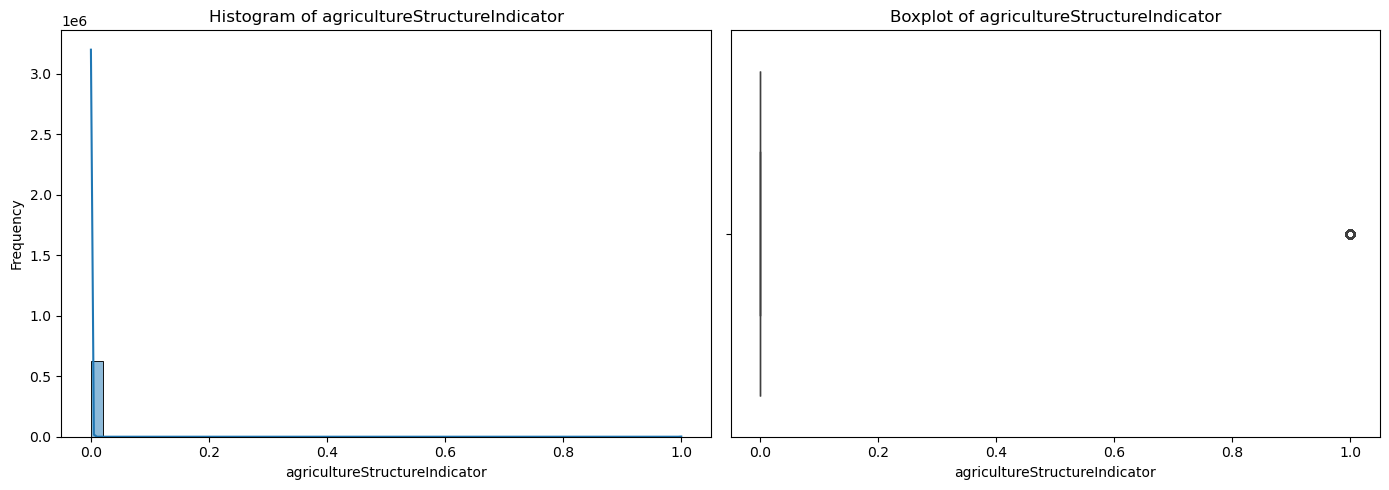

Skipping datetime field 'asOfDate' - please use visualize_date_fields() for date visualization.

--- Summary Statistics for policyCount ---
count    625054.000000
mean          1.634244
std           9.872511
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        1090.000000
Name: policyCount, dtype: float64


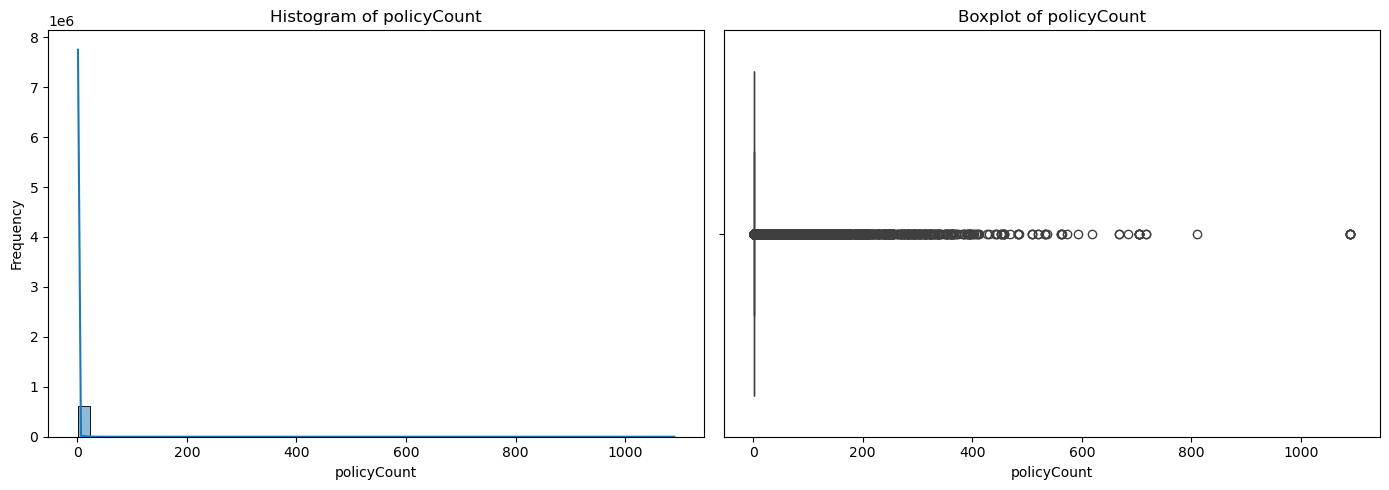


--- Summary Statistics for crsClassificationCode ---
count    422052.000000
mean          6.277203
std           1.423504
min           1.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          10.000000
Name: crsClassificationCode, dtype: float64


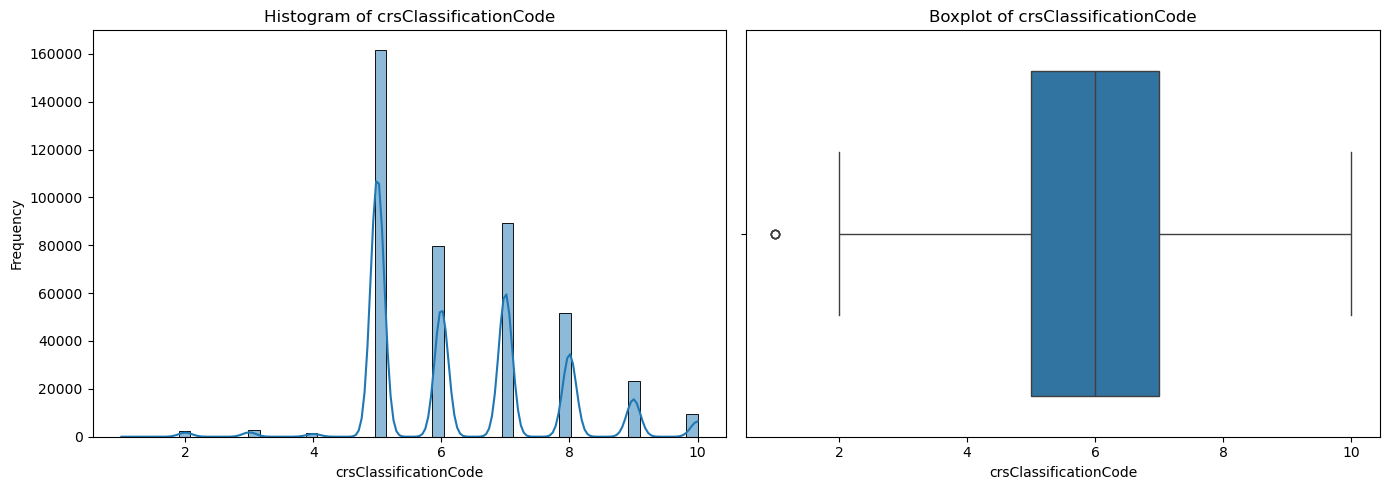

Skipping datetime field 'dateOfLoss' - please use visualize_date_fields() for date visualization.

--- Summary Statistics for elevatedBuildingIndicator ---
count    625054.000000
mean          0.229476
std           0.420496
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: elevatedBuildingIndicator, dtype: float64


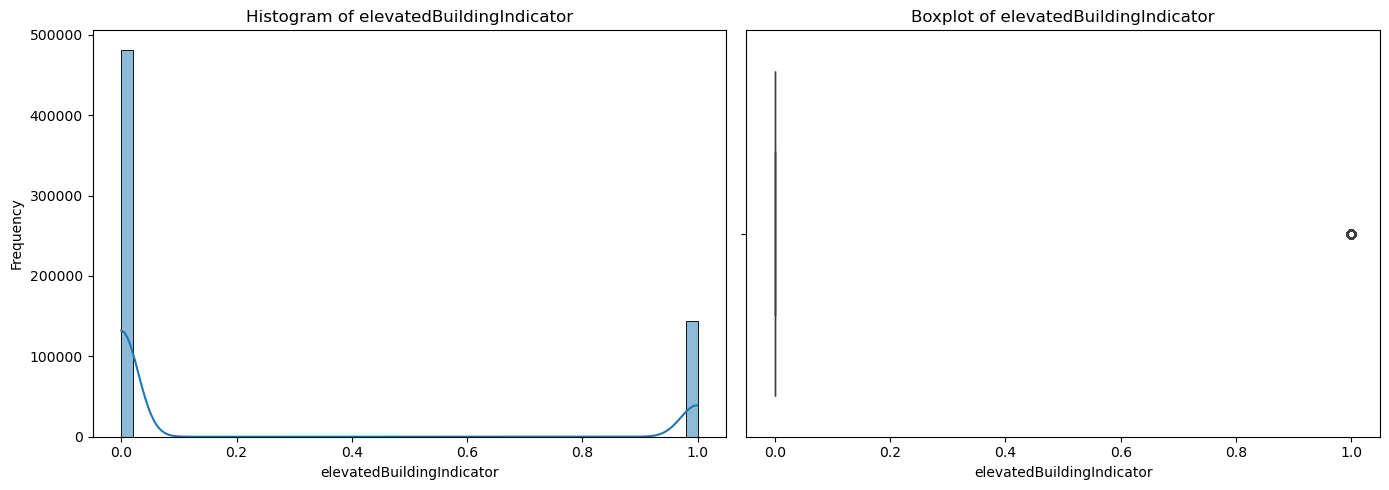


--- Summary Statistics for houseWorship ---
count    625054.000000
mean          0.002717
std           0.052050
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: houseWorship, dtype: float64


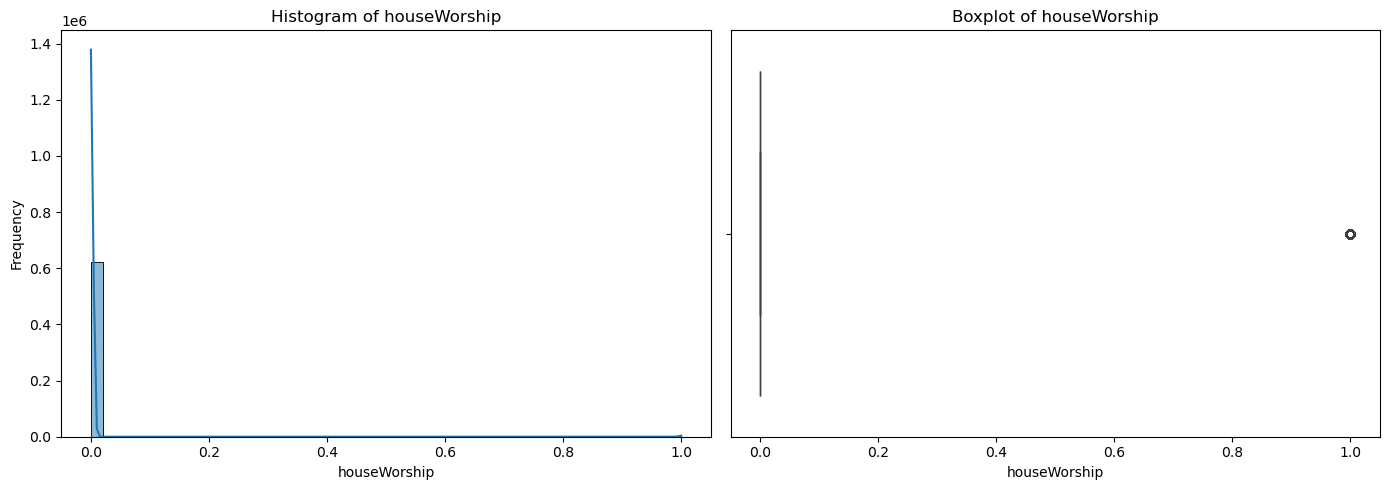


--- Summary Statistics for locationOfContents ---
count    406241.000000
mean          3.529484
std           1.267642
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           7.000000
Name: locationOfContents, dtype: float64


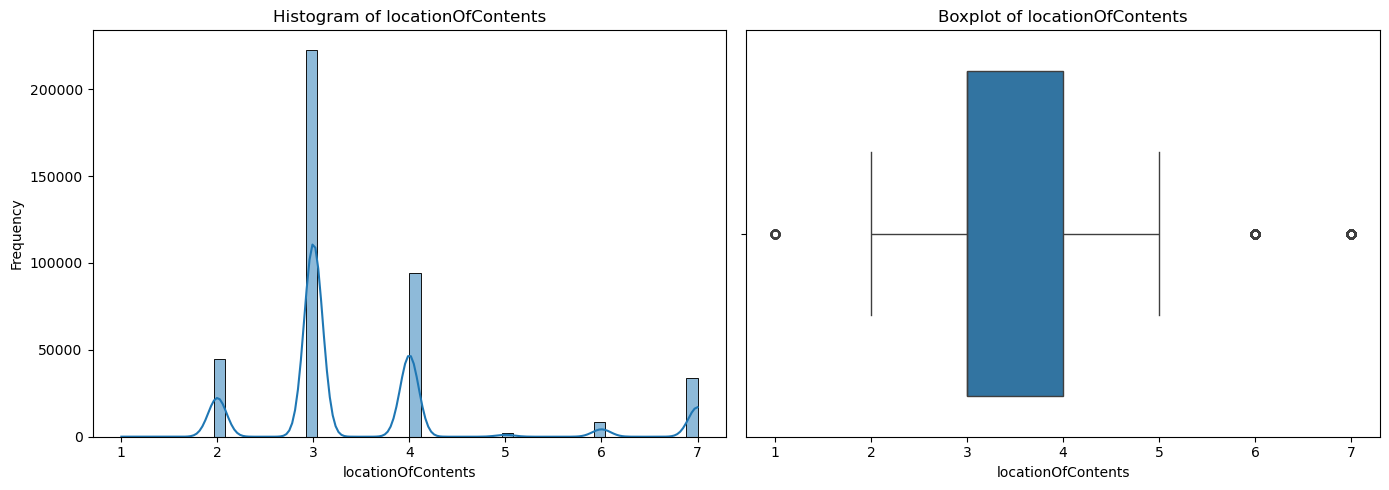


--- Summary Statistics for numberOfFloorsInTheInsuredBuilding ---
count    621664.000000
mean          1.571595
std           0.834171
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: numberOfFloorsInTheInsuredBuilding, dtype: float64


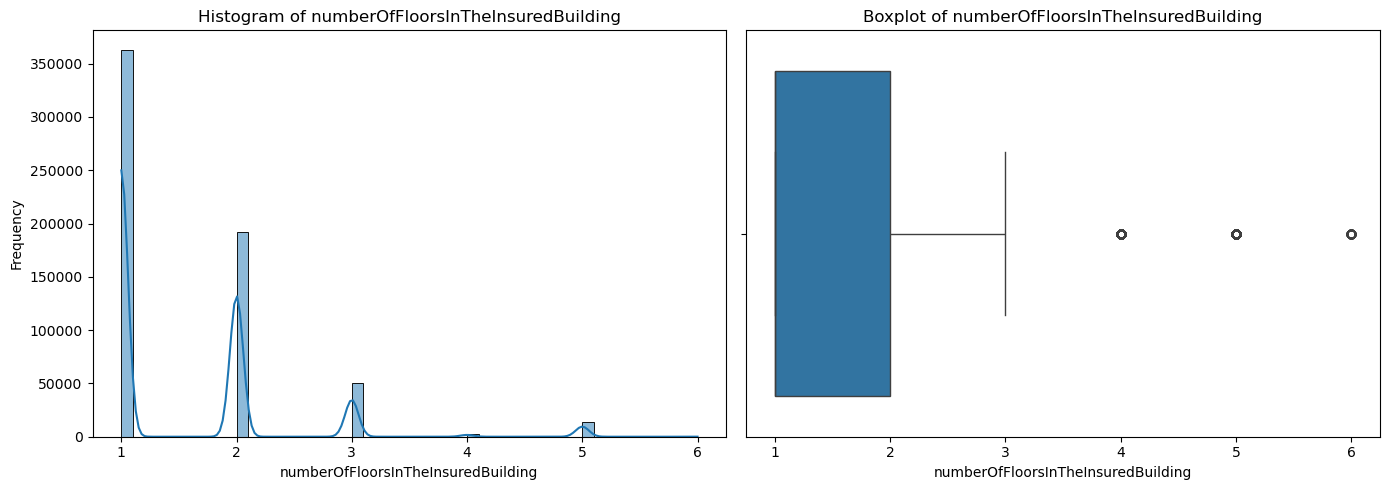


--- Summary Statistics for nonProfitIndicator ---
count    625054.000000
mean          0.005611
std           0.074694
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: nonProfitIndicator, dtype: float64


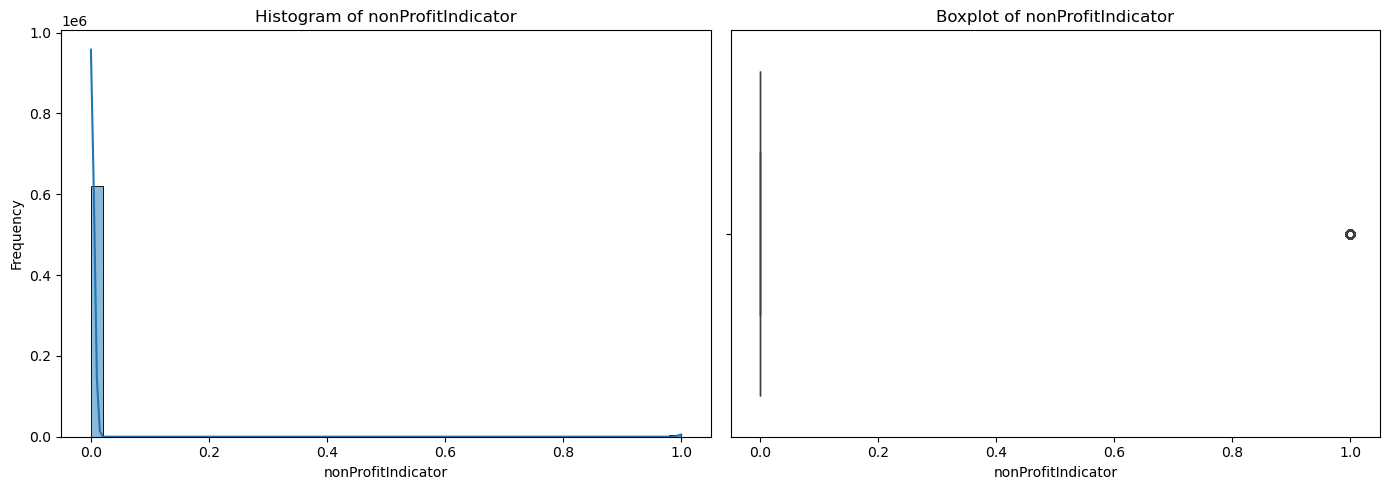

Skipping datetime field 'originalConstructionDate' - please use visualize_date_fields() for date visualization.
Skipping datetime field 'originalNBDate' - please use visualize_date_fields() for date visualization.

--- Summary Statistics for amountPaidOnIncreasedCostOfComplianceClaim ---
count    526984.000000
mean        169.010291
std        2141.729526
min       -6450.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       60000.000000
Name: amountPaidOnIncreasedCostOfComplianceClaim, dtype: float64


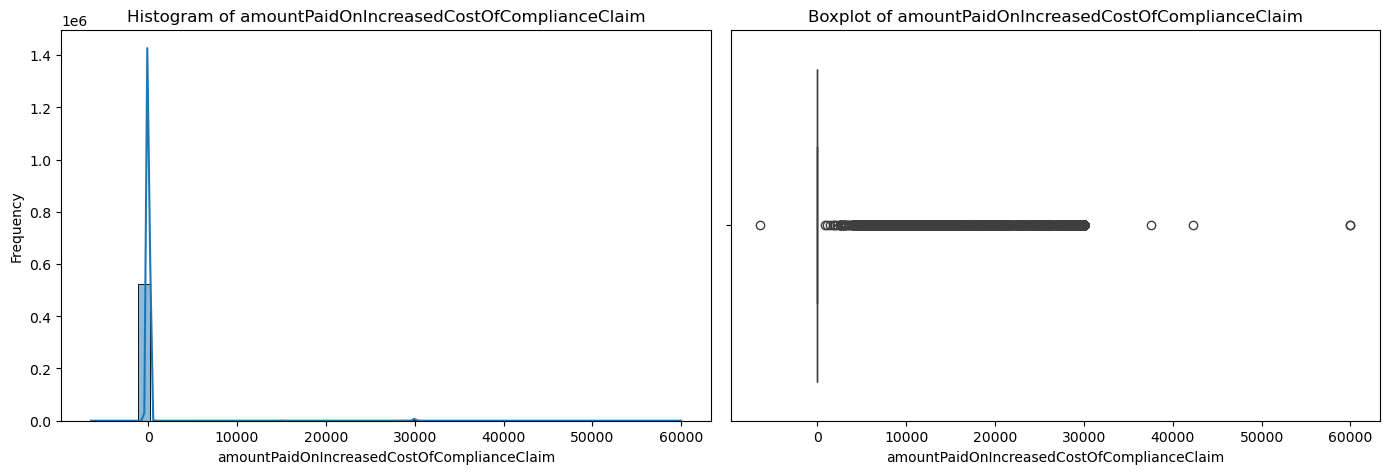


--- Summary Statistics for postFIRMConstructionIndicator ---
count    625054.000000
mean          0.396665
std           0.489206
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: postFIRMConstructionIndicator, dtype: float64


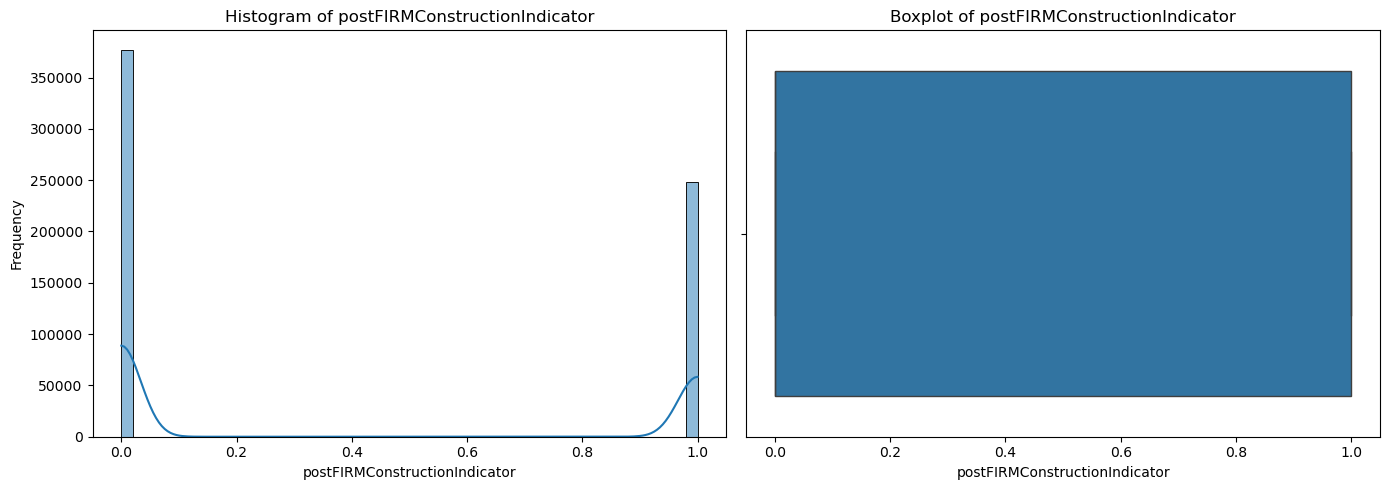


--- Summary Statistics for smallBusinessIndicatorBuilding ---
count    625054.000000
mean          0.021726
std           0.145788
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: smallBusinessIndicatorBuilding, dtype: float64


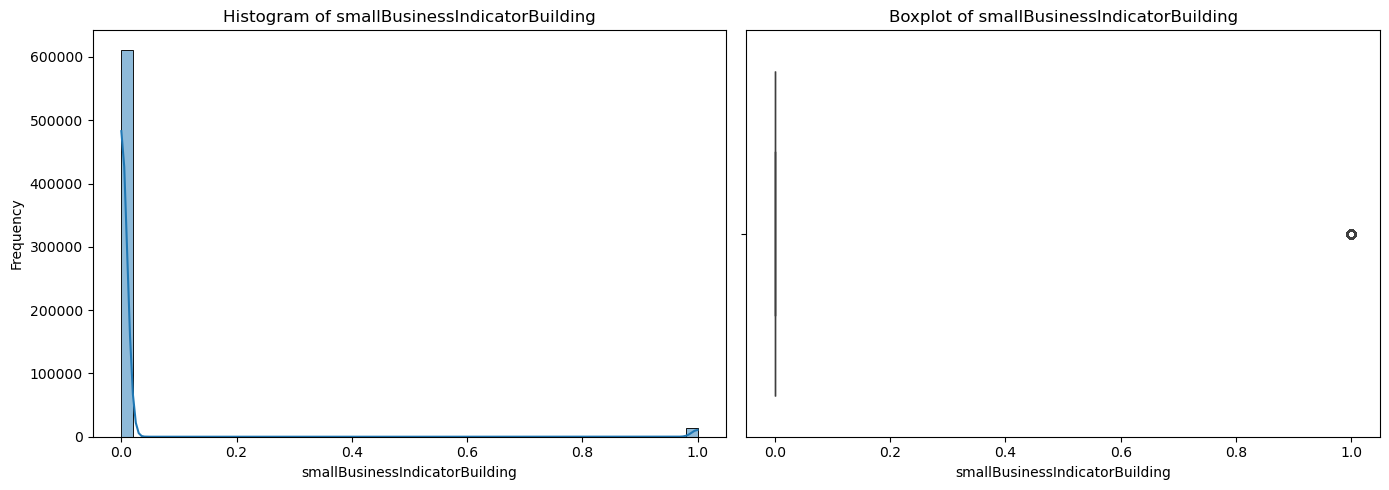


--- Summary Statistics for totalBuildingInsuranceCoverage ---
count    6.250540e+05
mean     3.269519e+05
std      2.101680e+06
min      0.000000e+00
25%      1.280000e+05
50%      2.500000e+05
75%      2.500000e+05
max      2.439030e+08
Name: totalBuildingInsuranceCoverage, dtype: float64


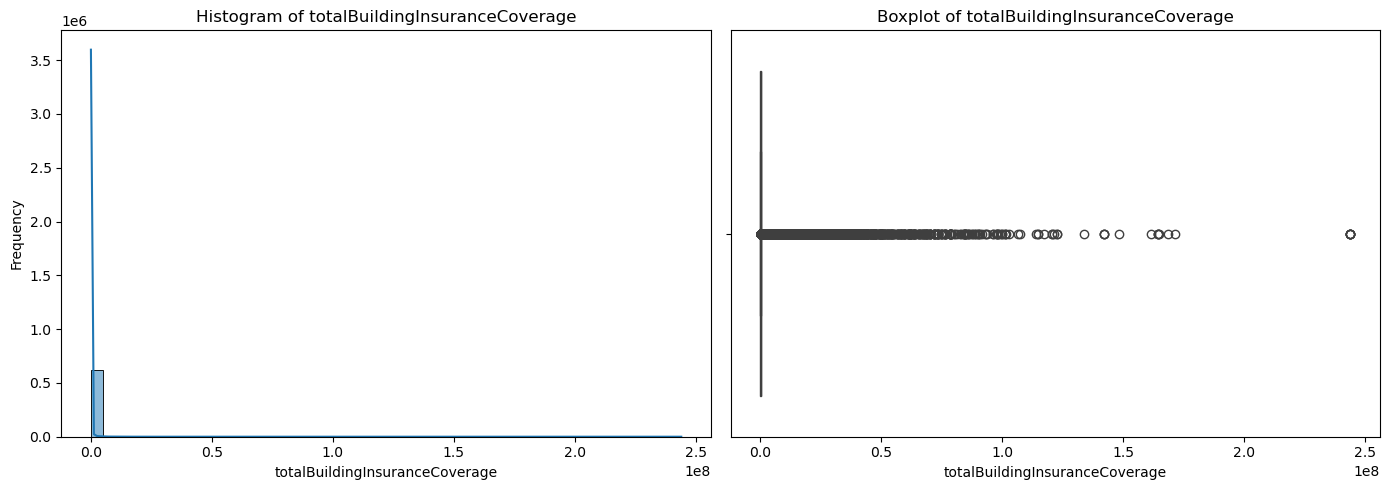


--- Summary Statistics for totalContentsInsuranceCoverage ---
count    625045.000000
mean      52415.242188
std       63574.578125
min           0.000000
25%           0.000000
50%       40000.000000
75%      100000.000000
max      500000.000000
Name: totalContentsInsuranceCoverage, dtype: float64


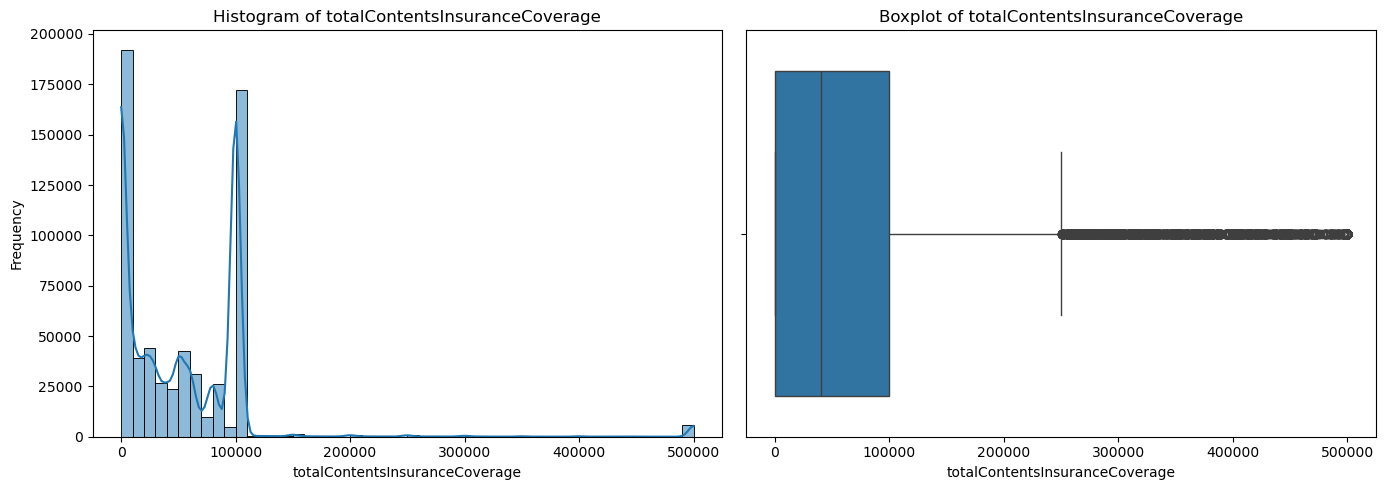


--- Summary Statistics for yearOfLoss ---
count    625054.000000
mean       2019.120834
std           3.108202
min        2014.000000
25%        2017.000000
50%        2018.000000
75%        2022.000000
max        2024.000000
Name: yearOfLoss, dtype: float64


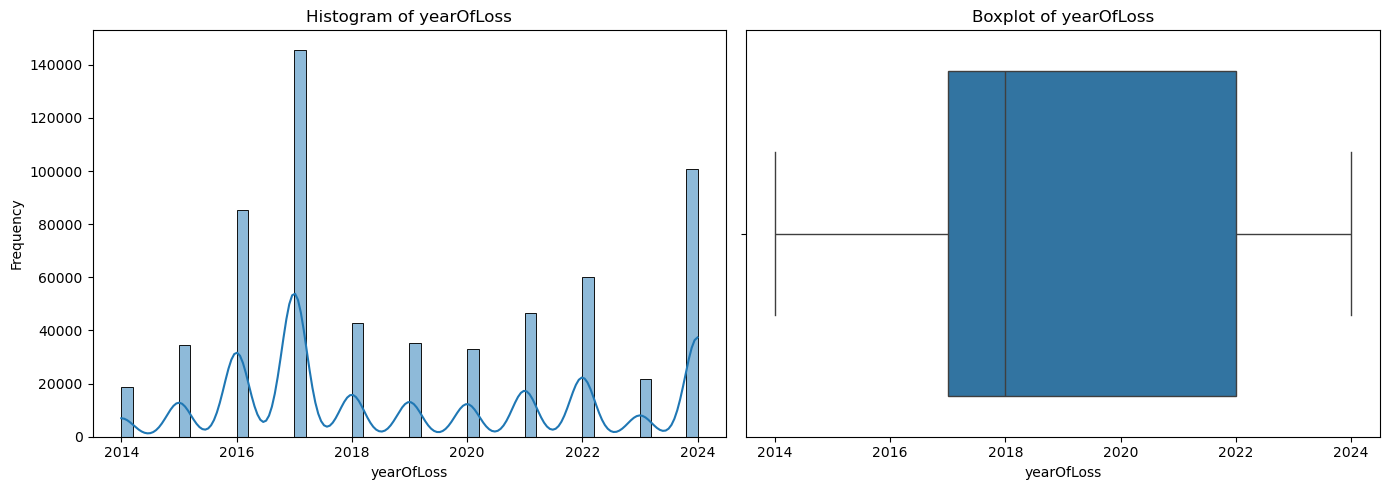


--- Summary Statistics for primaryResidenceIndicator ---
count    625054.000000
mean          0.683722
std           0.465023
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: primaryResidenceIndicator, dtype: float64


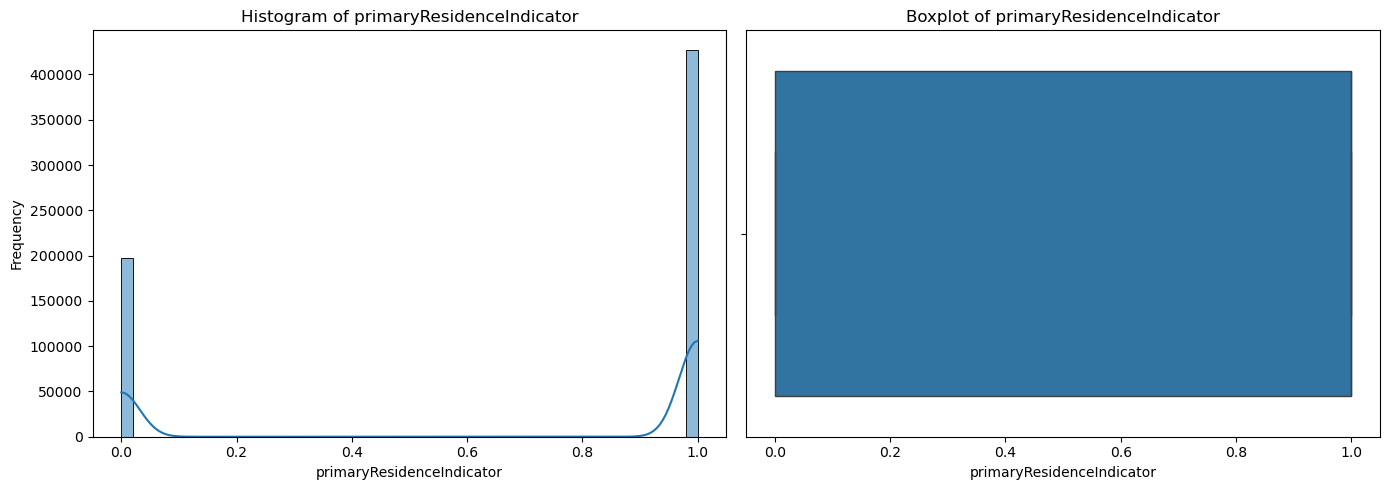


--- Summary Statistics for buildingDamageAmount ---
count    5.193960e+05
mean     5.773632e+04
std      1.020878e+05
min      0.000000e+00
25%      7.000000e+03
50%      2.828250e+04
75%      7.863100e+04
max      1.363258e+07
Name: buildingDamageAmount, dtype: float64


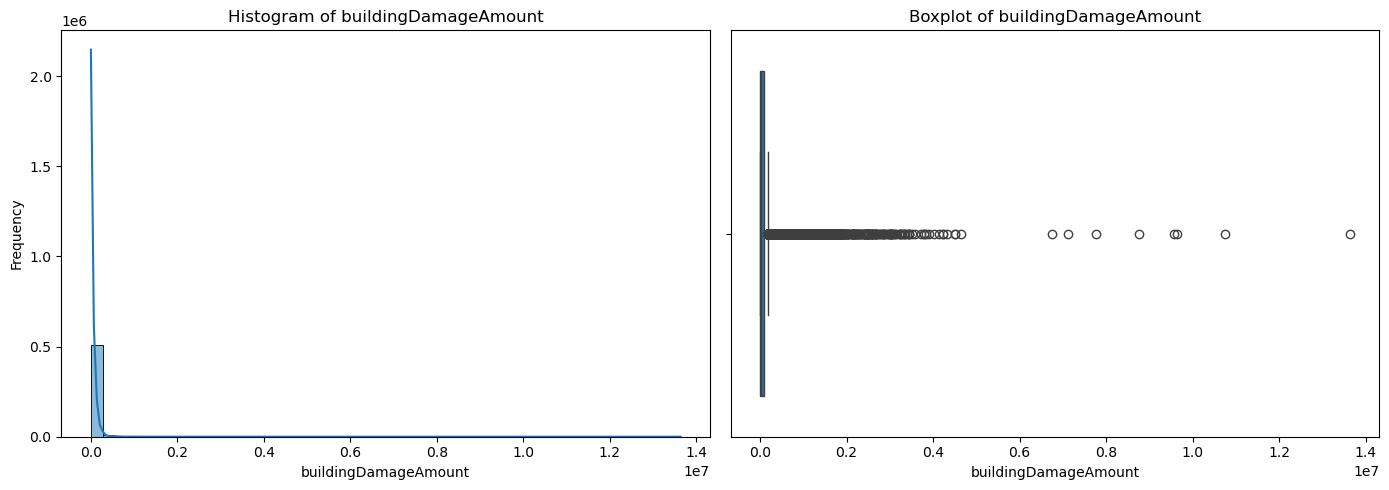


--- Summary Statistics for buildingPropertyValue ---
count    5.193960e+05
mean     4.637399e+05
std      3.952759e+06
min      0.000000e+00
25%      1.163608e+05
50%      1.802990e+05
75%      2.860802e+05
max      6.936930e+08
Name: buildingPropertyValue, dtype: float64


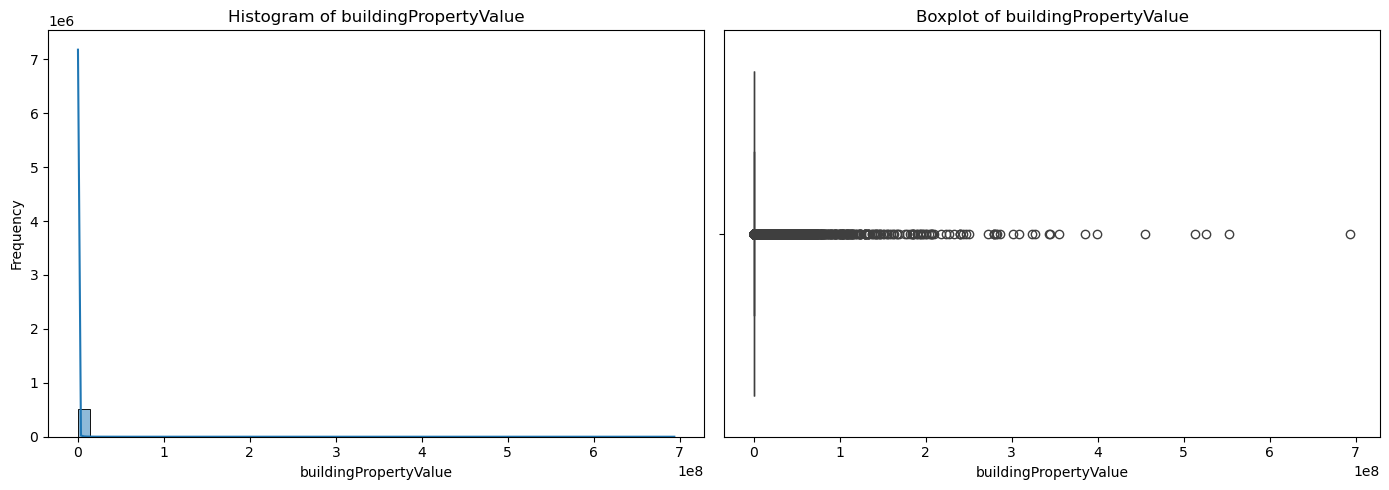


--- Summary Statistics for contentsDamageAmount ---
count    3.057380e+05
mean     2.367961e+04
std      1.255464e+05
min      0.000000e+00
25%      3.310000e+02
50%      7.646500e+03
75%      2.714800e+04
max      1.923051e+07
Name: contentsDamageAmount, dtype: float64


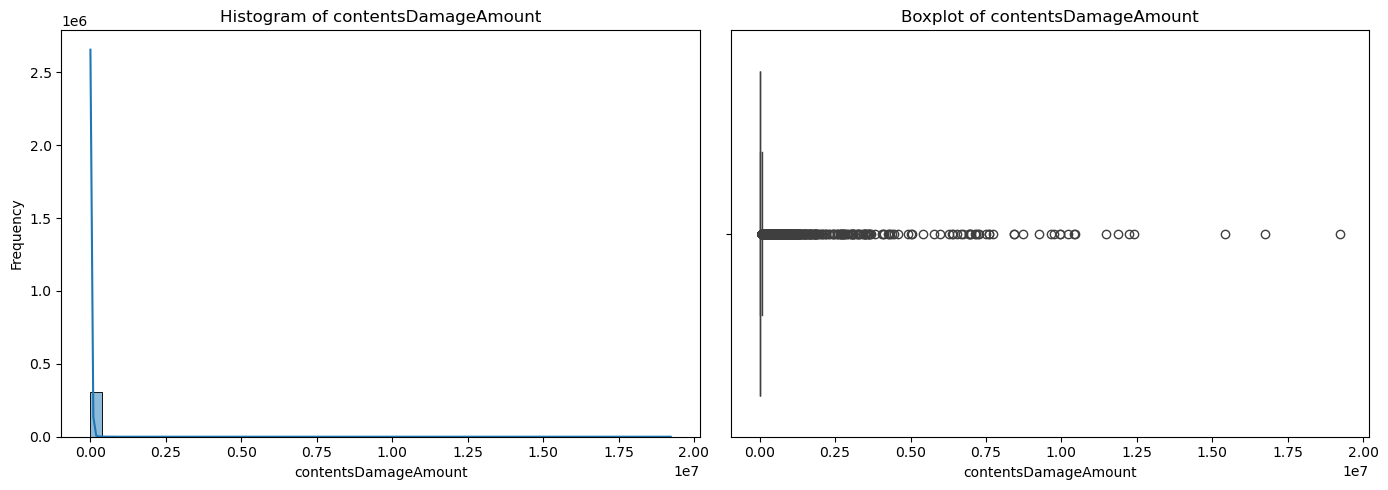


--- Summary Statistics for contentsPropertyValue ---
count    3.057380e+05
mean     9.028205e+04
std      9.359816e+05
min     -1.000000e+00
25%      0.000000e+00
50%      4.063250e+04
75%      9.500000e+04
max      2.818953e+08
Name: contentsPropertyValue, dtype: float64


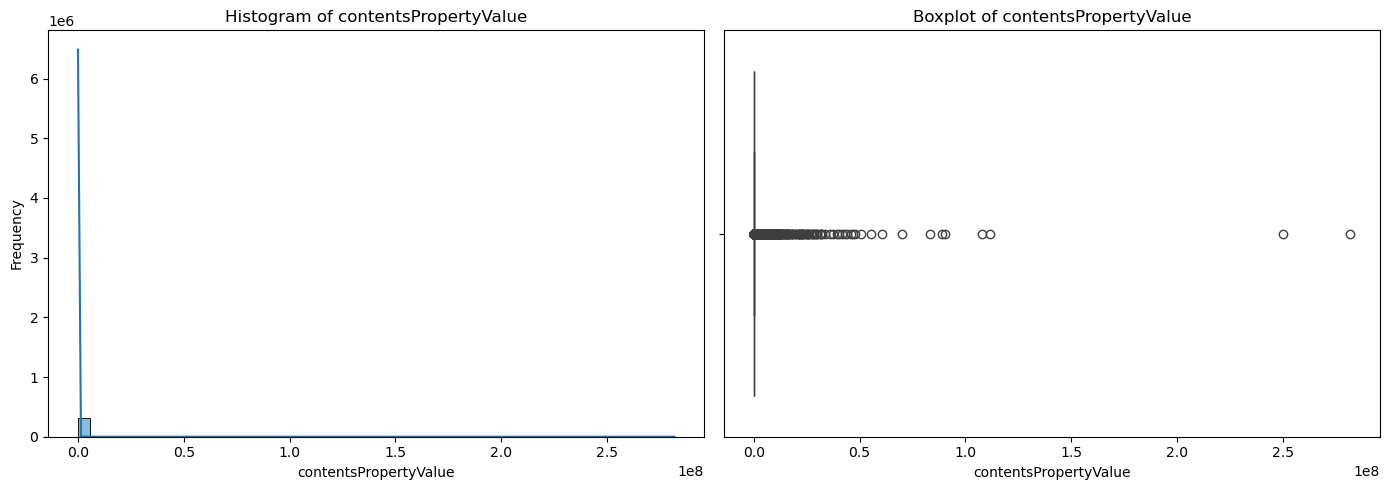


--- Summary Statistics for ficoNumber ---
count    266213.000000
mean        617.282654
std         129.119415
min         317.000000
25%         674.000000
50%         682.000000
75%         682.000000
max         690.000000
Name: ficoNumber, dtype: float64


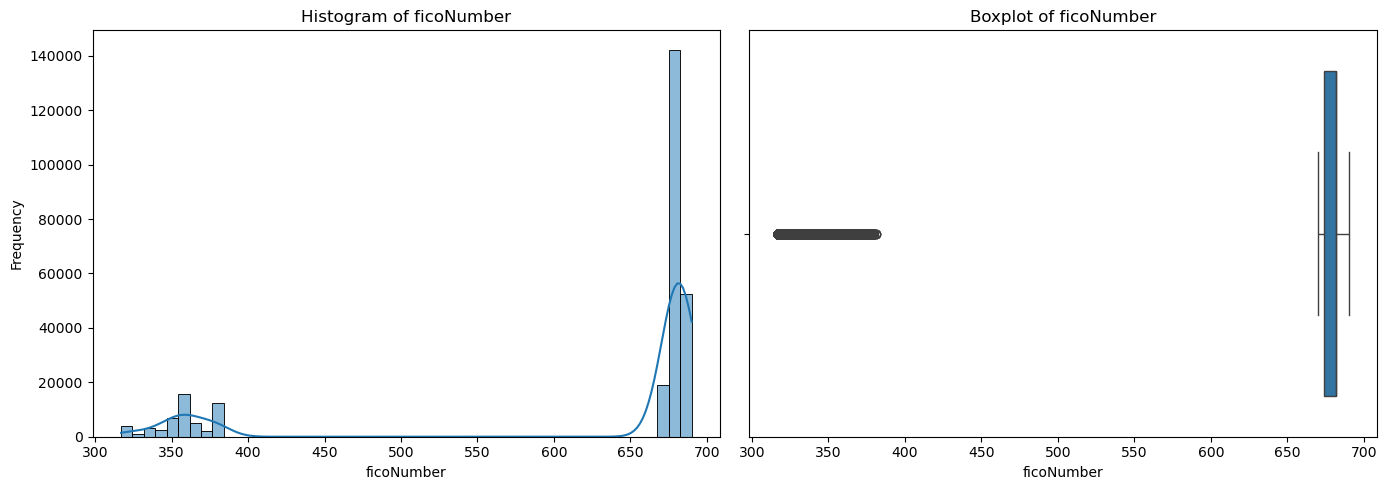


--- Summary Statistics for floodWaterDuration ---
count    353251.000000
mean          0.005741
std           0.197093
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          42.000000
Name: floodWaterDuration, dtype: float64


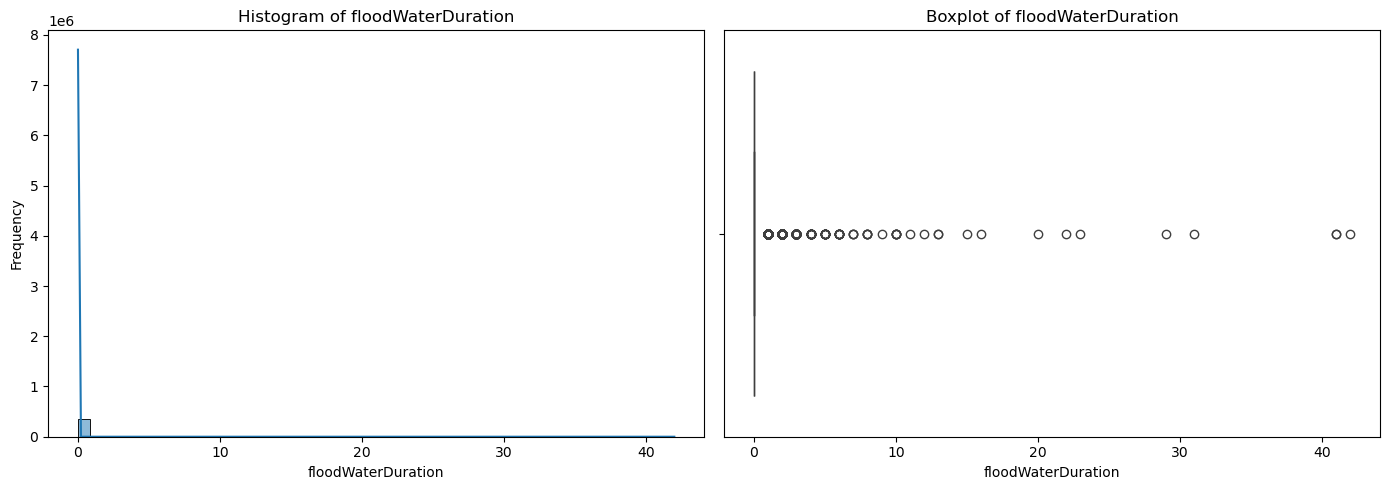


--- Summary Statistics for floodproofedIndicator ---
count    625054.000000
mean          0.000043
std           0.006572
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: floodproofedIndicator, dtype: float64


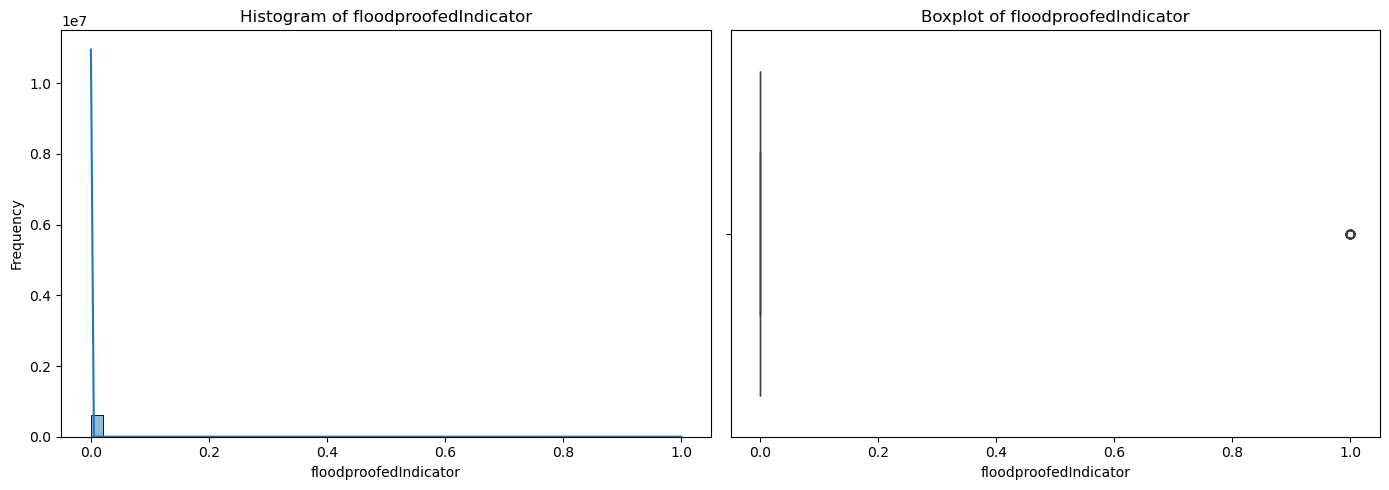


--- Summary Statistics for iccCoverage ---
count    599166.000000
mean      29999.751953
std         114.933525
min           0.000000
25%       30000.000000
50%       30000.000000
75%       30000.000000
max       30000.000000
Name: iccCoverage, dtype: float64


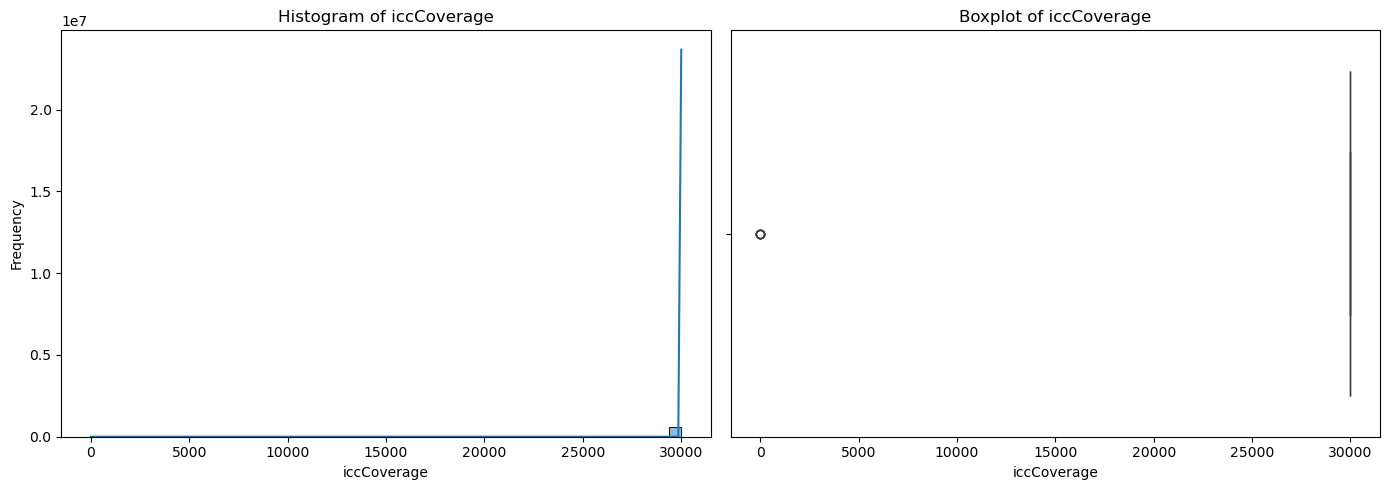


--- Summary Statistics for netIccPaymentAmount ---
count    625054.000000
mean        142.262387
std        1965.742923
min       -6450.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       60000.000000
Name: netIccPaymentAmount, dtype: float64


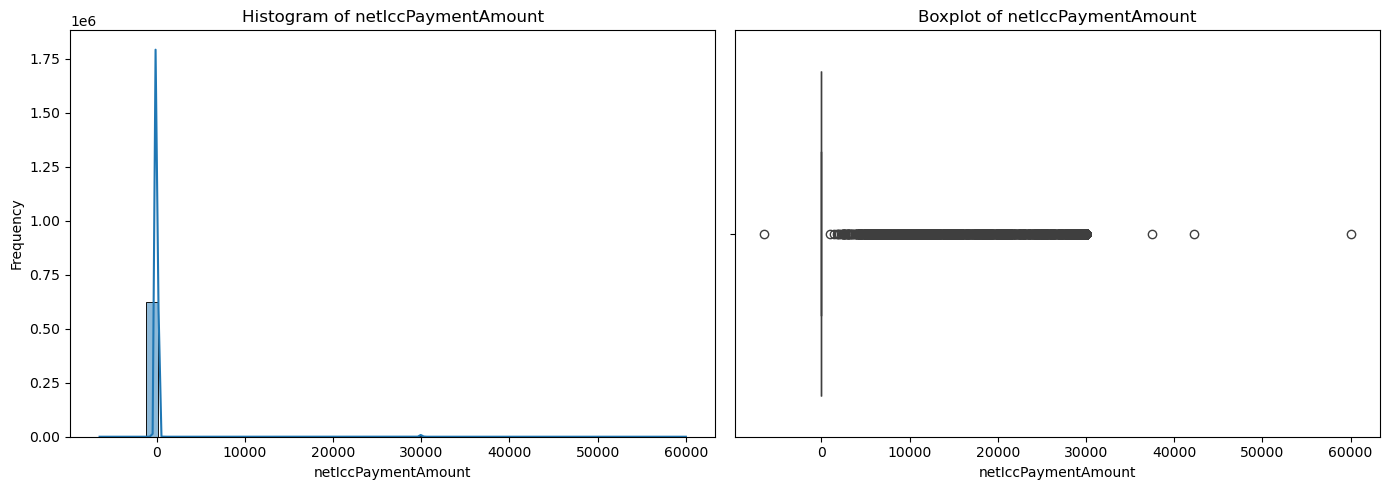


--- Summary Statistics for numberOfUnits ---
count    622227.000000
mean          2.133101
std          46.866673
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       34970.000000
Name: numberOfUnits, dtype: float64


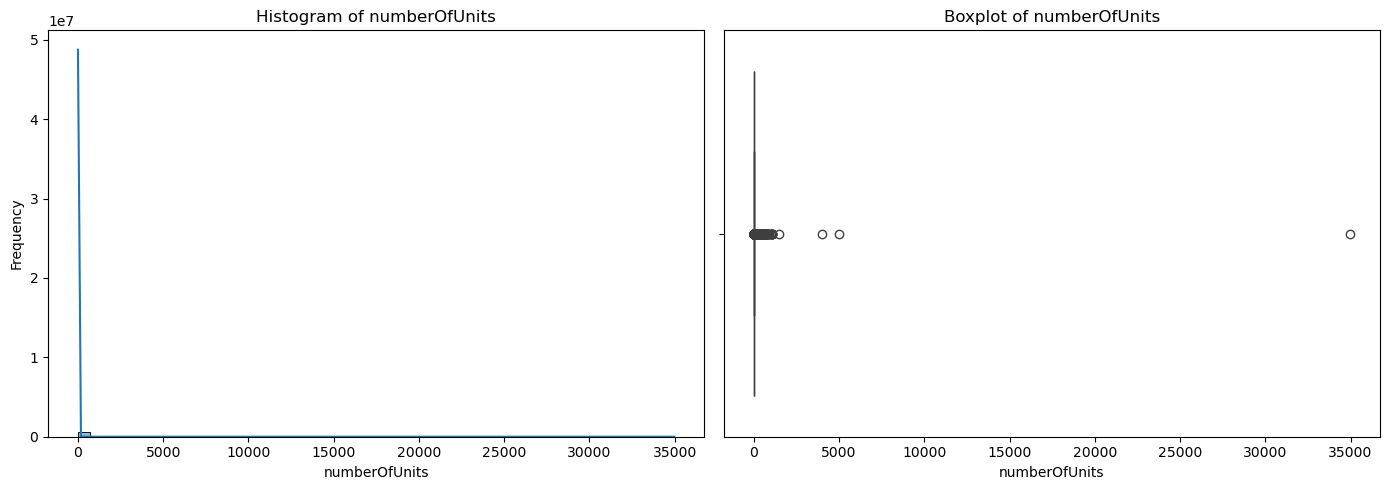


--- Summary Statistics for buildingReplacementCost ---
count    5.193960e+05
mean     6.543019e+05
std      1.405514e+07
min      0.000000e+00
25%      1.554508e+05
50%      2.323775e+05
75%      3.649075e+05
max      8.706307e+09
Name: buildingReplacementCost, dtype: float64


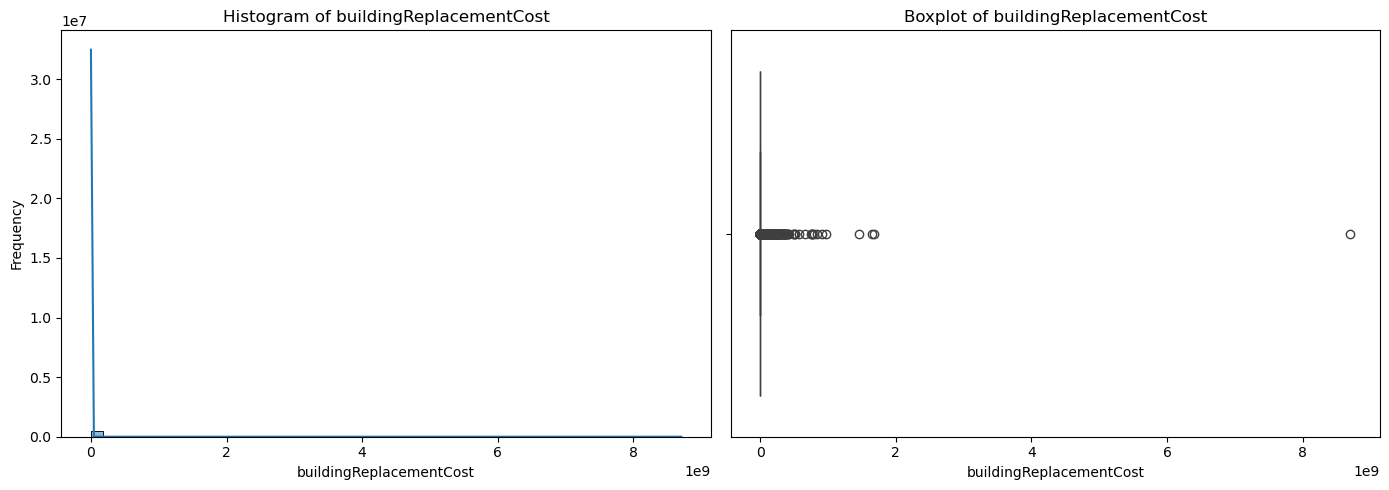


--- Summary Statistics for contentsReplacementCost ---
count    3.049070e+05
mean     3.904942e+04
std      1.576396e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.704480e+09
Name: contentsReplacementCost, dtype: float64


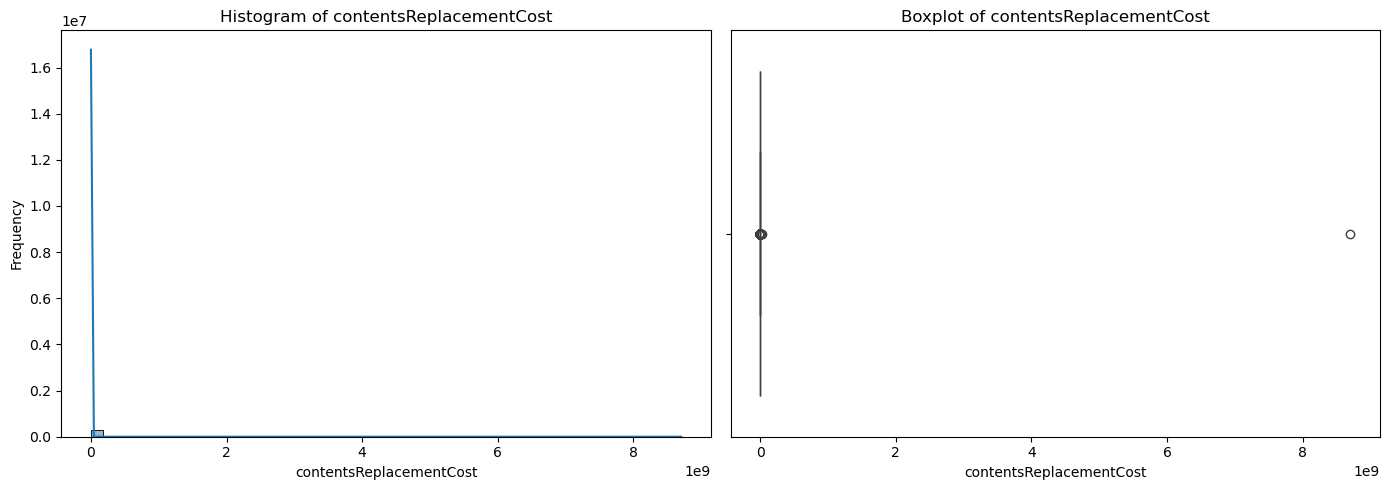


--- Summary Statistics for stateOwnedIndicator ---
count    625054.000000
mean          0.000328
std           0.018107
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: stateOwnedIndicator, dtype: float64


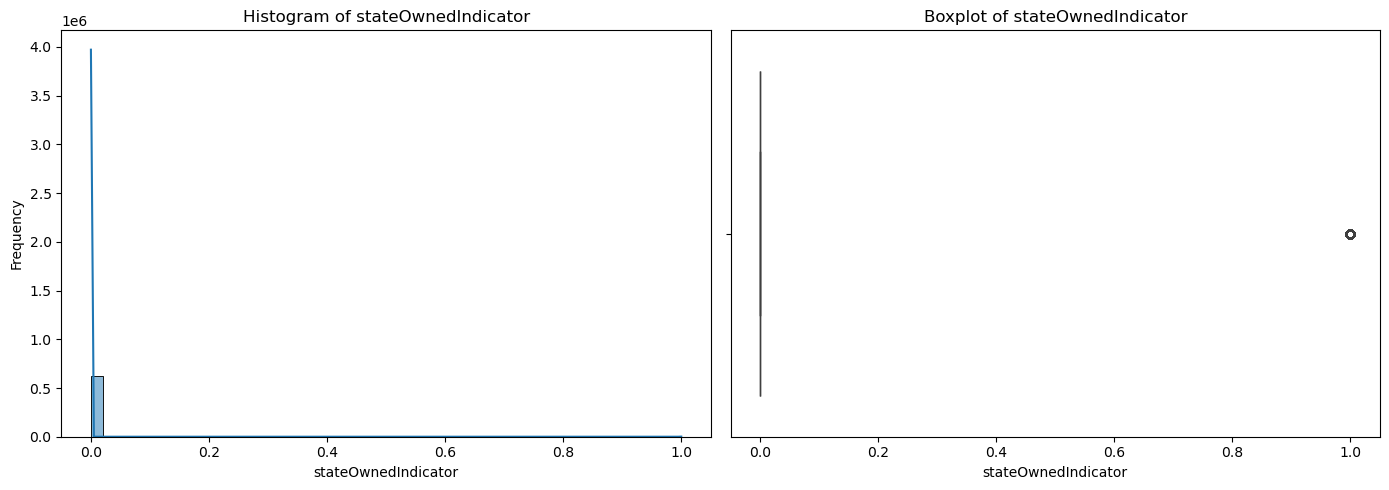


--- Summary Statistics for waterDepth ---
count    548291.000000
mean          4.893152
std          17.445112
min         -98.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         990.000000
Name: waterDepth, dtype: float64


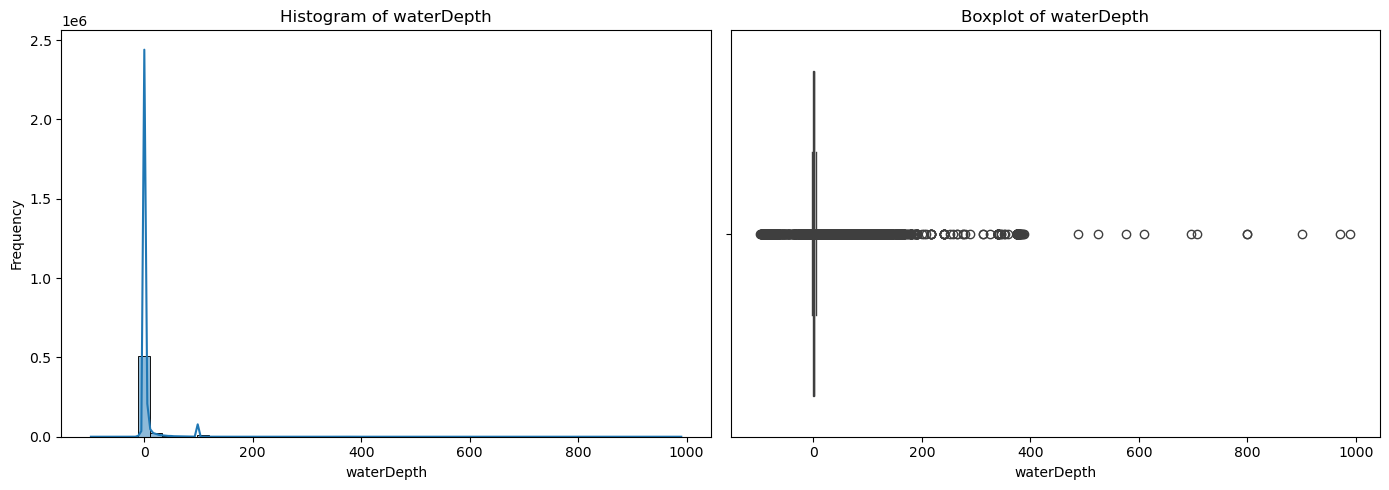


--- Summary Statistics for rentalPropertyIndicator ---
count    625054.000000
mean          0.055832
std           0.229597
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: rentalPropertyIndicator, dtype: float64


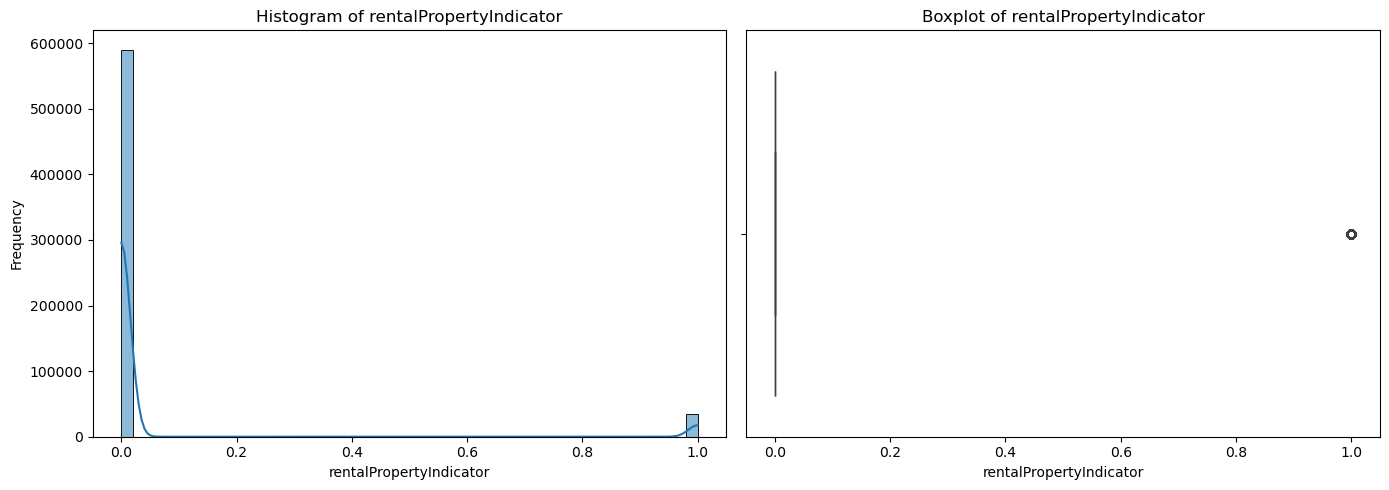


--- Summary Statistics for latitude ---
count    623475.000000
mean         31.508337
std           4.922613
min         -36.000000
25%          28.000000
50%          30.000000
75%          33.900002
max          66.900002
Name: latitude, dtype: float64


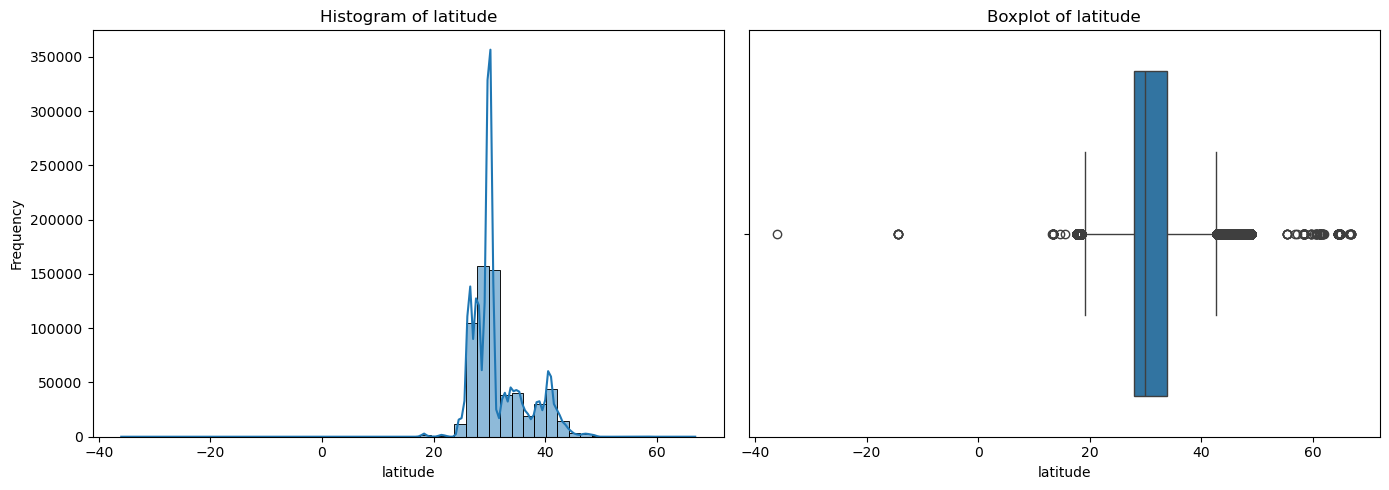


--- Summary Statistics for longitude ---
count    623475.000000
mean        -87.035416
std           9.459097
min        -170.699997
25%         -94.300003
50%         -82.800003
75%         -81.300003
max         174.000000
Name: longitude, dtype: float64


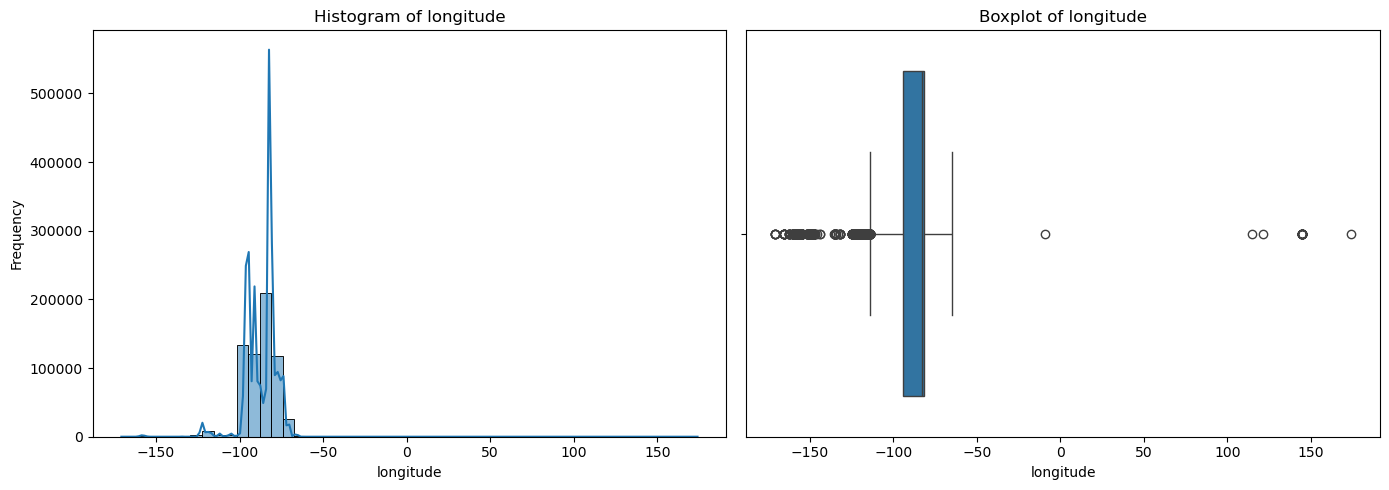


--- Summary Statistics for claim_approval ---
count    625054.000000
mean          0.780251
std           0.414077
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: claim_approval, dtype: float64


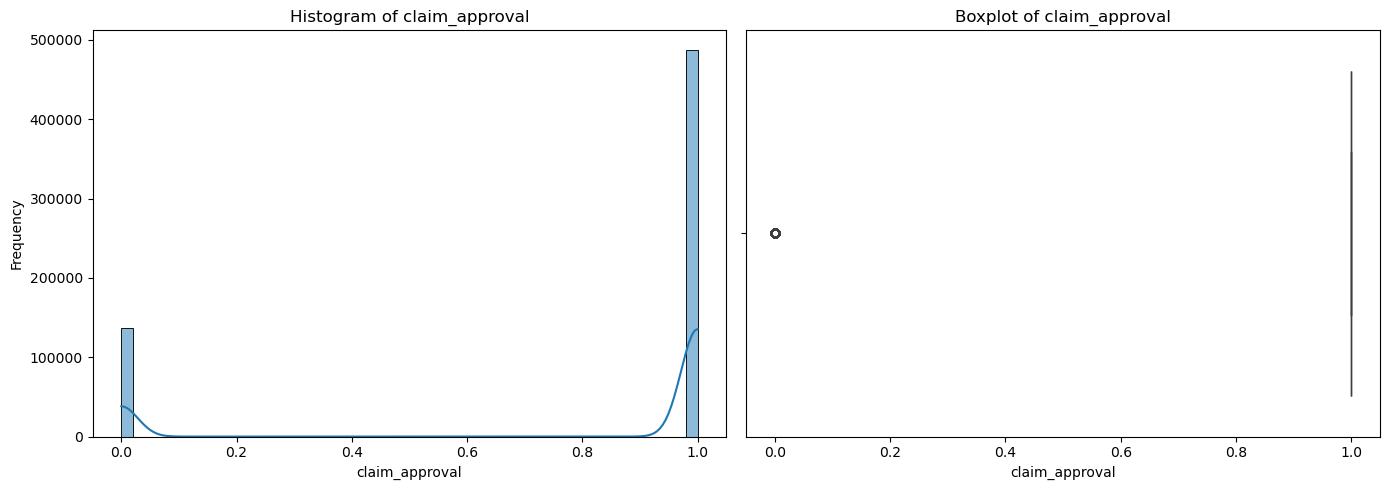

In [415]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_all_numeric_outliers(df, numeric_cols):
    """
    For each column in numeric_cols that is not a datetime field, this function:
      - Prints summary statistics.
      - Plots a histogram with a KDE overlay.
      - Plots a boxplot.
    
    For date fields, please use the separate visualize_date_fields() function.
    
    Parameters:
      df (pd.DataFrame): DataFrame containing numeric columns.
      numeric_cols (list): List of numeric column names.
    """
    for col in numeric_cols:
        if col not in df.columns:
            print(f"Column '{col}' not found in DataFrame.")
            continue
        
        # Check if the column is a datetime type
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            print(f"Skipping datetime field '{col}' - please use visualize_date_fields() for date visualization.")
            continue
        
        data = df[col].dropna()
        print(f"\n--- Summary Statistics for {col} ---")
        print(data.describe())
        
        # Create a figure with two subplots: histogram (with KDE) and boxplot
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Histogram with KDE
        sns.histplot(data, ax=axes[0], kde=True, bins=50)
        axes[0].set_title(f"Histogram of {col}")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Frequency")
        
        # Boxplot
        sns.boxplot(x=data, ax=axes[1])
        axes[1].set_title(f"Boxplot of {col}")
        axes[1].set_xlabel(col)
        
        plt.tight_layout()
        plt.show()

# Example usage:
# Assuming nfip_df is your DataFrame and numeric_columns is your list of numeric fields.
visualize_all_numeric_outliers(nfip_valid, numeric_cols)


## Investigating Policy Count from:
### 1st Batch ( agricultureStructureIndicator, basementEnclosureCrawlspaceType, policyCount, elevatedBuildingIndicator, houseWorship, locationOfContents, numberOfFloorsInTheInsuredBuilding )

In [48]:
def investigate_policy_count(df):
    """
    Visualizes and prints summary statistics for the 'policyCount' column.
    This function creates:
      - A histogram with KDE,
      - A boxplot,
      - And a histogram of the log-transformed 'policyCount' (if applicable).
    
    Parameters:
      df (pd.DataFrame): DataFrame that contains the 'policyCount' column.
    """
    if 'policyCount' not in df.columns:
        print("Column 'policyCount' not found in the DataFrame.")
        return
    
    # Filter out missing values
    data = df['policyCount'].dropna()
    
    # Print summary statistics
    print("Summary Statistics for 'policyCount':")
    print(data.describe())
    
    # Create subplots: histogram, boxplot, and log-transformed histogram
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Histogram with KDE
    sns.histplot(data, ax=axes[0], kde=True, bins=50)
    axes[0].set_title("Histogram of policyCount")
    axes[0].set_xlabel("policyCount")
    axes[0].set_ylabel("Frequency")
    
    # Boxplot
    sns.boxplot(x=data, ax=axes[1])
    axes[1].set_title("Boxplot of policyCount")
    axes[1].set_xlabel("policyCount")
    
    # Log-transformed histogram: using log1p to handle zeros safely.
    if (data > 0).all():
        log_data = np.log1p(data)
        sns.histplot(log_data, ax=axes[2], kde=True, bins=50)
        axes[2].set_title("Histogram of log(policyCount + 1)")
        axes[2].set_xlabel("log(policyCount + 1)")
        axes[2].set_ylabel("Frequency")
    else:
        axes[2].text(0.5, 0.5, "Non-positive values found; log transform skipped", 
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Example usage:
investigate_policy_count(nfip_valid)


Column 'policyCount' not found in the DataFrame.


# Handling 1st Batch of outliers. 
## columns -> agricultureStructureIndicator, basementEnclosureCrawlspaceType, policyCount, elevatedBuildingIndicator, houseWorship, 
## locationOfContents, numberOfFloorsInTheInsuredBuilding

In [50]:

def handle_first_batch_outliers(df):
    """
    Handles outliers for the first batch of numeric columns based on domain 
    decisions from the plots and summary stats. 
    
    Variables in the first batch:
      1) agricultureStructureIndicator (boolean 0/1) -> no outlier handling
      2) basementEnclosureCrawlspaceType (discrete 0–4) -> no outlier handling
      3) policyCount -> capping at 200 for values above 200 (example threshold)
      4) elevatedBuildingIndicator (boolean 0/1) -> no outlier handling
      5) houseWorship (boolean 0/1) -> no outlier handling
      6) locationOfContents (discrete 1–7) -> no outlier handling
      7) numberOfFloorsInTheInsuredBuilding (discrete 1–6) -> no outlier handling
    
    Adjust thresholds as needed based on domain insights.
    
    Returns:
      pd.DataFrame: Updated DataFrame after outlier handling.
    """
    # Make a copy to preserve the original if desired
    df_updated = df.copy()
    
    # 1) policyCount: capping at 200
    col = "policyCount"
    if col in df_updated.columns:
        mask = df_updated[col] > 200
        outlier_count = mask.sum()
        print(f"'{col}': found {outlier_count} values > 200 (out of {len(df_updated)}). Capping at 200.")
        df_updated[col] = np.clip(df_updated[col], a_min=None, a_max=200)
    else:
        print(f"'{col}' not found in DataFrame. No changes made.")

    # 2) All other fields in this batch either:
    #    - Are boolean (agricultureStructureIndicator, elevatedBuildingIndicator, houseWorship)
    #    - Have small, discrete valid ranges (basementEnclosureCrawlspaceType, locationOfContents, numberOfFloorsInTheInsuredBuilding)
    # No outlier handling is applied for those fields.
    
    return df_updated

# Example usage:
nfip_valid = handle_first_batch_outliers(nfip_valid)


'policyCount' not found in DataFrame. No changes made.


## Investigating potential fields for 2nd batch

### After running the 1st version of handling 2nd batch of outliers this was the output:
### Column 'occupancyType': Found 193442 outliers (outside [1, 5]). Setting them to NaN.
### Column 'amountPaidOnBuildingClaim': Found 17 values below 0 and 18 values above 5000000.
####   -> In 'amountPaidOnBuildingClaim', negative values set to 0 and values above 5000000 set to NaN.
### Column 'amountPaidOnContentsClaim': Found 33 values below 0 and 7 values above 500000.
####   -> In 'amountPaidOnContentsClaim', negative values set to 0 and values above 500000 set to NaN.
### Column 'amountPaidOnIncreasedCostOfComplianceClaim': Found 1 values below 0 and 38 values above 30000.
####  -> In 'amountPaidOnIncreasedCostOfComplianceClaim', negative values set to 0 and values above 30000 set to NaN.
### Note: Binary indicators (nonProfitIndicator, postFIRMConstructionIndicator) were not modified.

# Handling 2nd Batch of outliers 
### (nonProfitIndicator, obstructionType, occupancyType, amountPaidOnBuildingClaim, amountPaidOnContentsClaim, 
### amountPaidOnIncreasedCostOfComplianceClaim, postFIRMConstructionIndicator)

In [54]:
import numpy as np
import pandas as pd

def handle_second_batch_outliers(df):
    """
    Handles outliers for the second batch of numeric columns based on updated domain-specific
    thresholds and methods.
    
    For standard discrete fields:
      - obstructionType: Valid codes should be between 10 and 98. Values outside this range are set to NaN.
      - occupancyType: Valid occupancy codes are {1, 2, 3, 4, 6, 11, 12, 13, 14, 15, 16, 17, 18, 19}.
         Values not in this allowed set are set to NaN.
    
    For payment fields (using a custom "set_zero_then_nan" method):
      - amountPaidOnBuildingClaim: Valid range [0, 5,000,000];
            negative values set to 0 and values > 5,000,000 set to NaN.
      - amountPaidOnContentsClaim: Valid range [0, 500,000];
            negative values set to 0 and values > 500,000 set to NaN.
      - amountPaidOnIncreasedCostOfComplianceClaim: Valid range [0, 30,000];
            negative values set to 0 and values > 30,000 set to NaN.
    
    Binary indicators (nonProfitIndicator, postFIRMConstructionIndicator) remain unchanged.
    
    Parameters:
      df (pd.DataFrame): Input DataFrame containing these columns.
    
    Returns:
      pd.DataFrame: DataFrame with outliers handled for the second batch of variables.
    """
    df_updated = df.copy()
    
    # 1. Process standard fields
    
    # (a) obstructionType: Valid range [10, 98]
    col = "obstructionType"
    if col in df_updated.columns:
        outlier_mask = (df_updated[col] < 10) | (df_updated[col] > 98)
        num_outliers = outlier_mask.sum()
        print(f"Column '{col}': Found {num_outliers} outliers (outside [10, 98]). Setting them to NaN.")
        df_updated.loc[outlier_mask, col] = np.nan
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # (b) occupancyType: Allowed set of values
    allowed_occupancy = {1, 2, 3, 4, 6, 11, 12, 13, 14, 15, 16, 17, 18, 19}
    col = "occupancyType"
    if col in df_updated.columns:
        mask_invalid = ~df_updated[col].isin(allowed_occupancy)
        num_invalid = mask_invalid.sum()
        print(f"Column '{col}': Found {num_invalid} values not in {allowed_occupancy}. Setting them to NaN.")
        df_updated.loc[mask_invalid, col] = np.nan
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 2. Process payment fields with custom "set_zero_then_nan" handling.
    payment_thresholds = {
        "amountPaidOnBuildingClaim": (0, 5_000_000),
        "amountPaidOnContentsClaim": (0, 500_000),
        "amountPaidOnIncreasedCostOfComplianceClaim": (0, 30_000)
    }
    
    for col, (min_val, max_val) in payment_thresholds.items():
        if col in df_updated.columns:
            low_mask = df_updated[col] < min_val  # negative values
            high_mask = df_updated[col] > max_val
            num_low = low_mask.sum()
            num_high = high_mask.sum()
            print(f"Column '{col}': Found {num_low} values below {min_val} and {num_high} values above {max_val}.")
            # Set negatives to 0 (to preserve reissue signal via separate engineered features)
            df_updated.loc[low_mask, col] = 0
            # Set values above the threshold to NaN for later imputation
            df_updated.loc[high_mask, col] = np.nan
            print(f"  -> In '{col}', negative values set to 0 and values above {max_val} set to NaN.")
        else:
            print(f"Column '{col}' not found. Skipping.")
    
    # Binary indicators (nonProfitIndicator, postFIRMConstructionIndicator) remain unchanged.
    print("Note: Binary indicators (nonProfitIndicator, postFIRMConstructionIndicator) were not modified.")
    
    return df_updated

# Example usage:
nfip_valid = handle_second_batch_outliers(nfip_valid)


Column 'obstructionType' not found. Skipping.
Column 'occupancyType': Found 1 values not in {1, 2, 3, 4, 6, 11, 12, 13, 14, 15, 16, 17, 18, 19}. Setting them to NaN.
Column 'amountPaidOnBuildingClaim' not found. Skipping.
Column 'amountPaidOnContentsClaim' not found. Skipping.
Column 'amountPaidOnIncreasedCostOfComplianceClaim' not found. Skipping.
Note: Binary indicators (nonProfitIndicator, postFIRMConstructionIndicator) were not modified.


# Handling 3rd Batch of outliers 
## ( smallBusinessIndicatorBuilding, totalBuildingInsuranceCoverage, totalContentsInsuranceCoverage, yearOfLoss, primaryResidenceIndicator, ## buildingDamageAmount, netBuildingPaymentAmount )

In [58]:
def handle_third_batch_outliers(df):
    """
    Handles outliers for the third batch of numeric fields based on domain-specific thresholds.
    
    Fields in this batch and handling:
      1) smallBusinessIndicatorBuilding: Binary indicator; no outlier handling.
      2) totalBuildingInsuranceCoverage: 
            Valid range [0, 50,000,000]. Values > 50,000,000 are set to NaN.
      3) totalContentsInsuranceCoverage: 
            Valid range [0, 2,000,000]. Values > 2,000,000 are set to NaN.
      4) yearOfLoss: Year when loss occurred; assumed valid if between 1978 and 2025; no handling applied.
      5) primaryResidenceIndicator: Binary indicator; no outlier handling.
      6) buildingDamageAmount: 
            Valid range [0, 5,000,000]. Values > 5,000,000 are set to NaN.
      7) netBuildingPaymentAmount: 
            Negative values are set to 0 (to preserve reissue signal), and values > 5,000,000 are set to NaN.
    
    Parameters:
      df (pd.DataFrame): DataFrame containing these columns.
    
    Returns:
      pd.DataFrame: DataFrame with outliers handled for the third batch of variables.
    """
    df_updated = df.copy()
    
    # 1. smallBusinessIndicatorBuilding: binary; no handling.
    
    # 2. totalBuildingInsuranceCoverage: cap upper values
    col = "totalBuildingInsuranceCoverage"
    if col in df_updated.columns:
        upper_bound = 50_000_000  # $50 million
        mask_high = df_updated[col] > upper_bound
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_high} values > {upper_bound}. Setting them to NaN.")
        df_updated.loc[mask_high, col] = np.nan
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 3. totalContentsInsuranceCoverage: cap upper values
    col = "totalContentsInsuranceCoverage"
    if col in df_updated.columns:
        upper_bound = 2_000_000  # $2 million
        mask_high = df_updated[col] > upper_bound
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_high} values > {upper_bound}. Setting them to NaN.")
        df_updated.loc[mask_high, col] = np.nan
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 4. yearOfLoss: assume valid; no handling.
    
    # 5. primaryResidenceIndicator: binary; no handling.
    
    # 6. buildingDamageAmount: cap upper values
    col = "buildingDamageAmount"
    if col in df_updated.columns:
        upper_bound = 5_000_000  # $5 million threshold
        mask_high = df_updated[col] > upper_bound
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_high} values > {upper_bound}. Setting them to NaN.")
        df_updated.loc[mask_high, col] = np.nan
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 7. netBuildingPaymentAmount: handle negatives and high values.
    col = "netBuildingPaymentAmount"
    if col in df_updated.columns:
        # Negative values: set to 0 (preserve reissued check signal via separate indicator)
        mask_neg = df_updated[col] < 0
        num_neg = mask_neg.sum()
        # High values: set to NaN if > 5e6
        upper_bound = 5_000_000
        mask_high = df_updated[col] > upper_bound
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_neg} negative values and {num_high} values > {upper_bound}.")
        df_updated.loc[mask_neg, col] = 0
        df_updated.loc[mask_high, col] = np.nan
        print(f"  -> Negative values in '{col}' set to 0; values above {upper_bound} set to NaN.")
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    return df_updated

# Example usage:
nfip_valid = handle_third_batch_outliers(nfip_valid)


Column 'totalBuildingInsuranceCoverage': Found 221 values > 50000000. Setting them to NaN.
Column 'totalContentsInsuranceCoverage': Found 0 values > 2000000. Setting them to NaN.
Column 'buildingDamageAmount' not found. Skipping.
Column 'netBuildingPaymentAmount' not found. Skipping.


# Handling Batch 4 outlier , 
## columns -> ( buildingPropertyValue, contentsDamageAmount, netContentsPaymentAmount, contentsPropertyValue, 
## disasterAssistanceCoverageRequired, ficoNumber, floodWaterDuration)

In [60]:
def handle_fourth_batch_outliers(df):
    """
    Handles outliers for the fourth batch of numeric columns based on domain-specific thresholds.
    
    Fields and handling:
      1) buildingPropertyValue:
         - If negative, set to 0.
         - If > 10,000,000, set to NaN.
      2) contentsDamageAmount:
         - If > 100,000, set to NaN.
      3) netContentsPaymentAmount:
         - If negative, set to 0.
         - If > 100,000, set to NaN.
      4) contentsPropertyValue:
         - If negative, set to 0.
         - If > 100,000, set to NaN.
      5) disasterAssistanceCoverageRequired:
         - Legal values are {0, 1, 2, 4, 5}; any value outside this set is set to NaN.
      6) ficoNumber:
         - No outlier handling applied.
      7) floodWaterDuration:
         - If > 168 hours, set to NaN.
    
    Parameters:
      df (pd.DataFrame): DataFrame containing these columns.
      
    Returns:
      pd.DataFrame: Updated DataFrame with outliers handled for the fourth batch.
    """
    df_updated = df.copy()
    
    # 1. buildingPropertyValue
    col = "buildingPropertyValue"
    if col in df_updated.columns:
        # Set negatives to 0 and cap values above 10,000,000
        mask_neg = df_updated[col] < 0
        mask_high = df_updated[col] > 10_000_000
        num_neg = mask_neg.sum()
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_neg} negative values and {num_high} values > 10,000,000.")
        df_updated.loc[mask_neg, col] = 0
        df_updated.loc[mask_high, col] = np.nan
        print(f"  -> In '{col}', negatives set to 0; values > 10,000,000 set to NaN.")
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 2. contentsDamageAmount
    col = "contentsDamageAmount"
    if col in df_updated.columns:
        mask_high = df_updated[col] > 100_000
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_high} values > 100,000. Setting them to NaN.")
        df_updated.loc[mask_high, col] = np.nan
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 3. netContentsPaymentAmount
    col = "netContentsPaymentAmount"
    if col in df_updated.columns:
        mask_neg = df_updated[col] < 0
        mask_high = df_updated[col] > 100_000
        num_neg = mask_neg.sum()
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_neg} negative values and {num_high} values > 100,000.")
        df_updated.loc[mask_neg, col] = 0
        df_updated.loc[mask_high, col] = np.nan
        print(f"  -> In '{col}', negatives set to 0; values > 100,000 set to NaN.")
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 4. contentsPropertyValue
    col = "contentsPropertyValue"
    if col in df_updated.columns:
        mask_neg = df_updated[col] < 0
        mask_high = df_updated[col] > 100_000
        num_neg = mask_neg.sum()
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_neg} negative values and {num_high} values > 100,000.")
        df_updated.loc[mask_neg, col] = 0
        df_updated.loc[mask_high, col] = np.nan
        print(f"  -> In '{col}', negatives set to 0; values > 100,000 set to NaN.")
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 5. disasterAssistanceCoverageRequired
    col = "disasterAssistanceCoverageRequired"
    if col in df_updated.columns:
        allowed_values = {0, 1, 2, 4, 5}
        mask_invalid = ~df_updated[col].isin(allowed_values)
        num_invalid = mask_invalid.sum()
        print(f"Column '{col}': Found {num_invalid} values not in {allowed_values}. Setting them to NaN.")
        df_updated.loc[mask_invalid, col] = np.nan
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 6. ficoNumber: No changes (assumed valid range 1-998)
    
    # 7. floodWaterDuration
    col = "floodWaterDuration"
    if col in df_updated.columns:
        max_duration = 168  # 7 days in hours
        mask_high = df_updated[col] > max_duration
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_high} values > {max_duration} hours. Setting them to NaN.")
        df_updated.loc[mask_high, col] = np.nan
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    return df_updated

# Example usage:
nfip_valid = handle_fourth_batch_outliers(nfip_valid)


Column 'buildingPropertyValue': Found 0 negative values and 2416 values > 10,000,000.
  -> In 'buildingPropertyValue', negatives set to 0; values > 10,000,000 set to NaN.
Column 'contentsDamageAmount' not found. Skipping.
Column 'netContentsPaymentAmount' not found. Skipping.
Column 'contentsPropertyValue': Found 1 negative values and 60657 values > 100,000.
  -> In 'contentsPropertyValue', negatives set to 0; values > 100,000 set to NaN.
Column 'disasterAssistanceCoverageRequired': Found 279775 values not in {0, 1, 2, 4, 5}. Setting them to NaN.
Column 'floodWaterDuration': Found 0 values > 168 hours. Setting them to NaN.


In [61]:
nfip_valid.shape

(625054, 58)

# Handling Batch 5 outlier with columns 
## -> floodproofedIndicator, iccCoverage, netIccPaymentAmount, numberOfUnits, buildingReplacementCost, contentsReplacementCost, 
## stateOwnedIndicator

In [63]:
def handle_fifth_batch_outliers(df):
    """
    Handles outliers for the fifth batch of numeric columns based on domain-specific thresholds,
    incorporating the field descriptions provided.
    
    Fields in this batch and handling:
      1) floodproofedIndicator: Binary indicator; no changes applied.
      
      2) iccCoverage:
         - Represents the ICC coverage amount in whole dollars.
         - Valid range: [0, 30,000]. Any value above 30,000 is considered an outlier and is set to NaN.
      
      3) netIccPaymentAmount:
         - Represents the net ICC payment amount made to the insured.
         - If negative (which indicates a reissued check), set to 0.
         - If greater than 30,000, set to NaN.
      
      4) numberOfUnits:
         - The number of units covered by the Condominium Master Policy.
         - Valid range: Typically 1; values > 1000 are considered outliers and set to NaN.
      
      5) buildingReplacementCost:
         - Estimated cost to replace the building (excluding land and contents).
         - If negative, set to 0.
         - Values greater than 50,000,000 (50e6) are considered outliers and set to NaN.
      
      6) contentsReplacementCost:
         - Estimated cost to replace the contents.
         - If negative, set to 0.
         - Values greater than 1,000,000 (1e6) are considered outliers and set to NaN.
      
      7) stateOwnedIndicator:
         - Binary indicator; no changes applied.
    
    Parameters:
      df (pd.DataFrame): DataFrame containing the above columns.
    
    Returns:
      pd.DataFrame: DataFrame with outliers in the fifth batch handled.
    """
    df_updated = df.copy()
    
    # 1. floodproofedIndicator: No changes.
    
    # 2. iccCoverage: Set values > 30,000 to NaN.
    col = "iccCoverage"
    if col in df_updated.columns:
        max_val = 30000
        mask_high = df_updated[col] > max_val
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_high} values > {max_val}. Setting them to NaN.")
        df_updated.loc[mask_high, col] = np.nan
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 3. netIccPaymentAmount: Negative values set to 0; values > 30,000 set to NaN.
    col = "netIccPaymentAmount"
    if col in df_updated.columns:
        mask_neg = df_updated[col] < 0
        mask_high = df_updated[col] > 30000
        num_neg = mask_neg.sum()
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_neg} negative values and {num_high} values > 30000.")
        df_updated.loc[mask_neg, col] = 0
        df_updated.loc[mask_high, col] = np.nan
        print(f"  -> In '{col}', negatives set to 0; values above 30000 set to NaN.")
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 4. numberOfUnits: Set values > 1000 to NaN.
    col = "numberOfUnits"
    if col in df_updated.columns:
        max_val = 1000
        mask_high = df_updated[col] > max_val
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_high} values > {max_val}. Setting them to NaN.")
        df_updated.loc[mask_high, col] = np.nan
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 5. buildingReplacementCost: Set negatives to 0; values > 50,000,000 set to NaN.
    col = "buildingReplacementCost"
    if col in df_updated.columns:
        mask_neg = df_updated[col] < 0
        mask_high = df_updated[col] > 50_000_000
        num_neg = mask_neg.sum()
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_neg} negative values and {num_high} values > 50,000,000.")
        df_updated.loc[mask_neg, col] = 0
        df_updated.loc[mask_high, col] = np.nan
        print(f"  -> In '{col}', negatives set to 0; values above 50,000,000 set to NaN.")
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 6. contentsReplacementCost: Set negatives to 0; values > 1,000,000 set to NaN.
    col = "contentsReplacementCost"
    if col in df_updated.columns:
        mask_neg = df_updated[col] < 0
        mask_high = df_updated[col] > 1_000_000
        num_neg = mask_neg.sum()
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_neg} negative values and {num_high} values > 1,000,000.")
        df_updated.loc[mask_neg, col] = 0
        df_updated.loc[mask_high, col] = np.nan
        print(f"  -> In '{col}', negatives set to 0; values above 1,000,000 set to NaN.")
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 7. stateOwnedIndicator: No changes (binary field).
    
    return df_updated

# Example usage:
nfip_valid = handle_fifth_batch_outliers(nfip_valid)


Column 'iccCoverage': Found 0 values > 30000. Setting them to NaN.
Column 'netIccPaymentAmount' not found. Skipping.
Column 'numberOfUnits': Found 10 values > 1000. Setting them to NaN.
Column 'buildingReplacementCost': Found 0 negative values and 571 values > 50,000,000.
  -> In 'buildingReplacementCost', negatives set to 0; values above 50,000,000 set to NaN.
Column 'contentsReplacementCost': Found 0 negative values and 134 values > 1,000,000.
  -> In 'contentsReplacementCost', negatives set to 0; values above 1,000,000 set to NaN.


# # Handling Batch 6 outlier with columns -> water_depth, lattitude, longitude


In [65]:
def handle_batch6_outliers(df):
    """
    Handles outliers for the final (sixth) batch of fields: waterDepth, latitude, and longitude.
    
    1) waterDepth (in inches):
         - Negative values are set to 0.
         - Values above a chosen threshold (e.g., 240 inches, about 20 feet) are set to NaN.
         (Note: Adjust the threshold if needed based on domain insights, 
          especially considering that some measurements may be in feet.)
    
    2) latitude:
         - Valid range is assumed to be [15, 72].
         - Values outside this range are set to NaN.
    
    3) longitude:
         - Valid range is assumed to be [-179, -66] (covering most of the U.S.).
         - Values outside this range are set to NaN.
    
    Parameters:
      df (pd.DataFrame): Input DataFrame containing these columns.
    
    Returns:
      pd.DataFrame: Updated DataFrame with outliers in waterDepth, latitude, and longitude handled.
    """
    df_updated = df.copy()
    
    # 1. waterDepth
    col = "waterDepth"
    if col in df_updated.columns:
        # Set negative waterDepth to 0
        mask_neg = df_updated[col] < 0
        num_neg = mask_neg.sum()
        # Set a threshold; here, we choose 240 inches as an example (~20 feet)
        threshold = 240
        mask_high = df_updated[col] > threshold
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_neg} negative values and {num_high} values > {threshold}.")
        df_updated.loc[mask_neg, col] = 0
        df_updated.loc[mask_high, col] = np.nan
        print(f"  -> In '{col}', negative values set to 0; values above {threshold} set to NaN.")
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 2. latitude
    col = "latitude"
    if col in df_updated.columns:
        min_lat, max_lat = 15.0, 72.0
        mask_low = df_updated[col] < min_lat
        mask_high = df_updated[col] > max_lat
        num_low = mask_low.sum()
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_low} values below {min_lat} and {num_high} values above {max_lat}.")
        df_updated.loc[mask_low | mask_high, col] = np.nan
        print(f"  -> In '{col}', values outside [{min_lat}, {max_lat}] set to NaN.")
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    # 3. longitude
    col = "longitude"
    if col in df_updated.columns:
        min_lon, max_lon = -179.0, -66.0
        mask_low = df_updated[col] < min_lon
        mask_high = df_updated[col] > max_lon
        num_low = mask_low.sum()
        num_high = mask_high.sum()
        print(f"Column '{col}': Found {num_low} values below {min_lon} and {num_high} values above {max_lon}.")
        df_updated.loc[mask_low | mask_high, col] = np.nan
        print(f"  -> In '{col}', values outside [{min_lon}, {max_lon}] set to NaN.")
    else:
        print(f"Column '{col}' not found. Skipping.")
    
    return df_updated

# Example usage:
nfip_valid = handle_batch6_outliers(nfip_valid)


Column 'waterDepth': Found 15763 negative values and 125 values > 240.
  -> In 'waterDepth', negative values set to 0; values above 240 set to NaN.
Column 'latitude': Found 32 values below 15.0 and 0 values above 72.0.
  -> In 'latitude', values outside [15.0, 72.0] set to NaN.
Column 'longitude': Found 0 values below -179.0 and 506 values above -66.0.
  -> In 'longitude', values outside [-179.0, -66.0] set to NaN.


# Visualizing outliers for Domain Context investigation (CAN RUN AGAIN )## B: Categorical Features


--- basementEnclosureCrawlspaceType ---
Number of unique categories: 5
basementEnclosureCrawlspaceType
NaN    326880
0.0    212985
2.0     40021
1.0     33360
4.0     11808
Name: count, dtype: int64


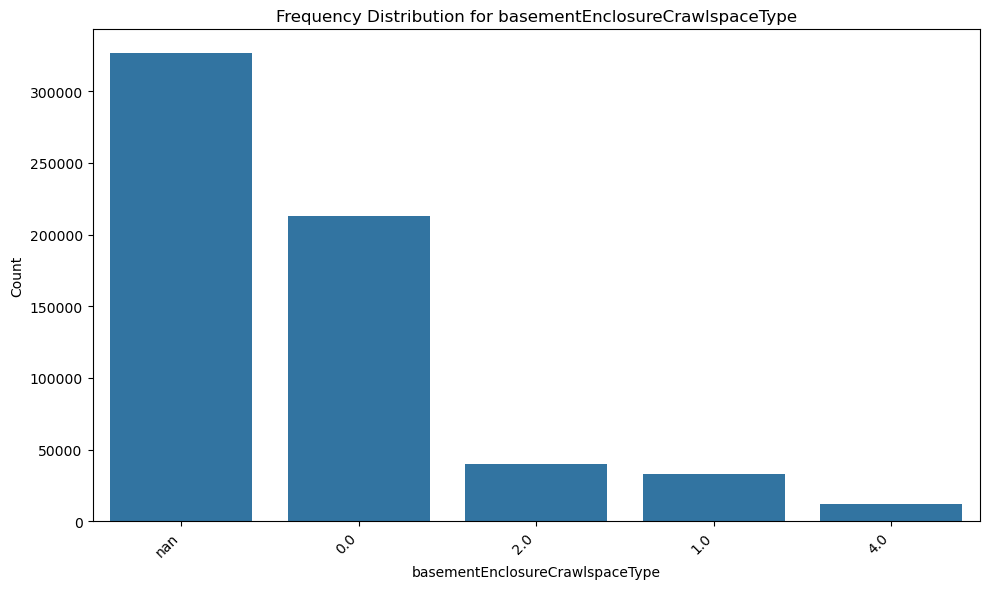


--- elevationDifference ---
Number of unique categories: 176
elevationDifference
None    406733
1.0      45243
0.0      40496
2.0      28740
3.0      17162
-1.0     11680
4.0      10929
-2.0      9264
-3.0      8361
5.0       7459
Name: count, dtype: int64


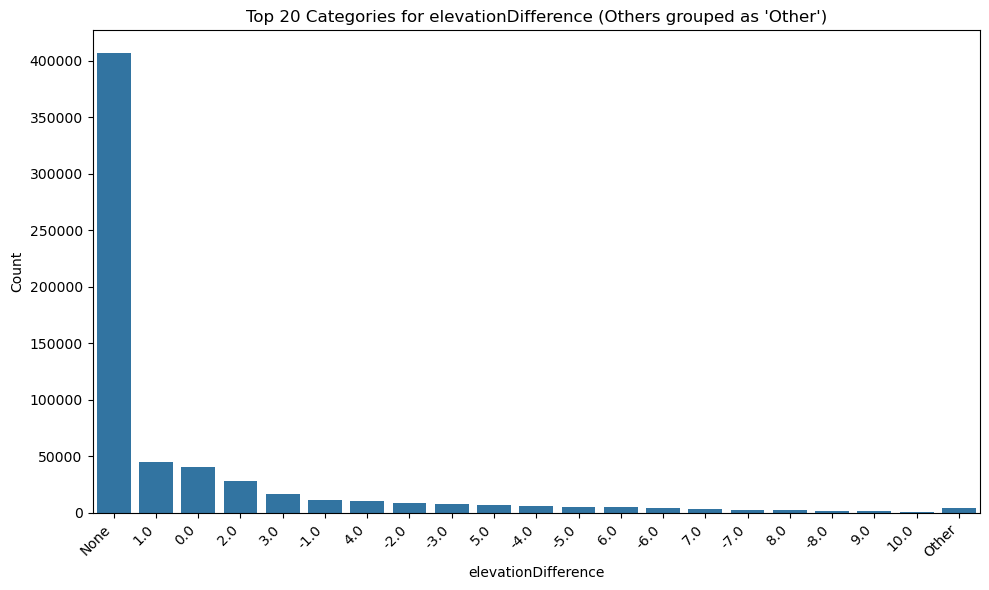


--- baseFloodElevation ---
Number of unique categories: 7050
baseFloodElevation
None    408067
8.0      20507
7.0      19414
9.0      19242
10.0     15759
11.0     10784
6.0       7473
12.0      6957
5.0       5016
13.0      4924
Name: count, dtype: int64


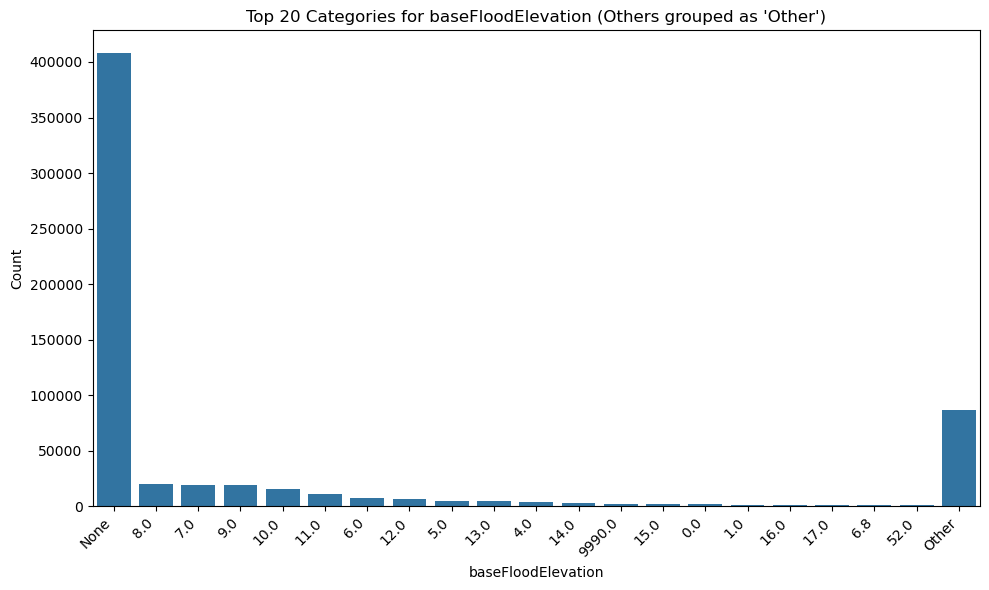


--- ratedFloodZone ---
Number of unique categories: 64
ratedFloodZone
AE      365912
X       161031
A        25413
VE       16886
C        10804
B         8980
AH        8333
AO        3410
None      2848
AHB       2488
Name: count, dtype: int64


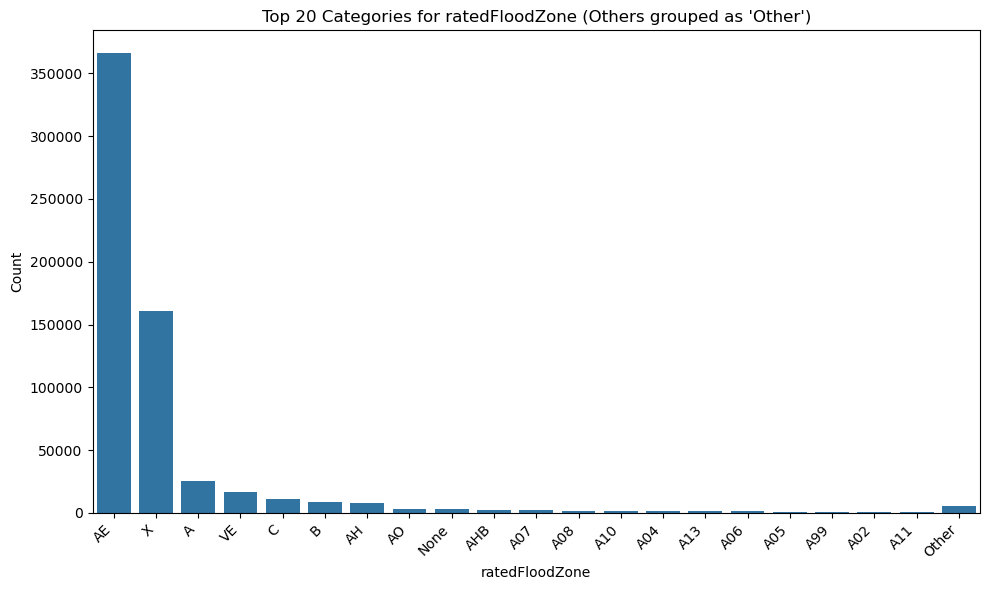


--- lowestAdjacentGrade ---
Number of unique categories: 9331
lowestAdjacentGrade
None    410283
0.0       9307
6.0       3061
5.0       2934
7.0       2461
4.8       2399
4.0       2394
6.5       2366
6.2       2348
5.1       2333
Name: count, dtype: int64


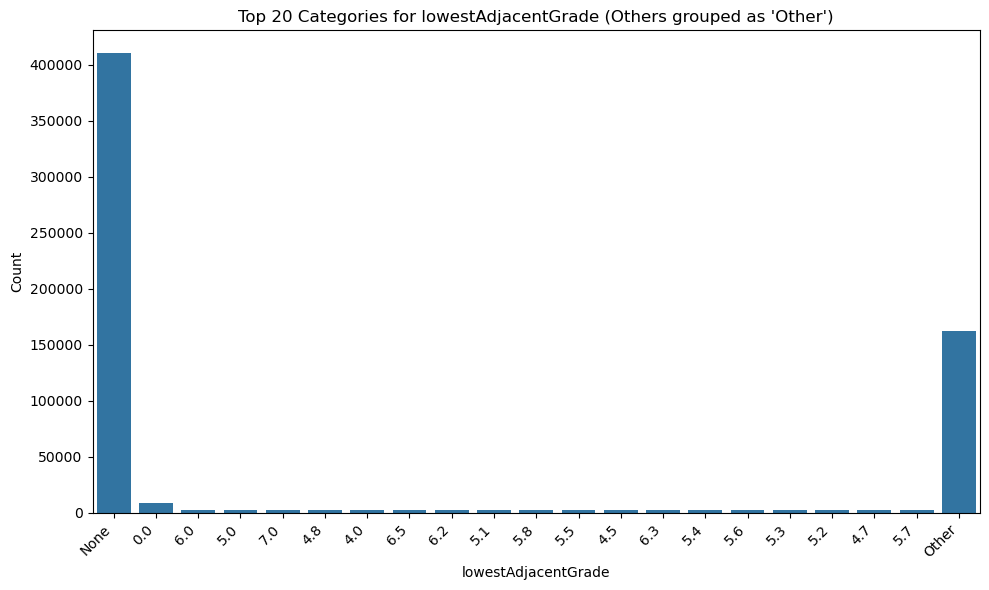


--- lowestFloorElevation ---
Number of unique categories: 9357
lowestFloorElevation
None    406720
0.0       2591
9.0       2300
8.0       2163
10.0      2098
7.0       2019
7.5       1876
8.5       1676
8.1       1672
9.1       1581
Name: count, dtype: int64


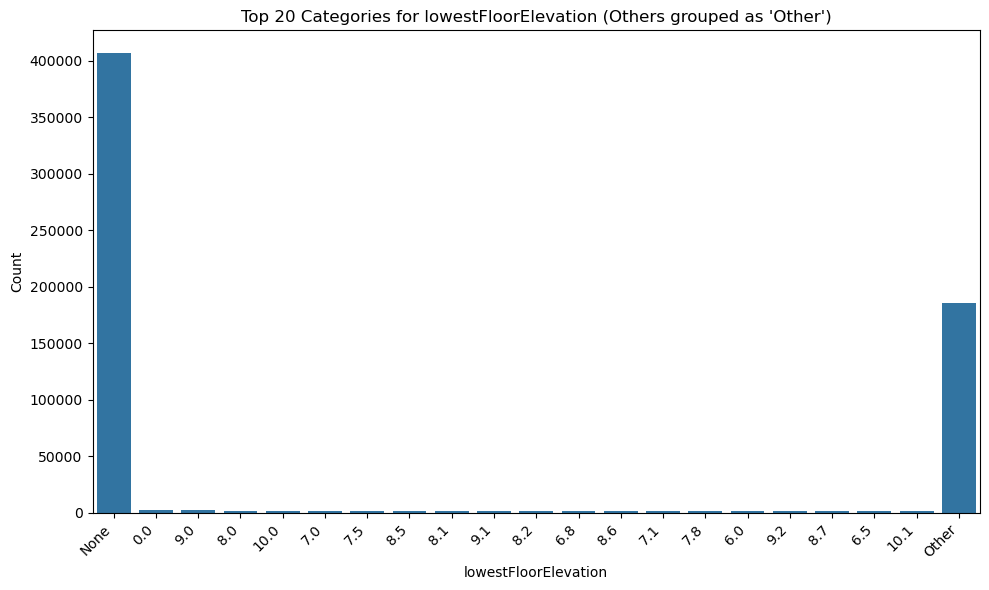


--- occupancyType ---
Number of unique categories: 15
occupancyType
1.0     393679
11.0    117179
6.0      29825
3.0      18123
2.0      17016
15.0     12164
18.0     10399
4.0       7729
16.0      6142
12.0      5743
Name: count, dtype: int64


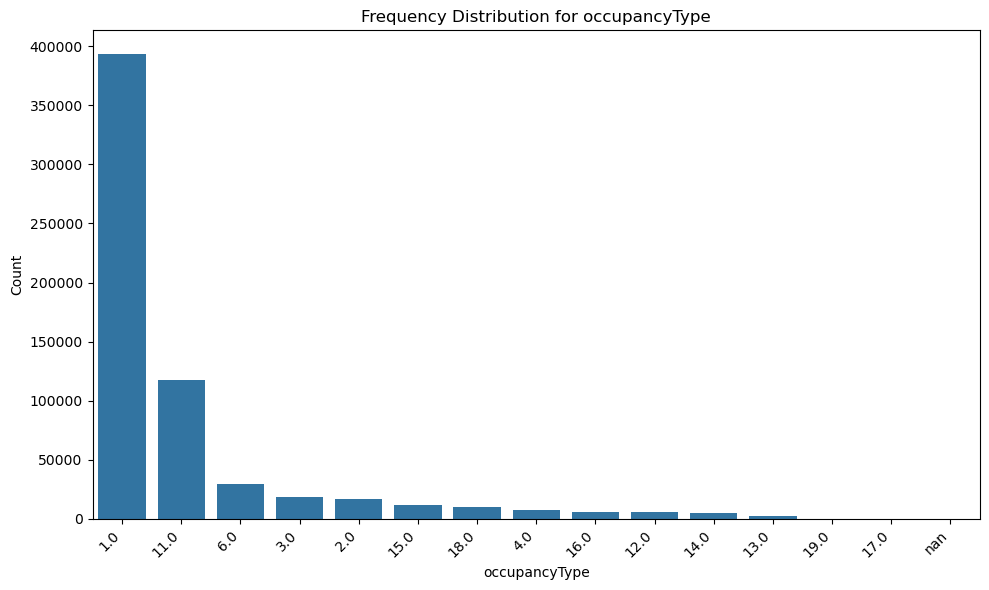


--- rateMethod ---
Number of unique categories: 20
rateMethod
1               246688
RatingEngine    157135
7               137353
B                38097
2                18905
R                15268
G                 4892
W                 4240
Q                 1285
S                  453
Name: count, dtype: int64


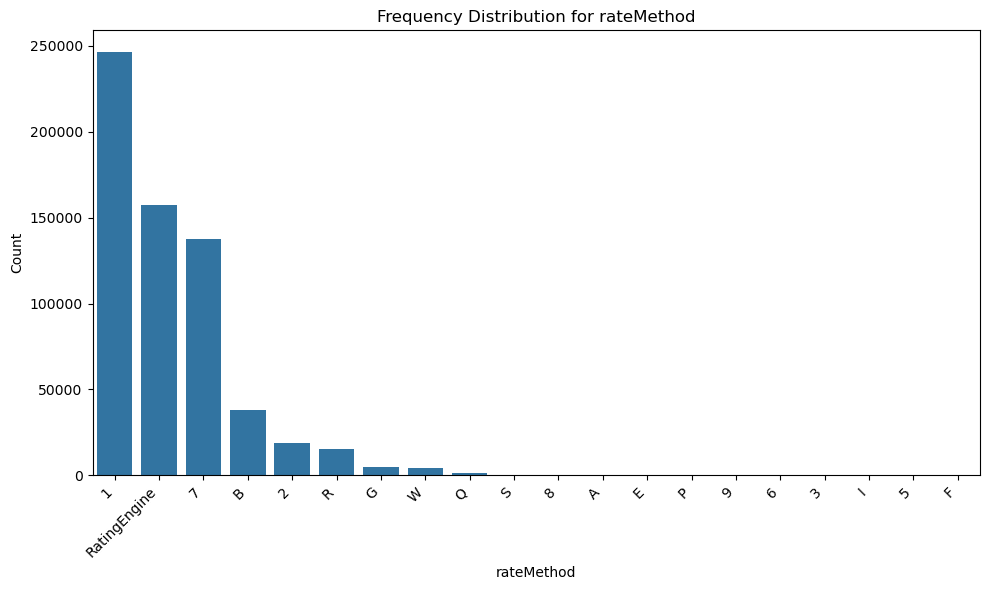


--- buildingDeductibleCode ---
Number of unique categories: 15
buildingDeductibleCode
F       263135
2       128981
5        92897
1        60124
A        28078
G        19858
None     12338
3         6820
D         3803
4         2443
Name: count, dtype: int64


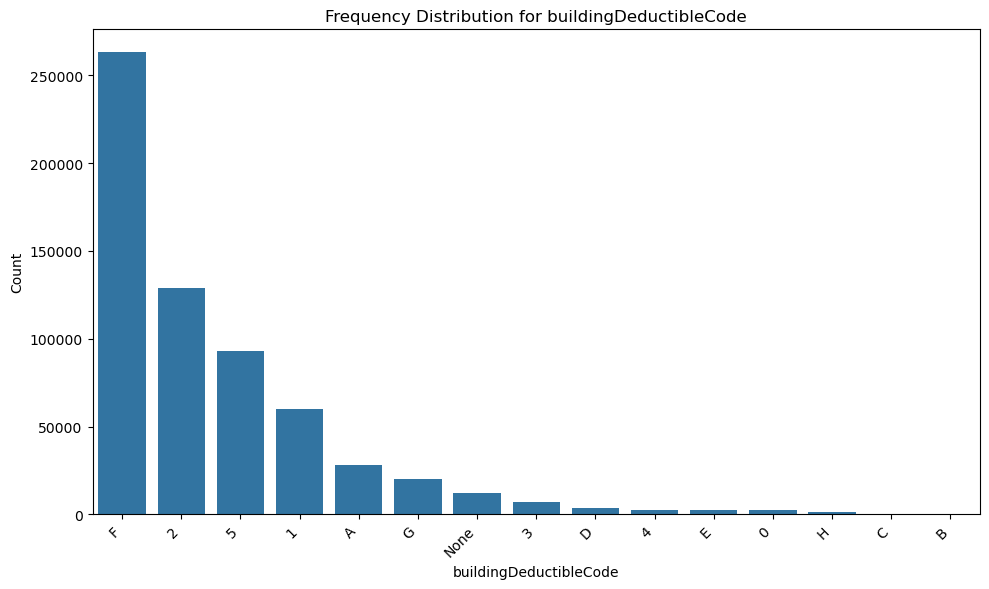


--- causeOfDamage ---
Number of unique categories: 13
causeOfDamage
4       256502
2       135841
0       111756
1       107811
None     10563
3         1342
D          571
A          369
B          181
C           54
Name: count, dtype: int64


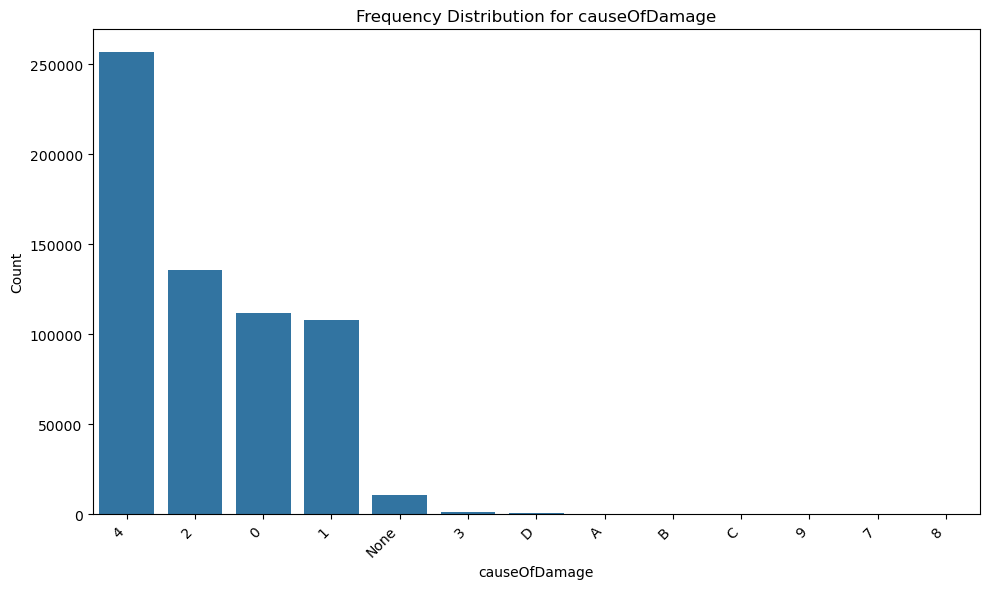


--- condominiumCoverageTypeCode ---
Number of unique categories: 6
condominiumCoverageTypeCode
N       588112
A        17614
U        13659
L         2931
None      1626
H         1112
Name: count, dtype: int64


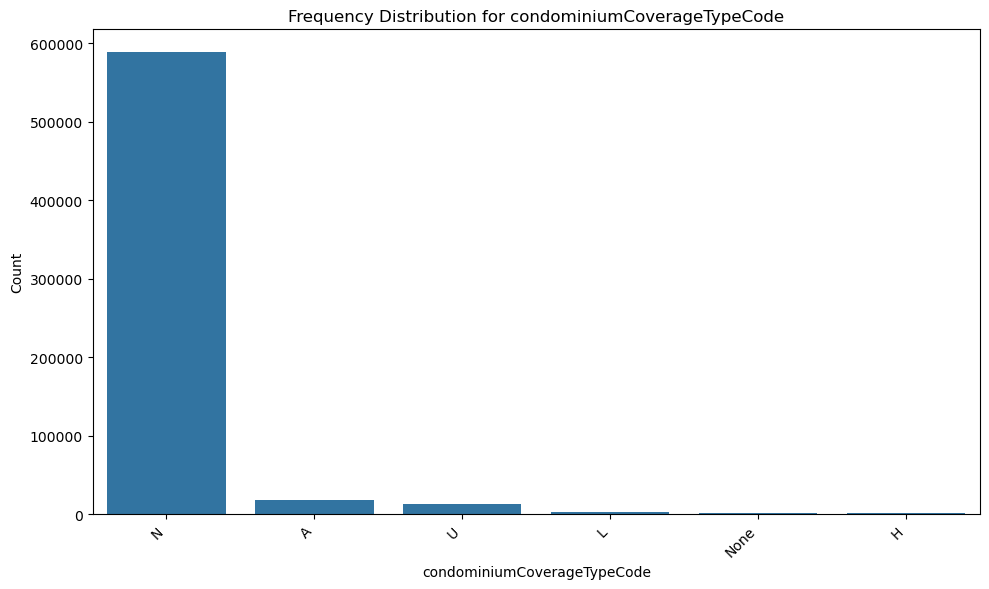


--- contentsDeductibleCode ---
Number of unique categories: 15
contentsDeductibleCode
F       204526
None    117804
1        99556
2        81747
0        46970
5        42248
A        12069
G        11215
3         4141
H         1531
Name: count, dtype: int64


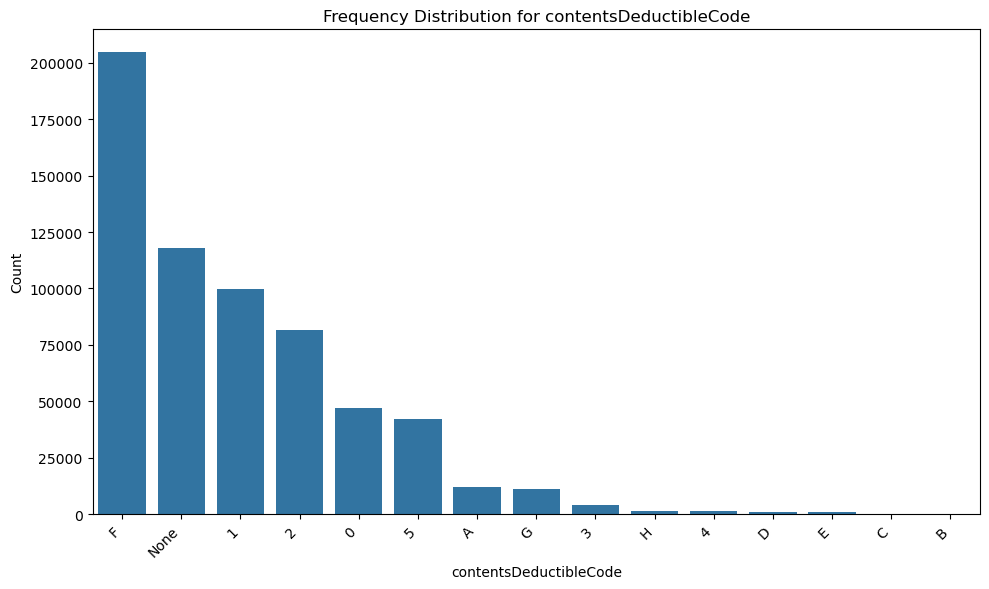


--- disasterAssistanceCoverageRequired ---
Number of unique categories: 5
disasterAssistanceCoverageRequired
0.0    340762
NaN    279775
5.0      2716
1.0      1689
2.0       112
Name: count, dtype: int64


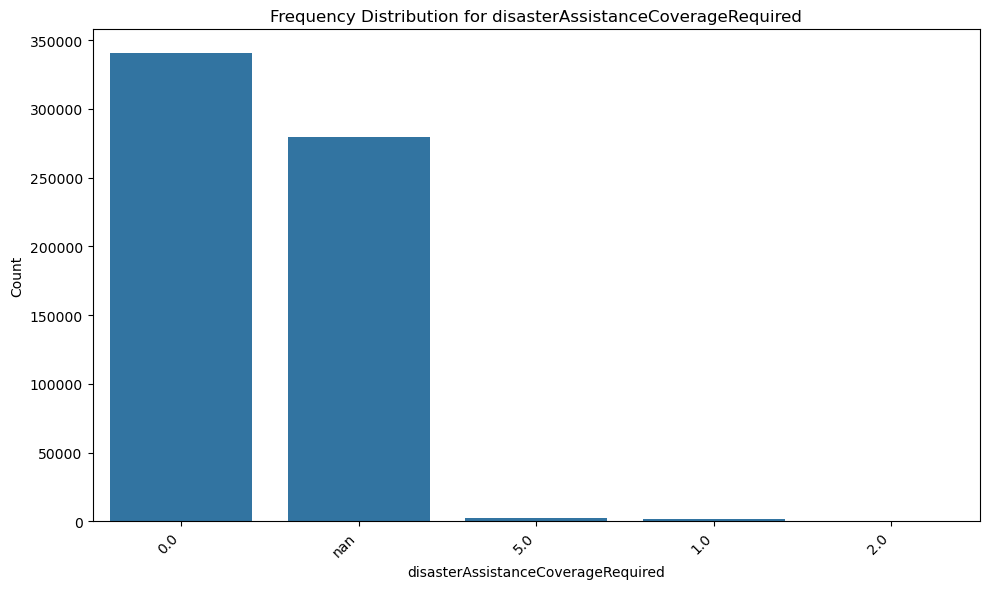


--- floodEvent ---
Number of unique categories: 87
floodEvent
None                        145606
Hurricane Harvey             92396
Hurricane Helene             57603
Hurricane Ian                48747
Hurricane Irma               33339
Mid-summer severe storms     30018
Hurricane Ida                28317
Hurricane Matthew            21818
Hurricane Milton             21281
Hurricane Florence           16801
Name: count, dtype: int64


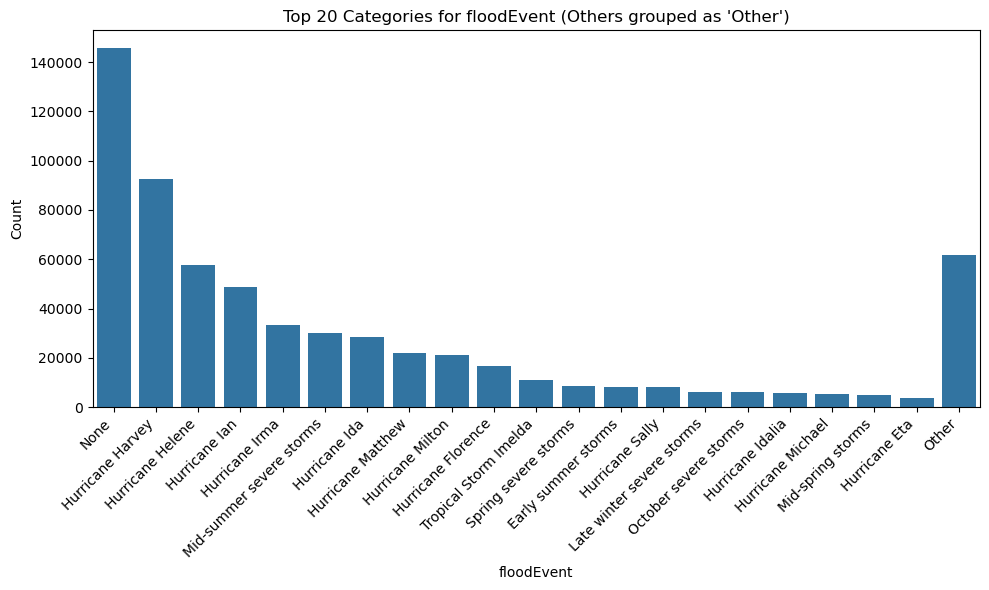


--- nfipRatedCommunityNumber ---
Number of unique categories: 11199
nfipRatedCommunityNumber
480296    41325
480287    21993
125124    20190
220058    11211
125148    10356
120061     7290
125144     6724
120067     6625
120112     6424
125095     6392
Name: count, dtype: int64


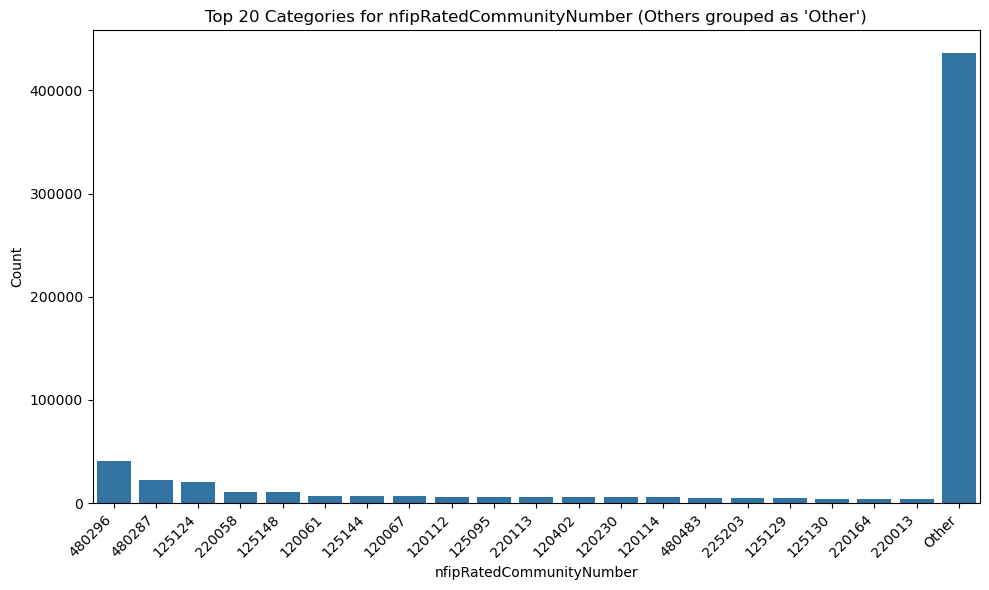


--- nfipCommunityNumberCurrent ---
Number of unique categories: 10491
nfipCommunityNumberCurrent
None      90779
480296    37146
480287    20246
125124    17240
220058     9876
125148     6747
120067     5951
125095     5834
220113     5413
120061     5121
Name: count, dtype: int64


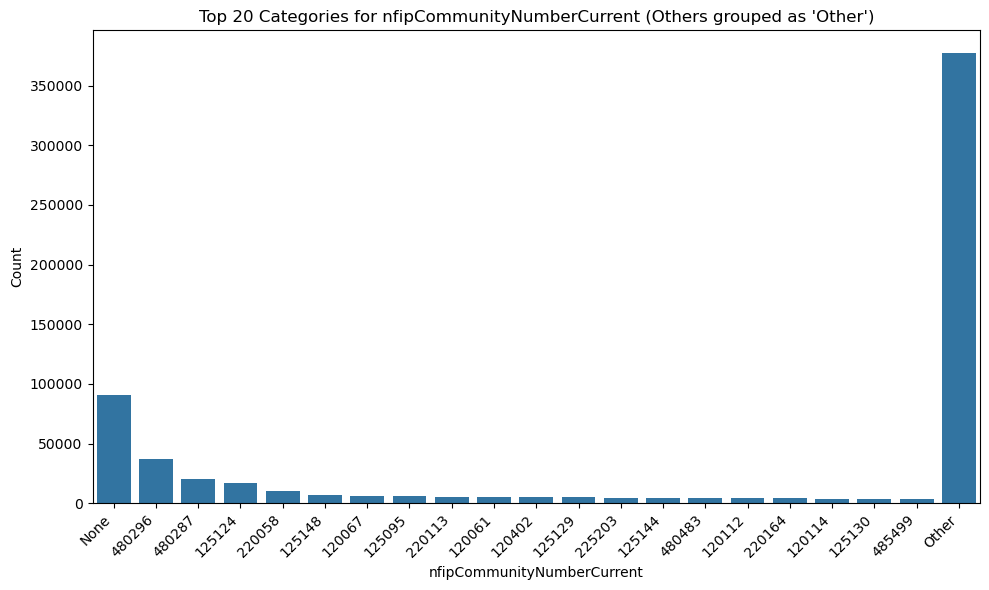


--- nfipCommunityName ---
Number of unique categories: 8934
nfipCommunityName
None                       40539
HOUSTON, CITY OF           37445
HARRIS COUNTY*             20430
LEE COUNTY*                20158
ST. PETERSBURG, CITY OF    10326
EAST BATON ROUGE PARISH     9910
CHARLOTTE COUNTY *          7284
SARASOTA COUNTY *           6710
COLLIER COUNTY *            6593
CAPE CORAL, CITY OF         6385
Name: count, dtype: int64


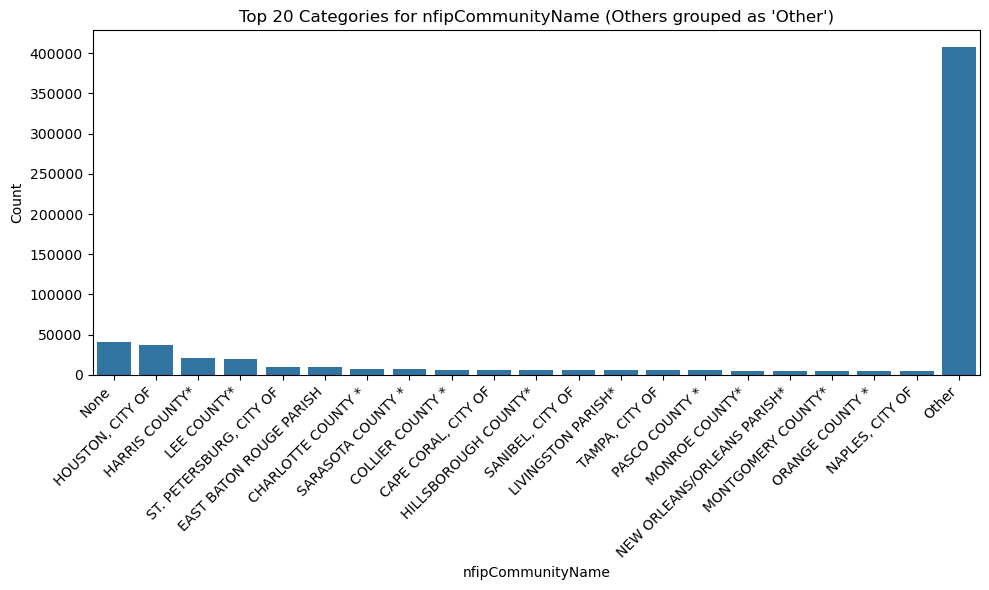

Column 'nonPaymentReasonContents' not found in DataFrame.
Column 'nonPaymentReasonBuilding' not found in DataFrame.

--- replacementCostBasis ---
Number of unique categories: 3
replacementCostBasis
A       373131
R       240601
None     11322
Name: count, dtype: int64


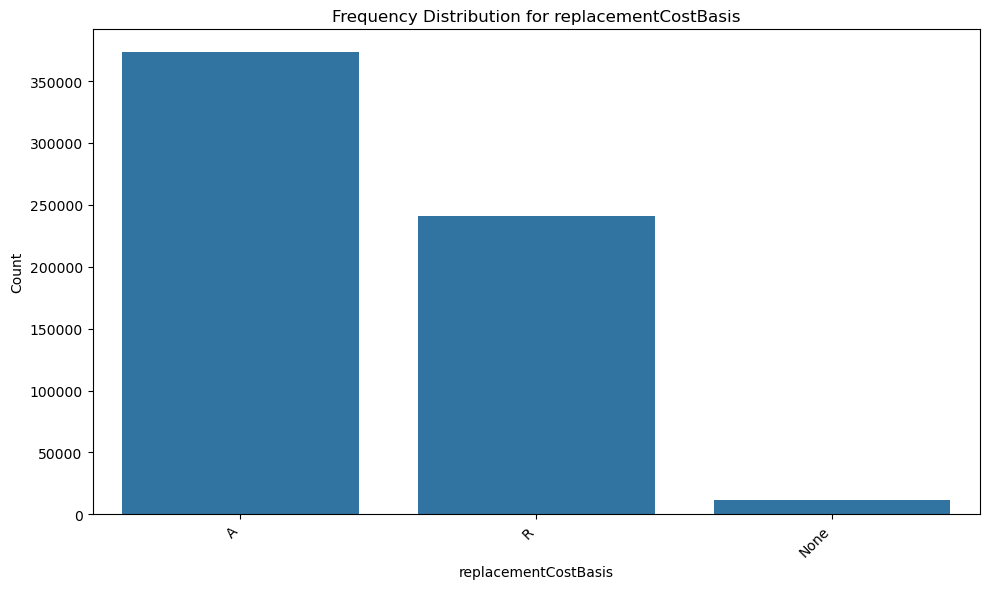


--- floodZoneCurrent ---
Number of unique categories: 60
floodZoneCurrent
AE      318605
X       133937
None     91964
A        21028
VE       18612
C         7528
B         7074
AHB       5822
AH        4540
AO        2334
Name: count, dtype: int64


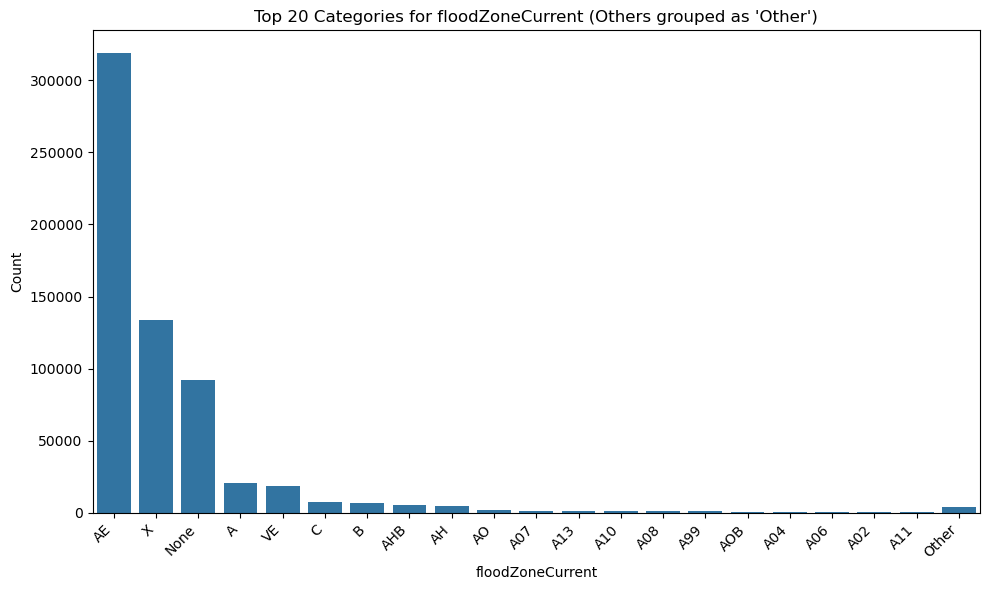


--- buildingDescriptionCode ---
Number of unique categories: 19
buildingDescriptionCode
1.0     496839
NaN      92404
8.0      26005
10.0      2445
5.0       2031
2.0       1752
6.0       1214
7.0        804
3.0        602
11.0       348
Name: count, dtype: int64


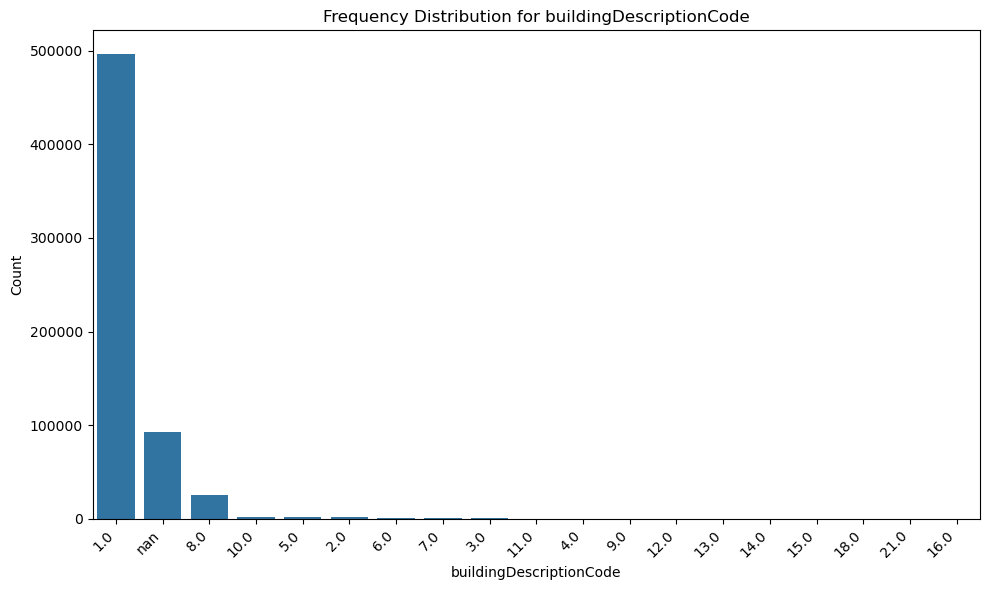


--- state ---
Number of unique categories: 55
state
FL    203521
TX    149235
LA     72320
NC     33037
SC     21333
NJ     14417
NY     13472
PA      9186
GA      7896
MO      7814
Name: count, dtype: int64


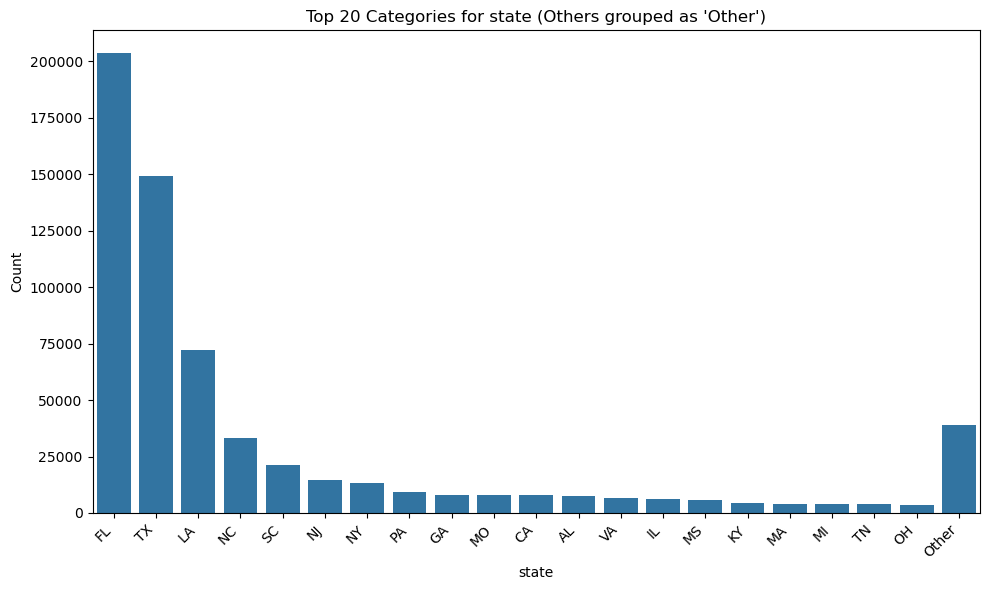


--- reportedCity ---
Number of unique categories: 1
reportedCity
Currently Unavailable    625054
Name: count, dtype: int64


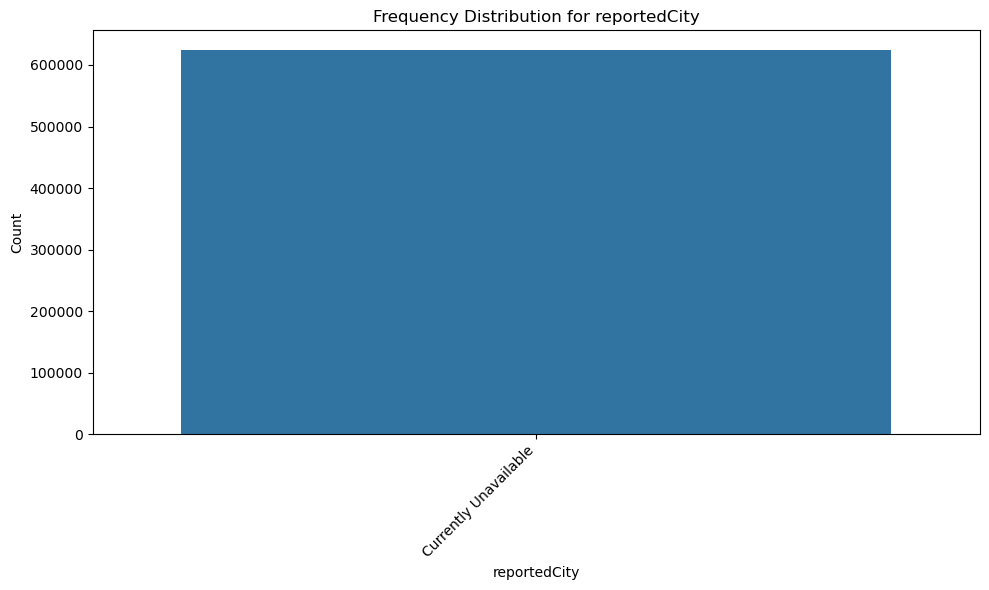


--- reportedZipCode ---
Number of unique categories: 16344
reportedZipCode
33908    8033
33957    5662
33706    4464
33703    4456
70726    4445
77096    4188
33931    4123
33708    3887
70068    3814
33914    3391
Name: count, dtype: int64


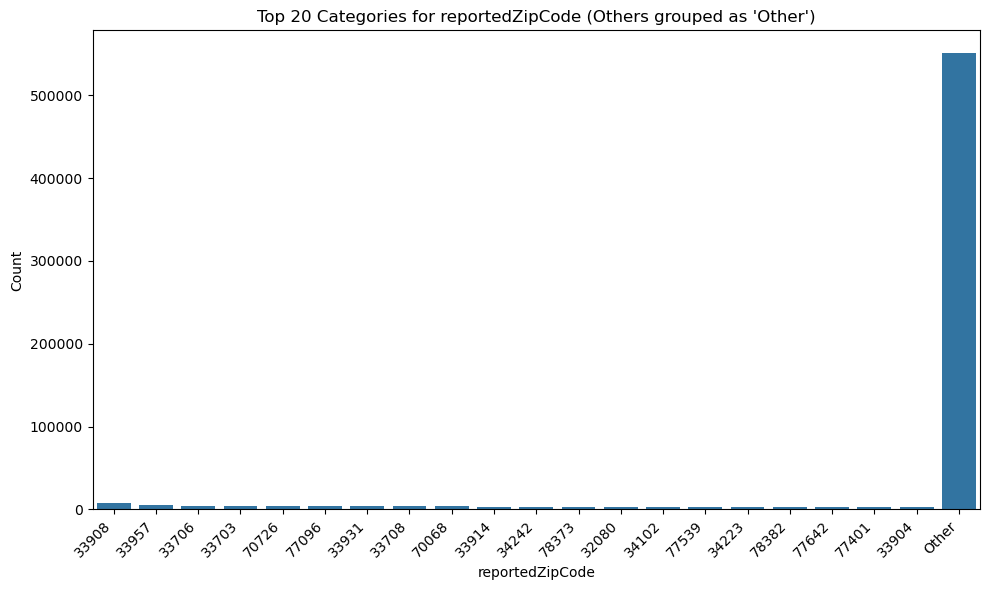


--- countyCode ---
Number of unique categories: 2632
countyCode
48201    73334
12071    39117
12103    30397
22033    13779
12021    12697
12057    12147
48245    10886
48167    10642
12115     9592
12087     8930
Name: count, dtype: int64


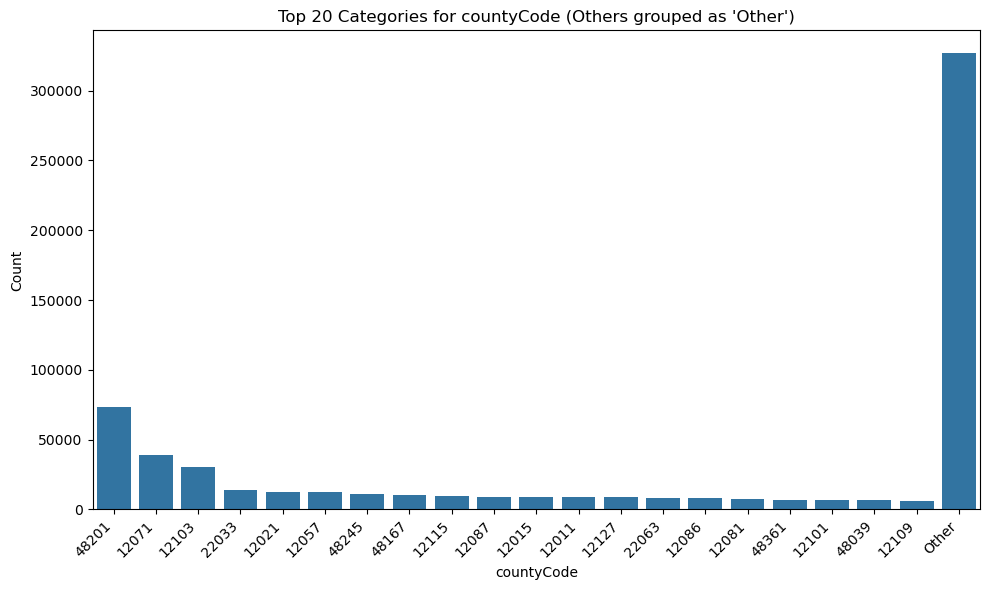


--- censusTract ---
Number of unique categories: 39207
censusTract
None           4589
12071080202    2499
37055970502    2174
12071050106    1992
48355005102    1921
12103024004    1803
12071080204    1790
22095070200    1647
12103024005    1594
12109020500    1557
Name: count, dtype: int64



--- censusBlockGroupFips ---
Number of unique categories: 65985
censusBlockGroupFips
None            4589
483550051022    1339
121030278022     926
120150303013     870
450130012001     846
450510402001     826
121030240041     825
121030240052     803
121030240051     791
120710501061     784
Name: count, dtype: int64


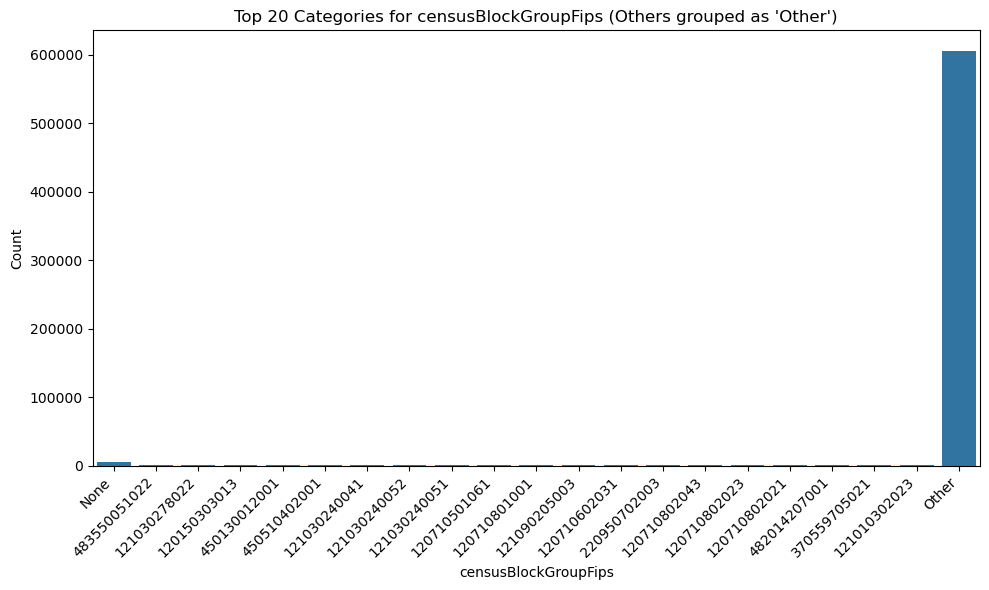

In [67]:
def visualize_categorical_fields(df, categorical_cols, max_unique=40, top_n=20):
    """
    For each categorical column in categorical_cols, this function:
      - Skips columns named "id" (case-insensitive).
      - Prints the number of unique categories and the top 10 frequency counts.
      - Plots a bar chart:
           * If the number of unique categories is <= max_unique, plots all categories.
           * Otherwise, plots the top_n categories and groups the remainder into an "Other" category.
    
    Parameters:
      df (pd.DataFrame): DataFrame containing categorical columns.
      categorical_cols (list): List of categorical column names.
      max_unique (int): Maximum number of unique categories to display fully (default=40).
      top_n (int): If unique count exceeds max_unique, only the top_n categories are plotted (default=20).
    
    Returns:
      None. Displays plots for each categorical column.
    """
    for col in categorical_cols:
        # Skip the "id" column (case-insensitive)
        if col.lower() == "id":
            continue
        
        if col not in df.columns:
            print(f"Column '{col}' not found in DataFrame.")
            continue
        
        value_counts = df[col].value_counts(dropna=False)
        num_unique = len(value_counts)
        
        print(f"\n--- {col} ---")
        print(f"Number of unique categories: {num_unique}")
        print(value_counts.head(10))
        
        plt.figure(figsize=(10, 6))
        if num_unique <= max_unique:
            # Plot full distribution
            sns.barplot(x=value_counts.index.astype(str), y=value_counts.values)
            plt.title(f"Frequency Distribution for {col}")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.xticks(rotation=45, ha='right')
        else:
            # Plot only top_n categories and group the rest as "Other"
            top_categories = value_counts.head(top_n)
            others_count = value_counts.iloc[top_n:].sum()
            # Use pd.concat instead of append
            plot_data = pd.concat([top_categories, pd.Series({"Other": others_count})])
            sns.barplot(x=plot_data.index.astype(str), y=plot_data.values)
            plt.title(f"Top {top_n} Categories for {col} (Others grouped as 'Other')")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Example usage:
# Ensure 'id' is in your categorical_cols list if it appears, but the function will skip it.
visualize_categorical_fields(nfip_valid, categorical_cols)


# Handling Categorical Columns Batch 1, 
## column -> basementEnclosureCrawlspaceType, 

In [69]:
def preprocess_first_categorical_batch(df, freq_threshold=0.01, mapping_dict=None):
    """
    Preprocesses the first batch of categorical fields by:
      1) Grouping rare categories (frequency below freq_threshold * total rows) into 'Other'.
      2) Standardizing category labels.
      
    Fields processed:
      - basementEnclosureCrawlspaceType
      - ratedFloodZone
      - obstructionType
      - occupancyType
      - rateMethod
      - buildingDeductibleCode
      - causeOfDamage
      - condominiumCoverageTypeCode
      
    Parameters:
      df (pd.DataFrame): The input DataFrame.
      freq_threshold (float): Proportion-based threshold to group rare categories into 'Other' (default 0.01).
      mapping_dict (dict): A dictionary where keys are column names and values are either:
                             - A mapping dictionary (e.g., {"0": "NONE", "1": "FINISHED", ...})
                             - None, meaning apply default standardization (strip & uppercase).
                             If not provided, a default mapping is used for basementEnclosureCrawlspaceType.
      
    Returns:
      pd.DataFrame: Updated DataFrame with rare categories grouped and standardized labels.
    """
    df_updated = df.copy()
    
    # Define default mapping if not provided
    if mapping_dict is None:
        mapping_dict = {
            "basementEnclosureCrawlspaceType": {
                 "0": "NONE",
                 "1": "FINISHED BASEMENT/ENCLOSURE",
                 "2": "UNFINISHED BASEMENT/ENCLOSURE",
                 "3": "CRAWLSPACE",
                 "4": "SUBGRADE CRAWLSPACE"
            },
            "ratedFloodZone": None,
            "obstructionType": None,
            "occupancyType": None,
            "rateMethod": None,
            "buildingDeductibleCode": None,
            "causeOfDamage": None,
            "condominiumCoverageTypeCode": None
        }
    
    # List of fields in the first categorical batch
    cat_fields = [
        "basementEnclosureCrawlspaceType",
        "ratedFloodZone",
        "obstructionType",
        "occupancyType",
        "rateMethod",
        "buildingDeductibleCode",
        "causeOfDamage",
        "condominiumCoverageTypeCode"
    ]
    
    total_rows = len(df_updated)
    threshold_count = total_rows * freq_threshold
    
    # Helper function: Group rare categories
    def group_rare_categories(col_series, threshold_count):
        counts = col_series.value_counts(dropna=False)
        rare_cats = counts[counts < threshold_count].index
        return col_series.where(~col_series.isin(rare_cats), other="Other")
    
    for field in cat_fields:
        if field not in df_updated.columns:
            print(f"Field '{field}' not found; skipping.")
            continue
        
        # Convert the field to string and strip whitespace
        df_updated[field] = df_updated[field].astype(str).str.strip()
        # Group rare categories into "Other"
        df_updated[field] = group_rare_categories(df_updated[field], threshold_count)
        
        # Standardize labels: if a mapping exists, apply it; else convert to uppercase.
        if field in mapping_dict and mapping_dict[field] is not None:
            df_updated[field] = df_updated[field].apply(lambda x: mapping_dict[field].get(x, x.upper()))
        else:
            df_updated[field] = df_updated[field].str.upper()
    
    return df_updated

# Example usage:
nfip_valid = preprocess_first_categorical_batch(nfip_valid, freq_threshold=0.01)
# Then, check the value counts for each field:
for field in ["basementEnclosureCrawlspaceType", "ratedFloodZone",
              "occupancyType", "rateMethod", "buildingDeductibleCode", "causeOfDamage",
              "condominiumCoverageTypeCode"]:
    print(f"\n--- {field} ---")
    print(nfip_valid[field].value_counts())


Field 'obstructionType' not found; skipping.

--- basementEnclosureCrawlspaceType ---
basementEnclosureCrawlspaceType
NAN    326880
0.0    212985
2.0     40021
1.0     33360
4.0     11808
Name: count, dtype: int64

--- ratedFloodZone ---
ratedFloodZone
AE       365912
X        161031
OTHER     27695
A         25413
VE        16886
C         10804
B          8980
AH         8333
Name: count, dtype: int64

--- occupancyType ---
occupancyType
1.0      393679
11.0     117179
6.0       29825
OTHER     18940
3.0       18123
2.0       17016
15.0      12164
18.0      10399
4.0        7729
Name: count, dtype: int64

--- rateMethod ---
rateMethod
1               246688
RATINGENGINE    157135
7               137353
B                38097
2                18905
R                15268
OTHER            11608
Name: count, dtype: int64

--- buildingDeductibleCode ---
buildingDeductibleCode
F        263135
2        128981
5         92897
1         60124
A         28078
G         19858
OTHER     12823
N

# Handling Categorical Columns Batch 2, 


In [71]:
import pandas as pd

def preprocess_second_categorical_batch(df, freq_threshold=0.01, mapping_dict=None):
    """
    Preprocesses the second batch of categorical fields by:
      1) Grouping rare categories (i.e. categories with frequency below freq_threshold * total rows) into "Other".
      2) Standardizing labels using a mapping dictionary (if provided) or converting values to uppercase.
      
    Second batch fields include:
      - contentsDeductibleCode
      - disasterAssistanceCoverageRequired
      - floodEvent
      - nfipRatedCommunityNumber
      - nonPaymentReasonContents
      - nonPaymentReasonBuilding
      - replacementCostBasis
      - buildingDescriptionCode

    Parameters:
      df (pd.DataFrame): Input DataFrame containing these fields.
      freq_threshold (float): Proportion threshold below which a category is considered rare (default 0.01).
      mapping_dict (dict): A dictionary mapping field names to their value mapping dictionaries.
                           For fields with no explicit mapping, set the value to None.
                           Example structure:
                           {
                             "contentsDeductibleCode": { "0": "$500", "1": "$1000", ..., "None": "MISSING" },
                             "disasterAssistanceCoverageRequired": { "0.0": "NOT REQUIRED", "1.0": "SBA", 
                                                                    "2.0": "FEMA", "4.0": "HHS", "5.0": "OTHER AGENCY", "NaN": "MISSING" },
                             "floodEvent": None,
                             "nfipRatedCommunityNumber": None,
                             "nonPaymentReasonContents": None,
                             "nonPaymentReasonBuilding": None,
                             "replacementCostBasis": { "A": "ACTUAL CASH VALUE", "R": "REPLACEMENT COST", "None": "MISSING" },
                             "buildingDescriptionCode": { 
                                  "1.0": "MAIN HOUSE", "2.0": "DETACHED GUEST HOUSE", "3.0": "DETACHED GARAGE",
                                  "4.0": "AGRICULTURAL BUILDING", "5.0": "WAREHOUSE", "6.0": "POOL HOUSE/CLUBHOUSE",
                                  "7.0": "TOOL/STORAGE SHED", "8.0": "OTHER", "9.0": "BARN",
                                  "10.0": "APARTMENT BUILDING", "11.0": "APARTMENT - UNIT", 
                                  "12.0": "COOPERATIVE BUILDING", "13.0": "COOPERATIVE - UNIT",
                                  "14.0": "COMMERCIAL BUILDING", "15.0": "CONDOMINIUM (ENTIRE BUILDING)", 
                                  "16.0": "CONDOMINIUM - UNIT", "17.0": "HOUSE OF WORSHIP",
                                  "18.0": "MANUFACTURED (MOBILE) HOME", "19.0": "TRAVEL TRAILER", 
                                  "20.0": "TOWNHOUSE/ROWHOUSE", "NaN": "MISSING"
                             }
                           }
    Returns:
      pd.DataFrame: Updated DataFrame with rare categories grouped and labels standardized.
    """
    df_updated = df.copy()
    total_rows = len(df_updated)
    threshold_count = total_rows * freq_threshold
    
    # Default mapping dictionary if not provided:
    if mapping_dict is None:
        mapping_dict = {
            "contentsDeductibleCode": {
                "0": "$500", "1": "$1000", "2": "$2000", "3": "$3000", "4": "$4000",
                "5": "$5000", "9": "$750", "A": "$10000", "B": "$15000", "C": "$20000",
                "D": "$25000", "E": "$50000", "F": "$1250", "G": "$1500", "H": "$200",
                "None": "MISSING"
            },
            "disasterAssistanceCoverageRequired": {
                "0.0": "NOT REQUIRED", "1.0": "SBA", "2.0": "FEMA", "4.0": "HHS", "5.0": "OTHER AGENCY",
                "NaN": "MISSING"
            },
            "floodEvent": None,  # Default: uppercase
            "nfipRatedCommunityNumber": None,  # Default: uppercase
            "nonPaymentReasonContents": None,  # Default: uppercase
            "nonPaymentReasonBuilding": None,  # Default: uppercase
            "replacementCostBasis": {
                "A": "ACTUAL CASH VALUE", "R": "REPLACEMENT COST", "None": "MISSING"
            },
            "buildingDescriptionCode": {
                "1.0": "MAIN HOUSE", "2.0": "DETACHED GUEST HOUSE", "3.0": "DETACHED GARAGE",
                "4.0": "AGRICULTURAL BUILDING", "5.0": "WAREHOUSE", "6.0": "POOL HOUSE/CLUBHOUSE",
                "7.0": "TOOL/STORAGE SHED", "8.0": "OTHER", "9.0": "BARN",
                "10.0": "APARTMENT BUILDING", "11.0": "APARTMENT - UNIT", 
                "12.0": "COOPERATIVE BUILDING", "13.0": "COOPERATIVE - UNIT",
                "14.0": "COMMERCIAL BUILDING", "15.0": "CONDOMINIUM (ENTIRE BUILDING)",
                "16.0": "CONDOMINIUM - UNIT", "17.0": "HOUSE OF WORSHIP",
                "18.0": "MANUFACTURED (MOBILE) HOME", "19.0": "TRAVEL TRAILER", 
                "20.0": "TOWNHOUSE/ROWHOUSE", "NaN": "MISSING"
            }
        }
    
    # List of fields in second batch
    cat_fields = [
        "contentsDeductibleCode",
        "disasterAssistanceCoverageRequired",
        "floodEvent",
        "nfipRatedCommunityNumber",
        "buildingDescriptionCode"
    ]
    
    # Helper function: Group rare categories by replacing those with frequency below threshold_count with "Other".
    def group_rare_categories(series, threshold):
        counts = series.value_counts(dropna=False)
        rare = counts[counts < threshold].index
        return series.where(~series.isin(rare), other="Other")
    
    for field in cat_fields:
        if field not in df_updated.columns:
            print(f"Field '{field}' not found; skipping.")
            continue
        
        # Convert the column to string (if not already) and strip extra whitespace
        df_updated[field] = df_updated[field].astype(str).str.strip()
        
        # Group rare categories
        df_updated[field] = group_rare_categories(df_updated[field], threshold_count)
        
        # Standardize labels: if a mapping dictionary exists for the field, apply it;
        # otherwise, simply convert to uppercase.
        field_map = mapping_dict.get(field, None)
        if field_map is not None:
            # Use mapping, and for any value not in mapping, use uppercase.
            df_updated[field] = df_updated[field].apply(lambda x: field_map.get(x, x.upper()))
        else:
            df_updated[field] = df_updated[field].str.upper()
    
    return df_updated

# Example usage:
# Assuming nfip_valid is your DataFrame and these fields are among your categorical columns.
nfip_valid = preprocess_second_categorical_batch(nfip_valid, freq_threshold=0.01)
for field in ["contentsDeductibleCode",
        "disasterAssistanceCoverageRequired",
        "floodEvent",
        "nfipRatedCommunityNumber",
        "replacementCostBasis",
        "buildingDescriptionCode"]:
    print(f"\n--- {field} ---")
    print(nfip_valid[field].value_counts())


--- contentsDeductibleCode ---
contentsDeductibleCode
$1250      204526
MISSING    117804
$1000       99556
$2000       81747
$500        46970
$5000       42248
$10000      12069
$1500       11215
OTHER        8919
Name: count, dtype: int64

--- disasterAssistanceCoverageRequired ---
disasterAssistanceCoverageRequired
NOT REQUIRED    340762
NAN             279775
OTHER             4517
Name: count, dtype: int64

--- floodEvent ---
floodEvent
NONE                        145606
OTHER                        93281
HURRICANE HARVEY             92396
HURRICANE HELENE             57603
HURRICANE IAN                48747
HURRICANE IRMA               33339
MID-SUMMER SEVERE STORMS     30018
HURRICANE IDA                28317
HURRICANE MATTHEW            21818
HURRICANE MILTON             21281
HURRICANE FLORENCE           16801
TROPICAL STORM IMELDA        10940
SPRING SEVERE STORMS          8433
EARLY SUMMER STORMS           8354
HURRICANE SALLY               8120
Name: count, dtype: int64



# Handling Categorical Columns Batch 3, 


In [74]:
import pandas as pd

def preprocess_third_categorical_batch(df, freq_threshold=0.01, custom_thresholds=None):
    """
    Preprocesses the third batch of categorical fields by:
      1) Grouping rare categories (categories with frequency below a threshold) into "Other".
      2) Standardizing labels (converting to uppercase).
    
    Fields in the third categorical batch:
      - state
      - reportedCity
      - reportedZipCode
      - countyCode
      - censusTract
      - censusBlockGroupFips
    
    Parameters:
      df (pd.DataFrame): The DataFrame containing these fields.
      freq_threshold (float): The default proportion threshold for grouping rare categories (default=0.01).
      custom_thresholds (dict): Optional dictionary mapping field names to a custom threshold proportion.
          For example:
              {
                  "reportedZipCode": 0.001,
                  "censusTract": 0.001,
                  "censusBlockGroupFips": 0.001
              }
    
    Returns:
      pd.DataFrame: Updated DataFrame with rare categories grouped and labels standardized.
    """
    df_updated = df.copy()
    total_rows = len(df_updated)
    
    # List of fields in the third categorical batch:
    cat_fields = [
        "state",
        "reportedCity",
        "reportedZipCode",
        "countyCode",
        "censusTract",
        "censusBlockGroupFips"
    ]
    
    # Helper function to group rare categories by replacing categories with frequency below threshold_count with "Other".
    def group_rare_categories(series, threshold_count):
        counts = series.value_counts(dropna=False)
        rare = counts[counts < threshold_count].index
        return series.where(~series.isin(rare), other="Other")
    
    for field in cat_fields:
        if field not in df_updated.columns:
            print(f"Field '{field}' not found; skipping.")
            continue
        
        # Convert field to string and strip whitespace
        df_updated[field] = df_updated[field].astype(str).str.strip()
        
        # Determine the threshold count to use for this field:
        if custom_thresholds is not None and field in custom_thresholds:
            current_threshold = custom_thresholds[field]
            print(f"Using custom threshold of {current_threshold*100:.2f}% for field '{field}'.")
        else:
            current_threshold = freq_threshold
        
        threshold_count = total_rows * current_threshold
        
        # Group rare categories
        df_updated[field] = group_rare_categories(df_updated[field], threshold_count)
        
        # Standardize labels by converting to uppercase
        df_updated[field] = df_updated[field].str.upper()
    
    return df_updated

# Example usage:
# For high-cardinality fields, we want a lower threshold:
custom_thresholds = {
    "reportedZipCode": 0.001,         # 0.1% instead of 1%
    "censusTract": 0.001,
    "censusBlockGroupFips": 0.001
}

# Then run the function:
nfip_valid = preprocess_third_categorical_batch(nfip_valid, freq_threshold=0.01, custom_thresholds=custom_thresholds)

# Optionally, verify the updated counts:
for field in ["state", "reportedCity", "reportedZipCode", "countyCode", "censusTract", "censusBlockGroupFips"]:
    print(f"\n--- {field} ---")
    print(nfip_valid[field].value_counts().head(10))


Using custom threshold of 0.10% for field 'reportedZipCode'.
Using custom threshold of 0.10% for field 'censusTract'.
Using custom threshold of 0.10% for field 'censusBlockGroupFips'.

--- state ---
state
FL       203521
TX       149235
LA        72320
OTHER     71026
NC        33037
SC        21333
NJ        14417
NY        13472
PA         9186
GA         7896
Name: count, dtype: int64

--- reportedCity ---
reportedCity
CURRENTLY UNAVAILABLE    625054
Name: count, dtype: int64

--- reportedZipCode ---
reportedZipCode
OTHER    347907
33908      8033
33957      5662
33706      4464
33703      4456
70726      4445
77096      4188
33931      4123
33708      3887
70068      3814
Name: count, dtype: int64

--- countyCode ---
countyCode
OTHER    326795
48201     73334
12071     39117
12103     30397
22033     13779
12021     12697
12057     12147
48245     10886
48167     10642
12115      9592
Name: count, dtype: int64

--- censusTract ---
censusTract
OTHER          530623
NONE             

In [77]:
categorical_cols

['basementEnclosureCrawlspaceType',
 'elevationDifference',
 'baseFloodElevation',
 'ratedFloodZone',
 'lowestAdjacentGrade',
 'lowestFloorElevation',
 'occupancyType',
 'rateMethod',
 'buildingDeductibleCode',
 'causeOfDamage',
 'condominiumCoverageTypeCode',
 'contentsDeductibleCode',
 'disasterAssistanceCoverageRequired',
 'floodEvent',
 'nfipRatedCommunityNumber',
 'nfipCommunityNumberCurrent',
 'nfipCommunityName',
 'nonPaymentReasonContents',
 'nonPaymentReasonBuilding',
 'replacementCostBasis',
 'floodZoneCurrent',
 'buildingDescriptionCode',
 'state',
 'reportedCity',
 'reportedZipCode',
 'countyCode',
 'censusTract',
 'censusBlockGroupFips']

In [78]:
nfip_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625054 entries, 0 to 2690103
Data columns (total 58 columns):
 #   Column                              Non-Null Count   Dtype              
---  ------                              --------------   -----              
 0   agricultureStructureIndicator       625054 non-null  int64              
 1   asOfDate                            625054 non-null  datetime64[us, UTC]
 2   basementEnclosureCrawlspaceType     625054 non-null  object             
 3   crsClassificationCode               422052 non-null  float32            
 4   dateOfLoss                          625054 non-null  datetime64[ns]     
 5   elevatedBuildingIndicator           625054 non-null  int64              
 6   elevationDifference                 218321 non-null  object             
 7   baseFloodElevation                  216987 non-null  object             
 8   ratedFloodZone                      625054 non-null  object             
 9   houseWorship                  

In [503]:
type(nfip_valid["censusBlockGroupFips"][0])

str

## C: Visualize date fields data for handling outliers


--- Summary Statistics for asOfDate (Year) ---
count    625054.000000
mean       2022.588528
std           1.873756
min        2019.000000
25%        2020.000000
50%        2024.000000
75%        2024.000000
max        2025.000000
Name: asOfDate, dtype: float64


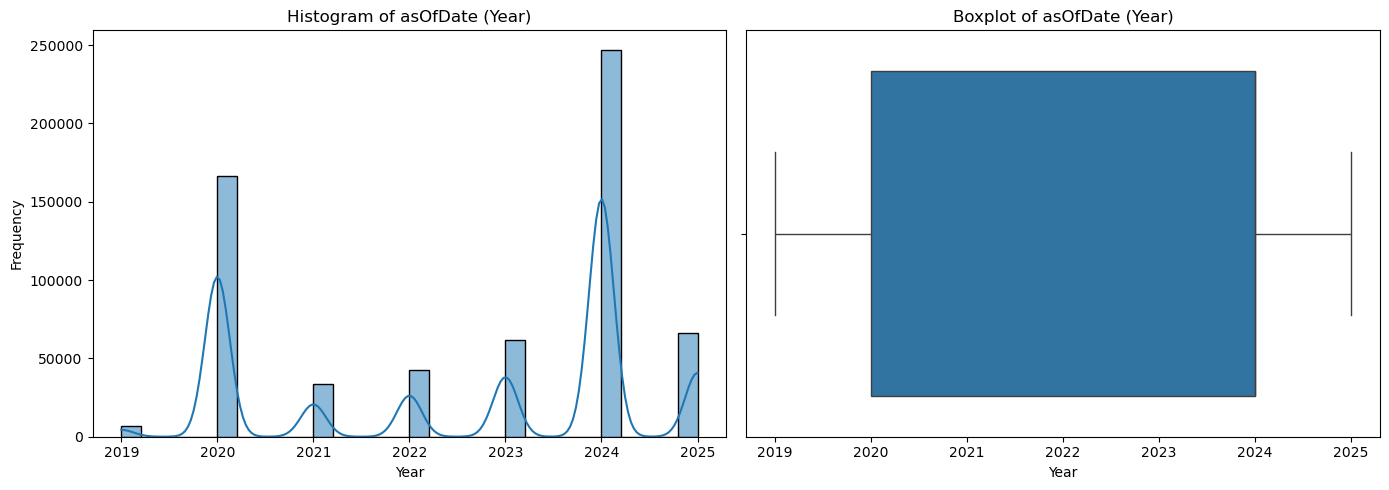


--- Summary Statistics for dateOfLoss (Year) ---
count    625054.000000
mean       2019.120834
std           3.108202
min        2014.000000
25%        2017.000000
50%        2018.000000
75%        2022.000000
max        2024.000000
Name: dateOfLoss, dtype: float64



--- Summary Statistics for originalConstructionDate (Year) ---
count    620105.000000
mean       1976.247723
std          22.083690
min        1701.000000
25%        1964.000000
50%        1976.000000
75%        1992.000000
max        2024.000000
Name: originalConstructionDate, dtype: float64


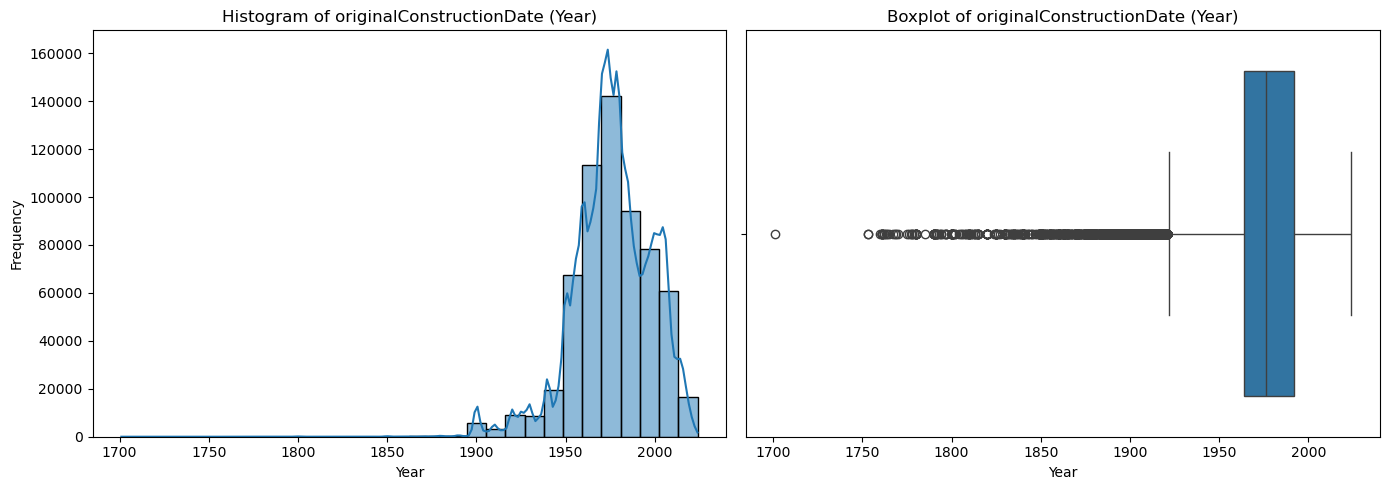


--- Summary Statistics for originalNBDate (Year) ---
count    624970.000000
mean       2012.280404
std           7.043302
min        1900.000000
25%        2009.000000
50%        2013.000000
75%        2017.000000
max        2025.000000
Name: originalNBDate, dtype: float64


In [799]:

def visualize_date_fields(df, date_cols):
    """
    For each date column in date_cols, this function:
      - Converts the column to datetime (if necessary).
      - Extracts the year component.
      - Prints summary statistics for the year.
      - Plots a histogram (with KDE) and a boxplot for the year distribution.
    
    Parameters:
      df (pd.DataFrame): DataFrame containing date columns.
      date_cols (list): List of column names that should be dates.
    """
    for col in date_cols:
        if col not in df.columns:
            print(f"Column '{col}' not found in DataFrame.")
            continue
        
        # Convert to datetime if not already
        df[col] = pd.to_datetime(df[col], errors='coerce')
        # Extract the year for visualization
        year_data = df[col].dt.year.dropna()
        
        print(f"\n--- Summary Statistics for {col} (Year) ---")
        print(year_data.describe())
        
        # Plot histogram with KDE for year
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        sns.histplot(year_data, ax=axes[0], kde=True, bins=30)
        axes[0].set_title(f"Histogram of {col} (Year)")
        axes[0].set_xlabel("Year")
        axes[0].set_ylabel("Frequency")
        
        # Plot boxplot for year
        sns.boxplot(x=year_data, ax=axes[1])
        axes[1].set_title(f"Boxplot of {col} (Year)")
        axes[1].set_xlabel("Year")
        
        plt.tight_layout()
        plt.show()

# Example usage:
date_columns = ['asOfDate', 'dateOfLoss', 'originalConstructionDate', 'originalNBDate']
visualize_date_fields(nfip_valid, date_columns)


In [800]:
nfip_valid[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 625054 entries, 0 to 2690103
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   asOfDate                  625054 non-null  datetime64[us, UTC]
 1   dateOfLoss                625054 non-null  datetime64[ns]     
 2   originalConstructionDate  620105 non-null  datetime64[ns]     
 3   originalNBDate            624970 non-null  datetime64[ns]     
dtypes: datetime64[ns](3), datetime64[us, UTC](1)
memory usage: 40.0 MB


# Handling Outliers in Date Type fields.

In [114]:
def handle_date_outliers(df):
    """
    Checks the date fields and sets out-of-range dates to NaT based on defined valid ranges.
    
    Valid Ranges (Years):
      - asOfDate: [2019, 2025]
      - dateOfLoss: [1978, 2025]
      - originalConstructionDate: [1800, 2024]
      - originalNBDate: [1900, 2025]
      
    Parameters:
      df (pd.DataFrame): DataFrame containing date fields.
      
    Returns:
      pd.DataFrame: Updated DataFrame with out-of-range date values replaced with NaT.
    """
    df_updated = df.copy()
    
    # asOfDate: Valid [2014, 2025]
    if "asOfDate" in df_updated.columns:
        mask = (df_updated["asOfDate"].dt.year < 2014) | (df_updated["asOfDate"].dt.year > 2025)
        num_outliers = mask.sum()
        print(f"asOfDate: Found {num_outliers} records outside 2014-2025.")
        df_updated.loc[mask, "asOfDate"] = pd.NaT
    else:
        print("Column 'asOfDate' not found.")
    
    # dateOfLoss: Valid [2014, 2025]
    if "dateOfLoss" in df_updated.columns:
        mask = (df_updated["dateOfLoss"].dt.year < 2014) | (df_updated["dateOfLoss"].dt.year > 2025)
        num_outliers = mask.sum()
        print(f"dateOfLoss: Found {num_outliers} records outside 2014-2025.")
        df_updated.loc[mask, "dateOfLoss"] = pd.NaT
    else:
        print("Column 'dateOfLoss' not found.")
    
    # originalConstructionDate: Valid [1800, 2024]
    if "originalConstructionDate" in df_updated.columns:
        mask = (df_updated["originalConstructionDate"].dt.year < 1800) | (df_updated["originalConstructionDate"].dt.year > 2024)
        num_outliers = mask.sum()
        print(f"originalConstructionDate: Found {num_outliers} records outside 1800-2024.")
        df_updated.loc[mask, "originalConstructionDate"] = pd.NaT
    else:
        print("Column 'originalConstructionDate' not found.")
    
    # originalNBDate: Valid [1900, 2025]
    if "originalNBDate" in df_updated.columns:
        mask = (df_updated["originalNBDate"].dt.year < 1900) | (df_updated["originalNBDate"].dt.year > 2025)
        num_outliers = mask.sum()
        print(f"originalNBDate: Found {num_outliers} records outside 1900-2025.")
        df_updated.loc[mask, "originalNBDate"] = pd.NaT
    else:
        print("Column 'originalNBDate' not found.")
    
    return df_updated

# Example usage:
# Run this function before engineering date features
nfip_valid = handle_date_outliers(nfip_valid)
# Optionally, verify the updated counts:
for field in date_columns:
    print(f"\n--- {field} ---")
    print(nfip_valid[field].value_counts().head(10))



asOfDate: Found 0 records outside 2014-2025.
dateOfLoss: Found 0 records outside 2014-2025.
originalConstructionDate: Found 55 records outside 1800-2024.
originalNBDate: Found 0 records outside 1900-2025.

--- asOfDate ---
asOfDate
2020-01-22 16:55:53.194965+00:00    133364
2023-06-30 21:32:16.717188+00:00      1982
2019-10-19 03:42:08.849596+00:00      1981
2019-09-19 13:45:58.425000+00:00      1896
2019-09-19 06:12:43.388000+00:00      1368
2022-11-19 00:19:54.563423+00:00      1332
2022-05-20 18:40:20.659615+00:00      1192
2019-09-19 17:00:12.388000+00:00      1003
2021-11-17 22:42:06.790988+00:00       587
2022-12-09 22:00:35.994121+00:00       482
Name: count, dtype: int64

--- originalConstructionDate ---
originalConstructionDate
1970-01-01    11630
1960-01-01     9895
1980-01-01     9425
1978-01-01     8976
1974-01-01     8606
1975-01-01     8348
1972-01-01     8050
1979-01-01     7678
1973-01-01     7569
1965-01-01     7546
Name: count, dtype: int64

--- originalNBDate ---
ori

In [115]:
nfip_valid.shape

(625054, 58)

In [118]:
def display_claim_ratios(df, target_col="claim_approval"):
    """
    Calculates and prints the ratio of approved vs. denied claims.
    
    Assumes that 'claim_approval' is a binary column where:
      - 1 indicates an approved claim.
      - 0 indicates a denied claim.
    
    Parameters:
      df (pd.DataFrame): The filtered NFIP DataFrame with valid claims.
      target_col (str): Name of the target variable column (default "claim_approval").
    """
    approved_count = df[df[target_col] == 1].shape[0]
    denied_count = df[df[target_col] == 0].shape[0]
    total = approved_count + denied_count
    
    print("Approved claims count:", approved_count)
    print("Denied claims count:", denied_count)
    print("Total valid claims count:", total)
    
    if total > 0:
        print("Ratio of approved claims: {:.2f}%".format((approved_count / total) * 100))
        print("Ratio of denied claims: {:.2f}%".format((denied_count / total) * 100))
    else:
        print("No valid claims found.")

# Example usage:
display_claim_ratios(nfip_valid)


Approved claims count: 487699
Denied claims count: 137355
Total valid claims count: 625054
Ratio of approved claims: 78.03%
Ratio of denied claims: 21.97%


# Engineering date features to capture different temporal trends.

In [121]:
def engineer_date_features(df, drop_original_date_cols=True):
    """
    Engineers additional date-related features for NFIP records.
    Features Created (if data is present):
      1) lossYear, lossMonth, lossDay: 
         - Extracted from dateOfLoss to facilitate merges or analyses at a monthly/annual level.
      2) buildingAgeAtLoss: 
         - (lossYear - originalConstructionYear) if both dateOfLoss and originalConstructionDate exist.
      3) policyAgeAtLoss:
         - (lossYear - originalNBYear) if both dateOfLoss and originalNBDate exist.
      4) daysBetweenAsOfAndLoss:
         - (dateOfLoss - asOfDate).dt.days, showing how many days between the record's "snapshot" 
           and the flood event. May be negative if dateOfLoss < asOfDate.
    
    Parameters:
      df (pd.DataFrame): The NFIP DataFrame containing columns:
                         asOfDate, dateOfLoss, originalConstructionDate, originalNBDate
    
    Returns:
      pd.DataFrame: A copy of df with new engineered date features.
    """
    df_updated = df.copy()
    
    # Ensure asOfDate is tz-naive by removing its timezone (if it exists)
    if "asOfDate" in df_updated.columns:
        if df_updated["asOfDate"].dt.tz is not None:
            df_updated["asOfDate"] = df_updated["asOfDate"].dt.tz_localize(None)
    
    # Create derived features if date columns exist
    if "dateOfLoss" in df_updated.columns:
        # Extract year, month, day for potential merges or analyses
        df_updated["lossMonth"] = df_updated["dateOfLoss"].dt.month
        df_updated["lossDay"] = df_updated["dateOfLoss"].dt.day
        
        if "asOfDate" in df_updated.columns:
            # Days difference: might be negative if the record's asOfDate is after dateOfLoss
            df_updated["daysBetweenAsOfAndLoss"] = (df_updated["asOfDate"] - df_updated["dateOfLoss"]).dt.days
    
    # buildingAgeAtLoss: dateOfLoss - originalConstructionDate
    if {"dateOfLoss", "originalConstructionDate"}.issubset(df_updated.columns):
        df_updated["buildingAgeAtLoss"] = (
            df_updated["dateOfLoss"].dt.year - df_updated["originalConstructionDate"].dt.year
        )
    
    # policyAgeAtLoss: dateOfLoss - originalNBDate
    if {"dateOfLoss", "originalNBDate"}.issubset(df_updated.columns):
        df_updated["policyAgeAtLoss"] = (
            df_updated["dateOfLoss"].dt.year - df_updated["originalNBDate"].dt.year
        )

    # Drop original date columns if specified
    if drop_original_date_cols:
        cols_to_drop = [
            col for col in ["asOfDate", "dateOfLoss", "originalConstructionDate", "originalNBDate"]
            if col in df_updated.columns
        ]
        df_updated.drop(columns=cols_to_drop, inplace=True)
        print(f"Dropped original date columns: {cols_to_drop}")
        
    return df_updated

# Example usage:
nfip_valid = engineer_date_features(nfip_valid, drop_original_date_cols=True)
print(nfip_valid[["lossMonth", "lossDay", "buildingAgeAtLoss", "policyAgeAtLoss", "daysBetweenAsOfAndLoss"]].head())


Dropped original date columns: ['asOfDate', 'dateOfLoss', 'originalConstructionDate', 'originalNBDate']
   lossMonth  lossDay  buildingAgeAtLoss  policyAgeAtLoss  \
0          9       16               29.0              3.0   
1          9       16               45.0             12.0   
2          8        2               67.0              2.0   
3          9        8               65.0              0.0   
4          1        9               58.0             17.0   

   daysBetweenAsOfAndLoss  
0                      86  
1                      58  
2                    1333  
3                    2027  
4                     807  


In [122]:
nfip_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625054 entries, 0 to 2690103
Data columns (total 59 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   agricultureStructureIndicator       625054 non-null  int64  
 1   basementEnclosureCrawlspaceType     625054 non-null  object 
 2   crsClassificationCode               422052 non-null  float32
 3   elevatedBuildingIndicator           625054 non-null  int64  
 4   elevationDifference                 218321 non-null  object 
 5   baseFloodElevation                  216987 non-null  object 
 6   ratedFloodZone                      625054 non-null  object 
 7   houseWorship                        625054 non-null  int64  
 8   locationOfContents                  406241 non-null  float32
 9   lowestAdjacentGrade                 214771 non-null  object 
 10  lowestFloorElevation                218334 non-null  object 
 11  numberOfFloorsInTheInsuredBuil

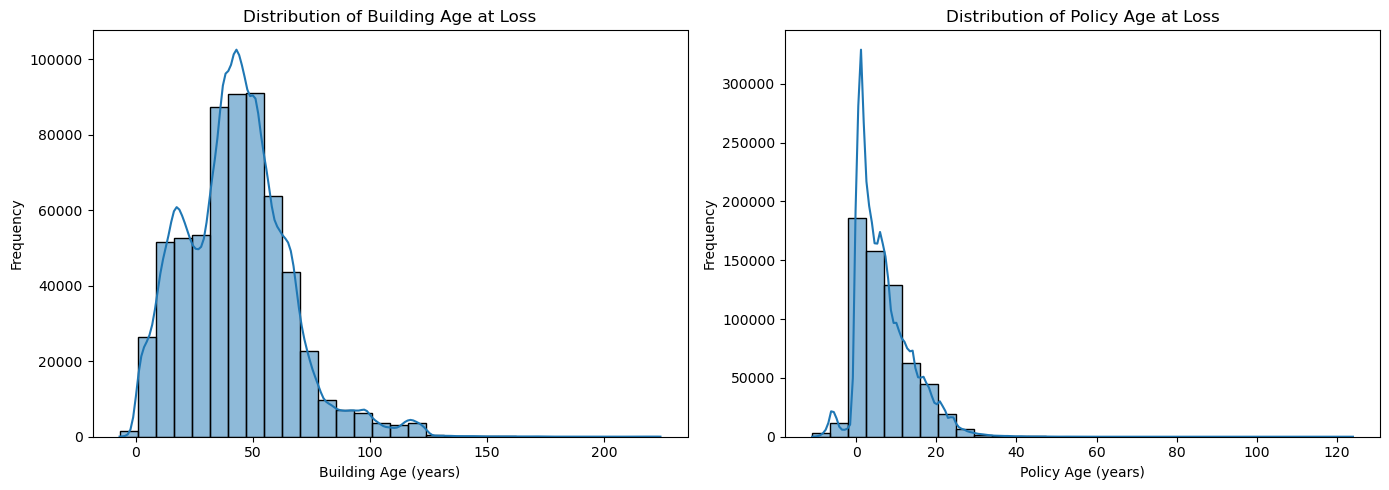

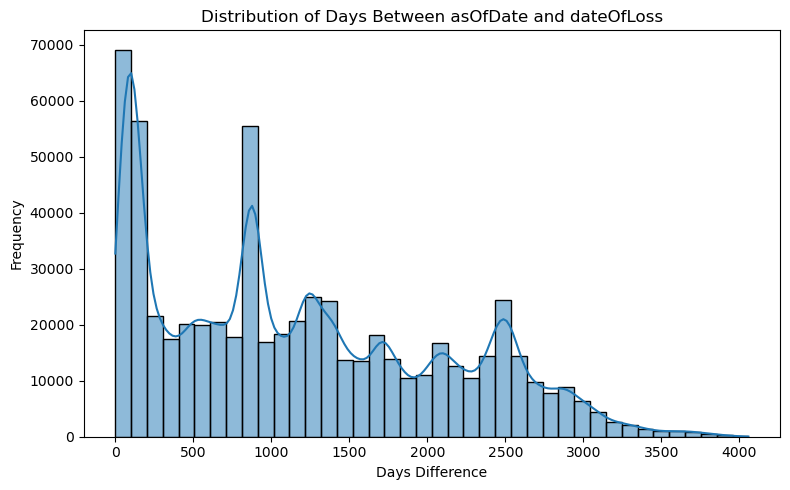

In [123]:

def plot_engineered_date_features(df):
    """
    Plots distributions for the engineered date features:
      - lossYear, lossMonth, lossDay: Histograms to show frequency of claims by year, month, day.
      - buildingAgeAtLoss and policyAgeAtLoss: Histograms with KDE to display the distribution of ages.
      - daysBetweenAsOfAndLoss: Histogram with KDE to display the delay in reporting (can be negative).
    """
    engineered_features = ["yearOfLoss", "lossMonth", "lossDay", 
                             "buildingAgeAtLoss", "policyAgeAtLoss", 
                             "daysBetweenAsOfAndLoss"]
    
    # Plot yearOfLoss, lossMonth, lossDay as separate histograms
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(df["yearOfLoss"].dropna(), bins=range(int(df["yearOfLoss"].min()), int(df["yearOfLoss"].max())+2), edgecolor="black")
    plt.title("Distribution of yearOfLoss")
    plt.xlabel("Year")
    plt.ylabel("Frequency")
    
    plt.subplot(1, 3, 2)
    sns.countplot(x=df["lossMonth"].dropna().astype(int))
    plt.title("Distribution of lossMonth")
    plt.xlabel("Month")
    plt.ylabel("Count")
    
    plt.subplot(1, 3, 3)
    sns.countplot(x=df["lossDay"].dropna().astype(int))
    plt.title("Distribution of lossDay")
    plt.xlabel("Day")
    plt.ylabel("Count")
    
    plt.tight_layout()
    plt.show()
    
    # Plot buildingAgeAtLoss and policyAgeAtLoss as histograms with KDE
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df["buildingAgeAtLoss"].dropna(), kde=True, bins=30, edgecolor="black")
    plt.title("Distribution of Building Age at Loss")
    plt.xlabel("Building Age (years)")
    plt.ylabel("Frequency")
    
    plt.subplot(1, 2, 2)
    sns.histplot(df["policyAgeAtLoss"].dropna(), kde=True, bins=30, edgecolor="black")
    plt.title("Distribution of Policy Age at Loss")
    plt.xlabel("Policy Age (years)")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()
    
    # Plot daysBetweenAsOfAndLoss as histogram with KDE (may include negative values)
    plt.figure(figsize=(8, 5))
    sns.histplot(df["daysBetweenAsOfAndLoss"].dropna(), kde=True, bins=40, edgecolor="black")
    plt.title("Distribution of Days Between asOfDate and dateOfLoss")
    plt.xlabel("Days Difference")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Example usage:
plot_engineered_date_features(nfip_valid)


# Investigating Object type columns and checking the cardinality of fields

Object-type columns: ['basementEnclosureCrawlspaceType', 'elevationDifference', 'baseFloodElevation', 'ratedFloodZone', 'lowestAdjacentGrade', 'lowestFloorElevation', 'occupancyType', 'rateMethod', 'buildingDeductibleCode', 'netBuildingPaymentAmount', 'causeOfDamage', 'condominiumCoverageTypeCode', 'contentsDeductibleCode', 'netContentsPaymentAmount', 'disasterAssistanceCoverageRequired', 'floodEvent', 'nfipRatedCommunityNumber', 'nfipCommunityNumberCurrent', 'nfipCommunityName', 'nonPaymentReasonContents', 'nonPaymentReasonBuilding', 'replacementCostBasis', 'floodZoneCurrent', 'buildingDescriptionCode', 'state', 'reportedCity', 'reportedZipCode', 'countyCode', 'censusTract', 'censusBlockGroupFips']

--- Column: basementEnclosureCrawlspaceType ---
Number of unique values: 5
Sample unique values: ['0.0' '2.0' 'NAN' '1.0' '4.0']


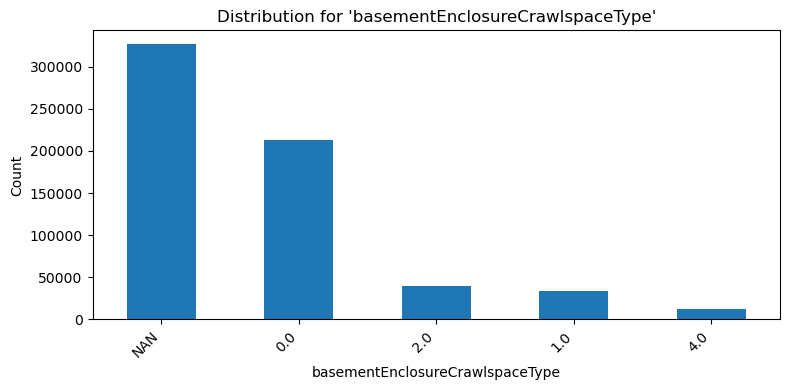


--- Column: elevationDifference ---
Number of unique values: 175
Sample unique values: [Decimal('4.0') Decimal('6.0') Decimal('1.0') Decimal('3.0')
 Decimal('5.0') Decimal('2.0') Decimal('-10.0') Decimal('-6.0')
 Decimal('-4.0') Decimal('8.0')]
High cardinality; skipping detailed plot.

--- Column: baseFloodElevation ---
Number of unique values: 7049
Sample unique values: [Decimal('10.0') Decimal('7.0') Decimal('9.0') Decimal('13.0')
 Decimal('14.0') Decimal('11.0') Decimal('12.0') Decimal('184.0')
 Decimal('164.0') Decimal('164.5')]
High cardinality; skipping detailed plot.

--- Column: ratedFloodZone ---
Number of unique values: 8
Sample unique values: ['AE' 'AH' 'VE' 'OTHER' 'A' 'X' 'C' 'B']


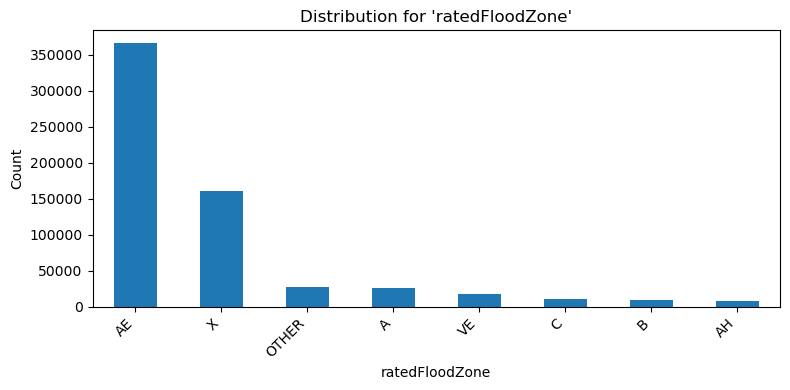


--- Column: lowestAdjacentGrade ---
Number of unique values: 9330
Sample unique values: [Decimal('4.4') Decimal('0.0') Decimal('2.6') Decimal('4.5')
 Decimal('2.4') Decimal('7.7') Decimal('3.2') Decimal('6.5')
 Decimal('189.9') Decimal('63.1')]
High cardinality; skipping detailed plot.

--- Column: lowestFloorElevation ---
Number of unique values: 9356
Sample unique values: [Decimal('14.4') Decimal('16.0') Decimal('8.0') Decimal('12.3')
 Decimal('14.2') Decimal('17.8') Decimal('16.6') Decimal('14.8')
 Decimal('15.0') Decimal('15.7')]
High cardinality; skipping detailed plot.

--- Column: occupancyType ---
Number of unique values: 9
Sample unique values: ['1.0' '2.0' '6.0' '3.0' 'OTHER' '11.0' '4.0' '18.0' '15.0']


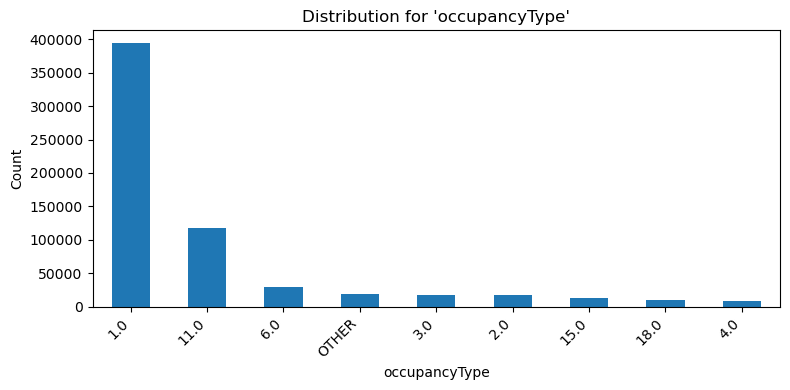


--- Column: rateMethod ---
Number of unique values: 7
Sample unique values: ['OTHER' 'B' '1' 'R' '7' '2' 'RATINGENGINE']


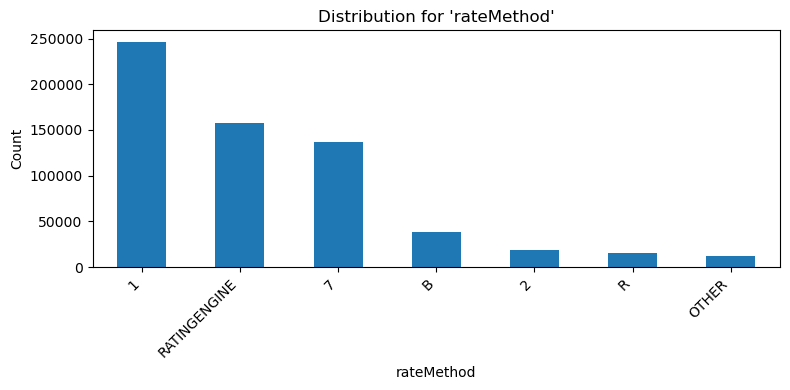


--- Column: buildingDeductibleCode ---
Number of unique values: 9
Sample unique values: ['F' '5' '2' 'A' '1' 'G' '3' 'OTHER' 'NONE']


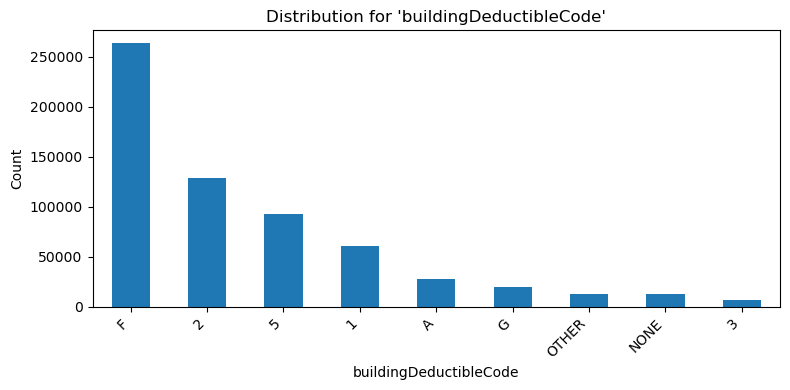


--- Column: netBuildingPaymentAmount ---
Number of unique values: 422089
Sample unique values: [Decimal('2750.18') Decimal('2695.44') Decimal('0.00') Decimal('25156.27')
 Decimal('603.39') Decimal('2375.44') Decimal('8774.15') Decimal('459.07')
 Decimal('42300.14') Decimal('7540.52')]
High cardinality; skipping detailed plot.

--- Column: causeOfDamage ---
Number of unique values: 6
Sample unique values: ['1' '4' '2' 'NONE' '0' 'OTHER']


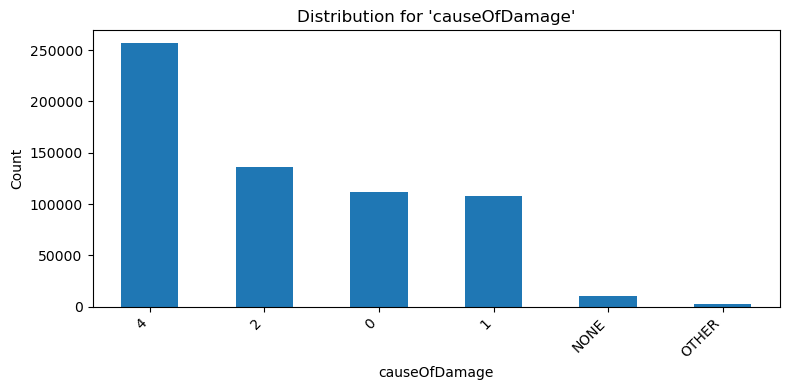


--- Column: condominiumCoverageTypeCode ---
Number of unique values: 4
Sample unique values: ['N' 'OTHER' 'A' 'U']


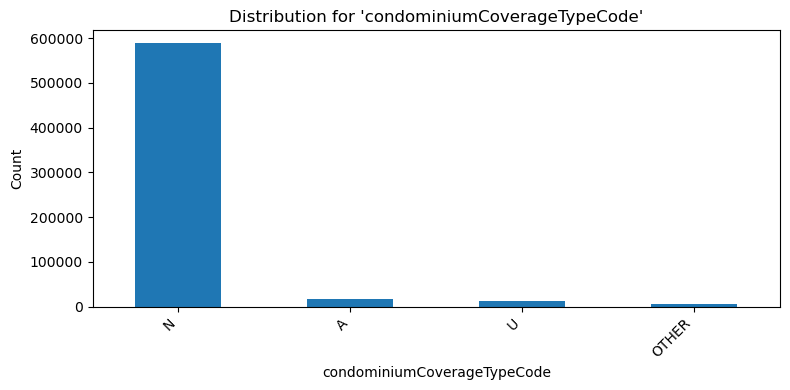


--- Column: contentsDeductibleCode ---
Number of unique values: 9
Sample unique values: ['$1250' 'MISSING' '$5000' '$500' '$10000' '$1000' '$1500' '$2000' 'OTHER']


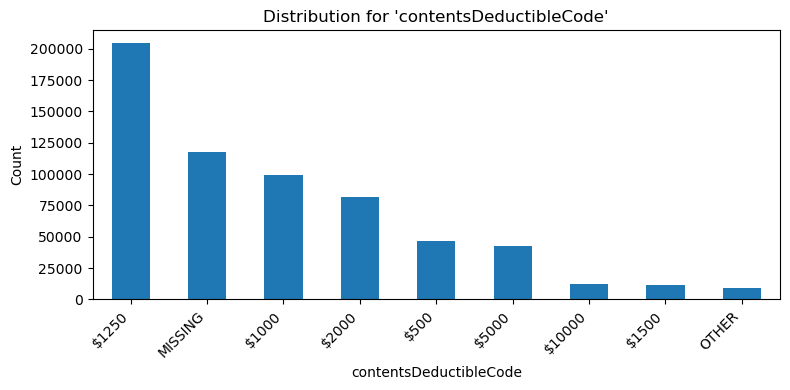


--- Column: netContentsPaymentAmount ---
Number of unique values: 159644
Sample unique values: [Decimal('121.00') Decimal('0.00') Decimal('7427.30') Decimal('3052.38')
 Decimal('70.23') Decimal('25777.94') Decimal('4154.29')
 Decimal('6300.00') Decimal('100000.00') Decimal('20000.00')]
High cardinality; skipping detailed plot.

--- Column: disasterAssistanceCoverageRequired ---
Number of unique values: 3
Sample unique values: ['NOT REQUIRED' 'NAN' 'OTHER']


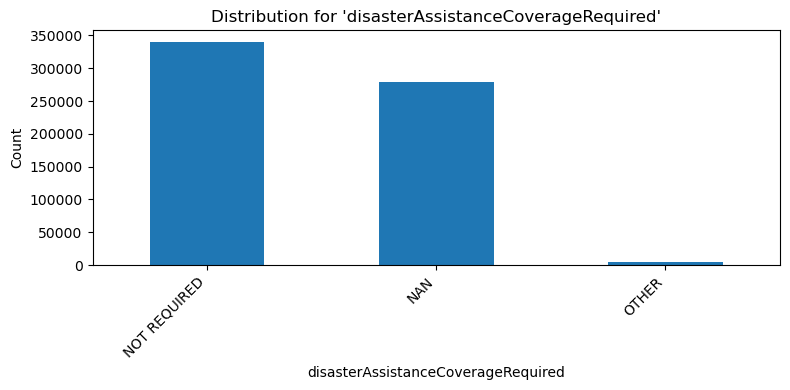


--- Column: floodEvent ---
Number of unique values: 15
Sample unique values: ['HURRICANE SALLY' 'NONE' 'OTHER' 'HURRICANE IRMA' 'HURRICANE IAN'
 'HURRICANE IDA' 'HURRICANE FLORENCE' 'HURRICANE MATTHEW'
 'HURRICANE HARVEY' 'SPRING SEVERE STORMS']


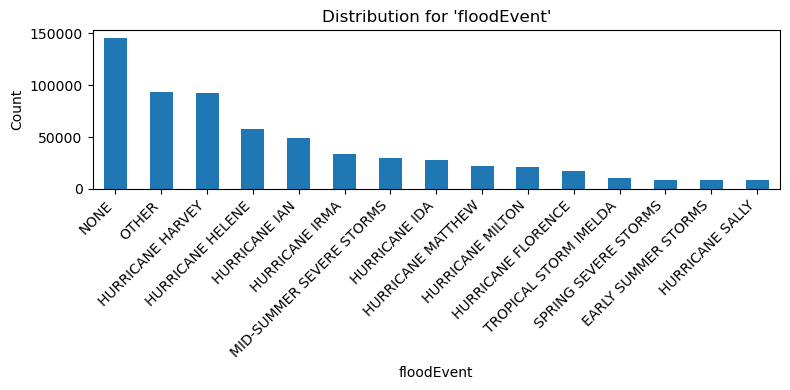


--- Column: nfipRatedCommunityNumber ---
Number of unique values: 11
Sample unique values: ['OTHER' '120067' '125148' '480287' '480296' '120061' '120112' '125124'
 '125095' '125144']


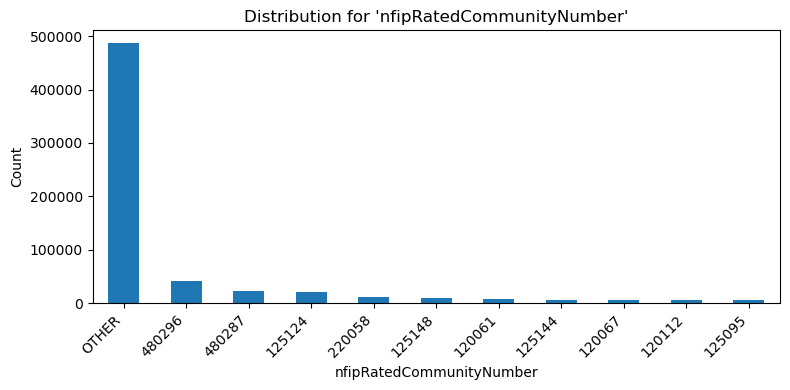


--- Column: nfipCommunityNumberCurrent ---
Number of unique values: 10490
Sample unique values: ['0000' '000000' '010002' '010005' '010006' '010007' '015000' '010009'
 '010010' '010011']
High cardinality; skipping detailed plot.

--- Column: nfipCommunityName ---
Number of unique values: 8933
Sample unique values: ['PRATTVILLE, CITY OF' 'DAPHNE, CITY OF' 'FAIRHOPE, CITY OF'
 'FOLEY, CITY OF' 'LOXLEY, TOWN OF' 'SILVERHILL, TOWN OF'
 'EUFAULA, CITY OF' 'BRENT, CITY OF' 'CALHOUN COUNTY *' 'ONEONTA, CITY OF']
High cardinality; skipping detailed plot.

--- Column: nonPaymentReasonContents ---
Number of unique values: 23
Sample unique values: ['01' '20' '06' '97' '99' '05' '98' '02' '03' '08']


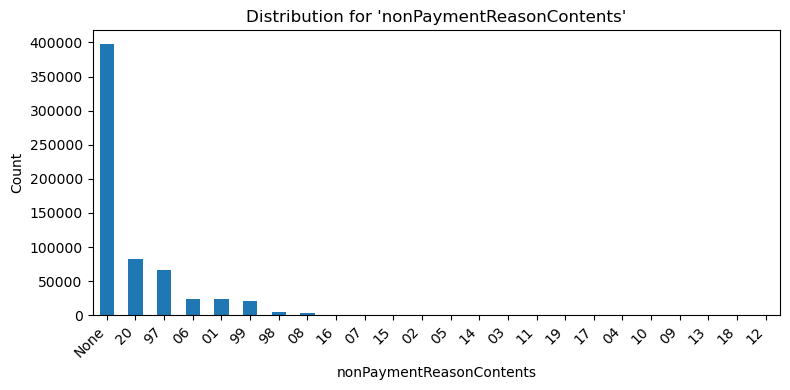


--- Column: nonPaymentReasonBuilding ---
Number of unique values: 23
Sample unique values: ['01' '06' '08' '97' '99' '20' '05' '98' '02' '03']


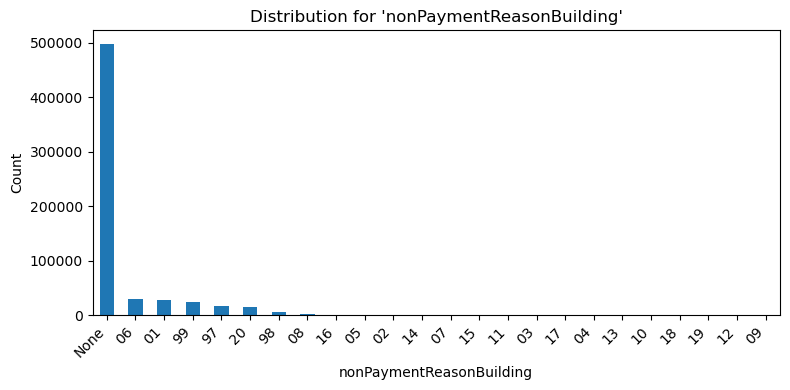


--- Column: replacementCostBasis ---
Number of unique values: 3
Sample unique values: ['ACTUAL CASH VALUE' 'REPLACEMENT COST' 'MISSING']


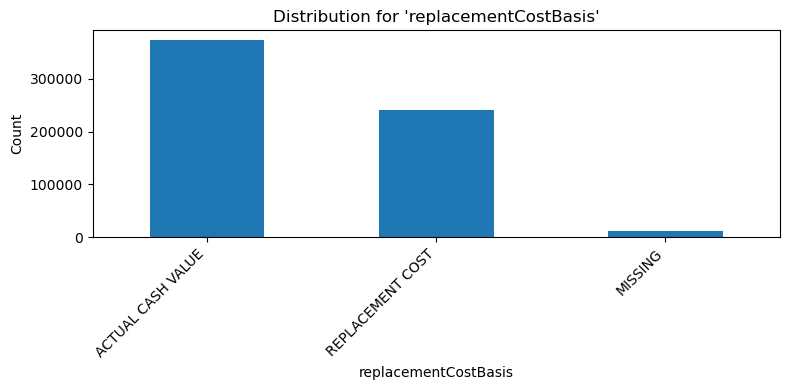


--- Column: floodZoneCurrent ---
Number of unique values: 59
Sample unique values: ['AE' 'AHB' 'V21' 'V15' 'A' 'X' 'VE' 'A05' 'C' 'A06']
High cardinality; skipping detailed plot.

--- Column: buildingDescriptionCode ---
Number of unique values: 3
Sample unique values: ['MAIN HOUSE' 'NAN' 'OTHER']


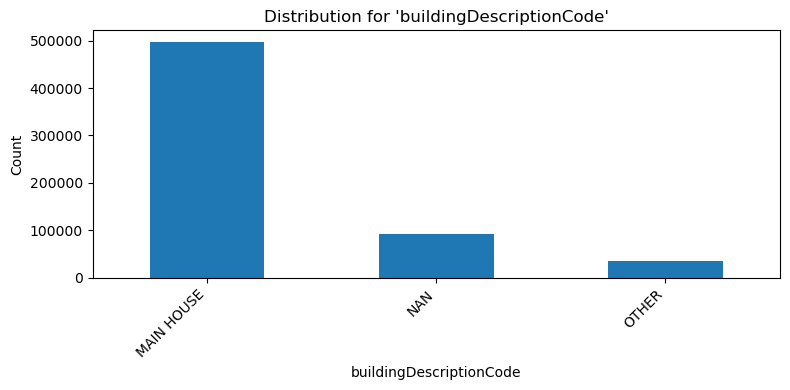


--- Column: state ---
Number of unique values: 14
Sample unique values: ['AL' 'OTHER' 'CA' 'FL' 'LA' 'NY' 'NC' 'SC' 'TX' 'GA']


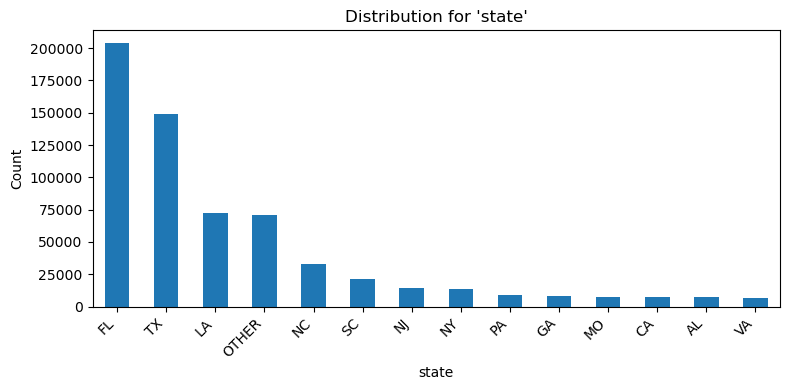


--- Column: reportedCity ---
Number of unique values: 1
Sample unique values: ['CURRENTLY UNAVAILABLE']


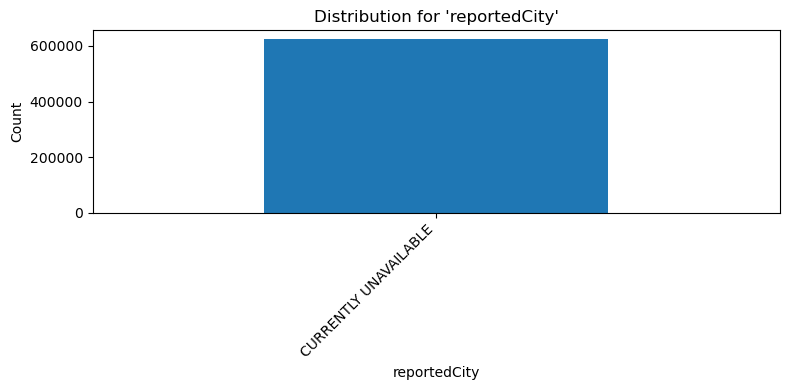


--- Column: reportedZipCode ---
Number of unique values: 195
Sample unique values: ['36542' 'OTHER' '34145' '33703' '34228' '28465' '29582' '77302' '77550'
 '32456']
High cardinality; skipping detailed plot.

--- Column: countyCode ---
Number of unique values: 21
Sample unique values: ['OTHER' '12021' '12086' '12103' '12081' '48201' '48167' '22063' '12011'
 '12015']


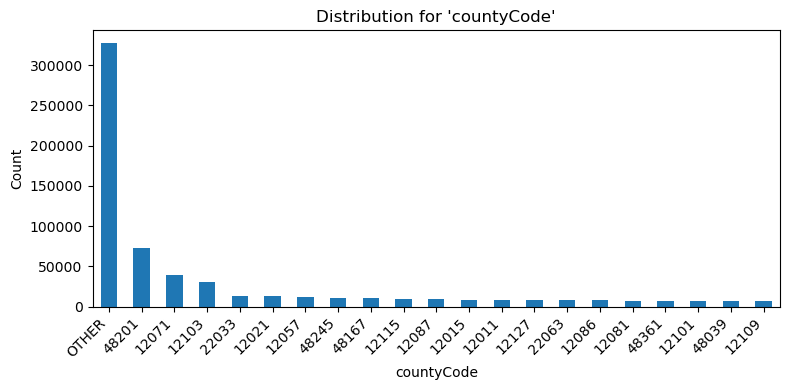


--- Column: censusTract ---
Number of unique values: 96
Sample unique values: ['OTHER' '12103024005' '45051040200' '48007950100' 'NONE' '01003011405'
 '12037970304' '12015010301' '12015030301' '12015030402']
High cardinality; skipping detailed plot.

--- Column: censusBlockGroupFips ---
Number of unique values: 25
Sample unique values: ['OTHER' '121030240052' '450510402001' 'NONE' '120150303013'
 '121030278022' '121010302023' '120710802043' '120710802021'
 '120710802023']


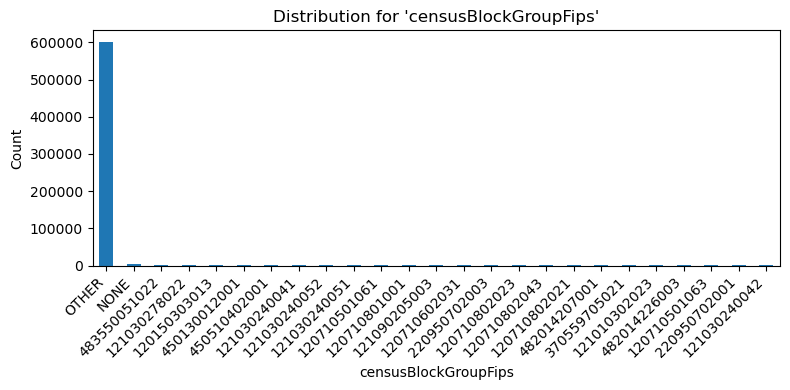

In [1070]:
# Investigate object-type columns and their frequency distribution.
object_cols = nfip_valid.select_dtypes(include=["object"]).columns.tolist()
print("Object-type columns:", object_cols)

for col in object_cols:
    # Skip the 'id' column (it's not relevant for visualization)
    if col.lower() == "id":
        continue
    
    print(f"\n--- Column: {col} ---")
    unique_count = nfip_valid[col].nunique()
    print(f"Number of unique values: {unique_count}")
    
    sample_values = nfip_valid[col].dropna().unique()[:10]
    print("Sample unique values:", sample_values)
    
    # If manageable cardinality (e.g., ≤ 50 unique values), plot the distribution
    if unique_count <= 50:
        plt.figure(figsize=(8, 4))
        nfip_valid[col].value_counts(dropna=False).plot(kind="bar")
        plt.title(f"Distribution for '{col}'")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    else:
        print("High cardinality; skipping detailed plot.")


In [460]:
categorical_cols

['basementEnclosureCrawlspaceType',
 'elevationDifference',
 'baseFloodElevation',
 'ratedFloodZone',
 'lowestAdjacentGrade',
 'lowestFloorElevation',
 'occupancyType',
 'rateMethod',
 'buildingDeductibleCode',
 'causeOfDamage',
 'condominiumCoverageTypeCode',
 'contentsDeductibleCode',
 'disasterAssistanceCoverageRequired',
 'floodEvent',
 'nfipRatedCommunityNumber',
 'nfipCommunityNumberCurrent',
 'nfipCommunityName',
 'nonPaymentReasonContents',
 'nonPaymentReasonBuilding',
 'replacementCostBasis',
 'floodZoneCurrent',
 'buildingDescriptionCode',
 'state',
 'reportedCity',
 'reportedZipCode',
 'countyCode',
 'censusTract',
 'censusBlockGroupFips']

In [127]:
numeric_cols, categorical_cols = separate_numeric_categorical(nfip_valid, force_categorical=force_cat)

print("\nNumeric Columns ("+ str(len(numeric_cols)) +"):")
for col in numeric_cols:
    print(f"  - {col}")

print("\nCategorical Columns ("+ str(len(categorical_cols)) +"):")
for col in categorical_cols:
    print(f"  - {col}")



Numeric Columns (33):
  - agricultureStructureIndicator
  - crsClassificationCode
  - elevatedBuildingIndicator
  - houseWorship
  - locationOfContents
  - numberOfFloorsInTheInsuredBuilding
  - nonProfitIndicator
  - postFIRMConstructionIndicator
  - smallBusinessIndicatorBuilding
  - totalBuildingInsuranceCoverage
  - totalContentsInsuranceCoverage
  - yearOfLoss
  - primaryResidenceIndicator
  - buildingPropertyValue
  - contentsPropertyValue
  - ficoNumber
  - floodWaterDuration
  - floodproofedIndicator
  - iccCoverage
  - numberOfUnits
  - buildingReplacementCost
  - contentsReplacementCost
  - stateOwnedIndicator
  - waterDepth
  - rentalPropertyIndicator
  - latitude
  - longitude
  - claim_approval
  - lossMonth
  - lossDay
  - daysBetweenAsOfAndLoss
  - buildingAgeAtLoss
  - policyAgeAtLoss

Categorical Columns (26):
  - basementEnclosureCrawlspaceType
  - elevationDifference
  - baseFloodElevation
  - ratedFloodZone
  - lowestAdjacentGrade
  - lowestFloorElevation
  - occup

# Imputing Numeric Variables (by stats) and Categorical Variables (by cardinality)

In [129]:
def impute_numeric_by_stats(df, numeric_cols, skip_cols=None):
    """
    Imputes missing values in numeric columns:
      - For datetime columns, uses the median date.
      - For non-datetime numeric columns:
          * Uses the median if the absolute skew is > 1.
          * Otherwise, uses the mean.
    
    Parameters:
      df (pd.DataFrame): DataFrame containing numeric columns.
      numeric_cols (list): List of column names to impute.
      skip_cols (list): Optional list of columns to skip imputation.
    
    Returns:
      pd.DataFrame: DataFrame with imputed numeric values.
    """
    if skip_cols is None:
        skip_cols = []
        
    for col in numeric_cols:
        if col in skip_cols:
            continue
        
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            fill_val = df[col].median()
            print(f"[Datetime] {col}: using median date: {fill_val}")
            df[col] = df[col].fillna(fill_val)
            continue
        
        if df[col].isnull().sum() > 0:
            skewness = df[col].skew()
            if abs(skewness) > 1:
                fill_val = df[col].median()
                print(f"[Numeric] {col}: skew={skewness:.2f} -> using median: {fill_val}")
            else:
                fill_val = df[col].mean()
                print(f"[Numeric] {col}: skew={skewness:.2f} -> using mean: {fill_val}")
            df[col] = df[col].fillna(fill_val)
    return df

def impute_categorical_by_cardinality(df, categorical_cols, reason_fields=None):
    """
    Imputes missing values in categorical columns based on their cardinality.
    
    Special rule: For non-payment reason fields (if provided), fill missing with "00"
    (signifying Approved claims).
    
    For other columns:
      - If low cardinality (≤ 40 unique values), impute with the mode.
      - Otherwise, impute missing with "Other".
    
    Parameters:
      df (pd.DataFrame): DataFrame with categorical columns.
      categorical_cols (list): List of categorical column names.
      reason_fields (list): List of columns that are non-payment reason fields.
          Defaults to ['nonPaymentReasonBuilding', 'nonPaymentReasonContents'].
    
    Returns:
      pd.DataFrame: DataFrame with imputed categorical values.
    """
    if reason_fields is None:
        reason_fields = ['nonPaymentReasonBuilding', 'nonPaymentReasonContents']
    
    for col in categorical_cols:
        if col in reason_fields:
            df[col] = df[col].fillna("00")
            print(f"[Categorical] {col}: reason field -> filled missing with '00'")
        else:
            unique_count = df[col].nunique()
            if unique_count <= 40:
                mode_val = df[col].mode()[0] if not df[col].mode().empty else "Missing"
                df[col] = df[col].fillna(mode_val)
                print(f"[Categorical] {col}: low cardinality ({unique_count}) -> using mode: {mode_val}")
            else:
                df[col] = df[col].fillna("Other")
                print(f"[Categorical] {col}: cardinality ({unique_count}) -> filled missing with 'Other'")
    return df


nfip_valid = impute_numeric_by_stats(nfip_valid, numeric_cols, skip_cols=["claim_approval","asOfDate","dateOfLoss","originalConstructionDate","originalNBDate","policyCount"])
nfip_valid = impute_categorical_by_cardinality(nfip_valid, categorical_cols)


[Numeric] crsClassificationCode: skew=0.49 -> using mean: 6.277202606201172
[Numeric] locationOfContents: skew=1.65 -> using median: 3.0
[Numeric] numberOfFloorsInTheInsuredBuilding: skew=1.90 -> using median: 1.0
[Numeric] totalBuildingInsuranceCoverage: skew=21.13 -> using median: 250000.0
[Numeric] totalContentsInsuranceCoverage: skew=3.70 -> using median: 40000.0
[Numeric] buildingPropertyValue: skew=8.30 -> using median: 179659.5
[Numeric] contentsPropertyValue: skew=0.59 -> using mean: 32497.1779085282
[Numeric] ficoNumber: skew=-1.53 -> using median: 682.0
[Numeric] floodWaterDuration: skew=121.89 -> using median: 0.0
[Numeric] iccCoverage: skew=-346.17 -> using median: 30000.0
[Numeric] numberOfUnits: skew=27.70 -> using median: 1.0
[Numeric] buildingReplacementCost: skew=15.01 -> using median: 232187.0
[Numeric] contentsReplacementCost: skew=8.59 -> using median: 0.0
[Numeric] waterDepth: skew=5.12 -> using median: 1.0
[Numeric] latitude: skew=1.08 -> using median: 30.0
[Numer

In [130]:
numeric_cols

['agricultureStructureIndicator',
 'crsClassificationCode',
 'elevatedBuildingIndicator',
 'houseWorship',
 'locationOfContents',
 'numberOfFloorsInTheInsuredBuilding',
 'nonProfitIndicator',
 'postFIRMConstructionIndicator',
 'smallBusinessIndicatorBuilding',
 'totalBuildingInsuranceCoverage',
 'totalContentsInsuranceCoverage',
 'yearOfLoss',
 'primaryResidenceIndicator',
 'buildingPropertyValue',
 'contentsPropertyValue',
 'ficoNumber',
 'floodWaterDuration',
 'floodproofedIndicator',
 'iccCoverage',
 'numberOfUnits',
 'buildingReplacementCost',
 'contentsReplacementCost',
 'stateOwnedIndicator',
 'waterDepth',
 'rentalPropertyIndicator',
 'latitude',
 'longitude',
 'claim_approval',
 'lossMonth',
 'lossDay',
 'daysBetweenAsOfAndLoss',
 'buildingAgeAtLoss',
 'policyAgeAtLoss']

In [131]:
# Impute missing values for buildingAgeAtLoss and policyAgeAtLoss using median imputation
for col in ["buildingAgeAtLoss", "policyAgeAtLoss"]:
    median_val = nfip_valid[col].median()
    nfip_valid[col] = nfip_valid[col].fillna(median_val)
    print(f"Imputed missing values in {col} with median value: {median_val}")

# Verification: Print count of missing values after imputation
print("Remaining missing in buildingAgeAtLoss:", nfip_valid["buildingAgeAtLoss"].isna().sum())
print("Remaining missing in policyAgeAtLoss:", nfip_valid["policyAgeAtLoss"].isna().sum())


Imputed missing values in buildingAgeAtLoss with median value: 42.85126199500041
Imputed missing values in policyAgeAtLoss with median value: 5.0
Remaining missing in buildingAgeAtLoss: 0
Remaining missing in policyAgeAtLoss: 0


# Waterfall chart

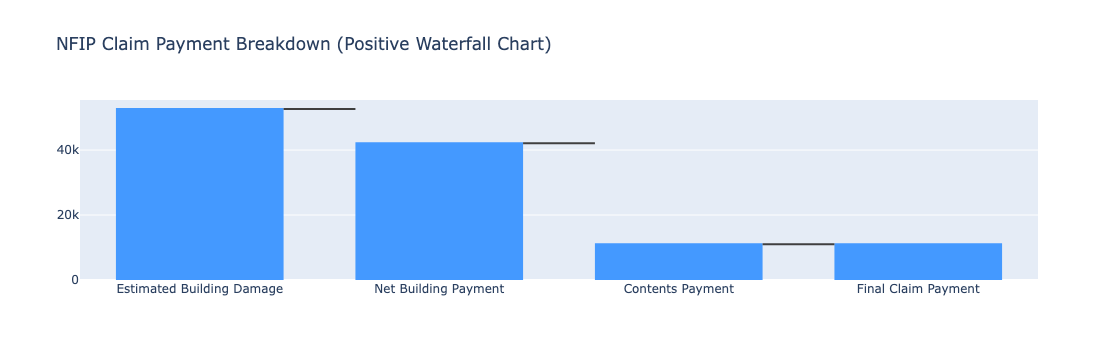

In [1190]:
import plotly.graph_objects as go

def plot_nfip_claim_waterfall_positive(df):
    """
    Creates a positive waterfall chart using NFIP claim variables.
    
    Steps:
      1. Estimated Building Damage = mean(buildingDamageAmount)
      2. Net Building Payment = 80% of Estimated Building Damage 
         (simulated net payment after deductibles/adjustments)
      3. Contents Payment = mean(contentsDamageAmount)
      4. Final Claim Payment = Net Building Payment + Contents Payment
      
    This version avoids negative bars by showing net payments directly.
    """
    # Calculate average values
    est_building = df["buildingDamageAmount"].mean()
    est_contents = df["contentsDamageAmount"].mean()
    
    net_building = 0.8 * est_building  # Simulated net building payment
    final_payment = net_building + est_contents
    
    # Define labels and measures
    x_labels = [
        "Estimated Building Damage", 
        "Net Building Payment", 
        "Contents Payment", 
        "Final Claim Payment"
    ]
    # Use "absolute" for each step; the final step is computed automatically
    measure_types = ["absolute", "absolute", "absolute", "total"]
    
    # Set up y-values:
    # Bar 1: Estimated Building Damage
    # Bar 2: Net Building Payment (80% of estimated)
    # Bar 3: Contents Payment
    # Bar 4: Final Claim Payment (cumulative total)
    y_values = [est_building, net_building, est_contents, 0]
    
    fig = go.Figure(go.Waterfall(
        orientation="v",
        measure=measure_types,
        x=x_labels,
        y=y_values,
        connector={"line": {"color": "rgb(63, 63, 63)"}}
    ))
    
    fig.update_layout(
        title="NFIP Claim Payment Breakdown (Positive Waterfall Chart)",
        waterfallgap=0.3,
        showlegend=False
    )
    
    fig.show()

# Example usage:
plot_nfip_claim_waterfall_positive(nfip_valid)


In [126]:
nfip_valid[numeric_cols].shape

(625054, 33)

# Encoding Categorical Variables on the basis of cardinality

In [135]:
def encode_categorical_by_cardinality(df, categorical_cols, reason_fields=['nonPaymentReasonBuilding', 'nonPaymentReasonContents'], low_threshold=40):
    """
    Encodes categorical variables based on their cardinality.
    
    - For columns with cardinality <= low_threshold, applies one-hot encoding.
    - For columns with higher cardinality, applies frequency encoding.
    
    Special handling:
      * For reason_fields (e.g., nonPaymentReasonBuilding, nonPaymentReasonContents), one-hot encoding is applied.
    
    Parameters:
      df (pd.DataFrame): Input DataFrame.
      categorical_cols (list): List of categorical column names to encode.
      reason_fields (list): List of non-payment reason fields to treat specially.
      low_threshold (int): Threshold for low cardinality (default=40).
    
    Returns:
      pd.DataFrame: DataFrame with encoded categorical variables.
    """
    df_encoded = df.copy()
    
    for col in tqdm(categorical_cols, desc="Encoding categorical columns"):
        # Skip the 'id' column
        if col.lower() in ['id','claim_approval']:
            continue
        
        unique_count = df_encoded[col].nunique()
        print(f"Processing '{col}' with {unique_count} unique values.")
        
        if col in reason_fields:
            dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
            df_encoded = pd.concat([df_encoded.drop(col, axis=1), dummies], axis=1)
            print(f"  -> '{col}' encoded with one-hot (special reason field).")
        else:
            if unique_count <= low_threshold:
                dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
                df_encoded = pd.concat([df_encoded.drop(col, axis=1), dummies], axis=1)
                print(f"  -> '{col}' one-hot encoded.")
            else:
                freq = df_encoded[col].value_counts(normalize=True)
                df_encoded[col + '_freq'] = df_encoded[col].map(freq)
                df_encoded.drop(col, axis=1, inplace=True)
                print(f"  -> '{col}' frequency encoded (new column: '{col}_freq').")
    
    return df_encoded

# Example usage:
nfip_valid = encode_categorical_by_cardinality(nfip_valid, categorical_cols)
print("Encoded DataFrame columns:")
print(nfip_valid.columns)


Encoding categorical columns:   0%|                      | 0/26 [00:00<?, ?it/s]

Processing 'basementEnclosureCrawlspaceType' with 5 unique values.


Encoding categorical columns:   8%|█             | 2/26 [00:00<00:05,  4.33it/s]

  -> 'basementEnclosureCrawlspaceType' one-hot encoded.
Processing 'elevationDifference' with 176 unique values.
  -> 'elevationDifference' frequency encoded (new column: 'elevationDifference_freq').
Processing 'baseFloodElevation' with 7050 unique values.


Encoding categorical columns:  15%|██▏           | 4/26 [00:00<00:04,  5.24it/s]

  -> 'baseFloodElevation' frequency encoded (new column: 'baseFloodElevation_freq').
Processing 'ratedFloodZone' with 8 unique values.
  -> 'ratedFloodZone' one-hot encoded.
Processing 'lowestAdjacentGrade' with 9331 unique values.


Encoding categorical columns:  23%|███▏          | 6/26 [00:01<00:03,  6.37it/s]

  -> 'lowestAdjacentGrade' frequency encoded (new column: 'lowestAdjacentGrade_freq').
Processing 'lowestFloorElevation' with 9357 unique values.
  -> 'lowestFloorElevation' frequency encoded (new column: 'lowestFloorElevation_freq').
Processing 'occupancyType' with 9 unique values.


Encoding categorical columns:  31%|████▎         | 8/26 [00:01<00:03,  5.88it/s]

  -> 'occupancyType' one-hot encoded.
Processing 'rateMethod' with 7 unique values.
  -> 'rateMethod' one-hot encoded.
Processing 'buildingDeductibleCode' with 9 unique values.


Encoding categorical columns:  38%|█████        | 10/26 [00:01<00:02,  6.40it/s]

  -> 'buildingDeductibleCode' one-hot encoded.
Processing 'causeOfDamage' with 6 unique values.
  -> 'causeOfDamage' one-hot encoded.
Processing 'condominiumCoverageTypeCode' with 4 unique values.


Encoding categorical columns:  46%|██████       | 12/26 [00:02<00:02,  6.82it/s]

  -> 'condominiumCoverageTypeCode' one-hot encoded.
Processing 'contentsDeductibleCode' with 9 unique values.
  -> 'contentsDeductibleCode' one-hot encoded.
Processing 'disasterAssistanceCoverageRequired' with 3 unique values.


Encoding categorical columns:  54%|███████      | 14/26 [00:02<00:01,  6.95it/s]

  -> 'disasterAssistanceCoverageRequired' one-hot encoded.
Processing 'floodEvent' with 15 unique values.
  -> 'floodEvent' one-hot encoded.
Processing 'nfipRatedCommunityNumber' with 11 unique values.


Encoding categorical columns:  65%|████████▌    | 17/26 [00:02<00:01,  8.95it/s]

  -> 'nfipRatedCommunityNumber' one-hot encoded.
Processing 'nfipCommunityNumberCurrent' with 10491 unique values.
  -> 'nfipCommunityNumberCurrent' frequency encoded (new column: 'nfipCommunityNumberCurrent_freq').
Processing 'nfipCommunityName' with 8934 unique values.
  -> 'nfipCommunityName' frequency encoded (new column: 'nfipCommunityName_freq').
Processing 'replacementCostBasis' with 2 unique values.


Encoding categorical columns:  77%|██████████   | 20/26 [00:02<00:00,  9.26it/s]

  -> 'replacementCostBasis' one-hot encoded.
Processing 'floodZoneCurrent' with 60 unique values.
  -> 'floodZoneCurrent' frequency encoded (new column: 'floodZoneCurrent_freq').
Processing 'buildingDescriptionCode' with 3 unique values.
  -> 'buildingDescriptionCode' one-hot encoded.


Encoding categorical columns:  81%|██████████▌  | 21/26 [00:03<00:00,  9.16it/s]

Processing 'state' with 14 unique values.
  -> 'state' one-hot encoded.
Processing 'reportedCity' with 1 unique values.


Encoding categorical columns:  92%|████████████ | 24/26 [00:03<00:00, 10.04it/s]

  -> 'reportedCity' one-hot encoded.
Processing 'reportedZipCode' with 195 unique values.
  -> 'reportedZipCode' frequency encoded (new column: 'reportedZipCode_freq').
Processing 'countyCode' with 21 unique values.
  -> 'countyCode' one-hot encoded.
Processing 'censusTract' with 96 unique values.


Encoding categorical columns: 100%|█████████████| 26/26 [00:03<00:00,  7.44it/s]


  -> 'censusTract' frequency encoded (new column: 'censusTract_freq').
Processing 'censusBlockGroupFips' with 25 unique values.
  -> 'censusBlockGroupFips' one-hot encoded.
Encoded DataFrame columns:
Index(['agricultureStructureIndicator', 'crsClassificationCode',
       'elevatedBuildingIndicator', 'houseWorship', 'locationOfContents',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'postFIRMConstructionIndicator', 'smallBusinessIndicatorBuilding',
       'totalBuildingInsuranceCoverage',
       ...
       'censusBlockGroupFips_220950702001',
       'censusBlockGroupFips_220950702003',
       'censusBlockGroupFips_370559705021',
       'censusBlockGroupFips_450130012001',
       'censusBlockGroupFips_450510402001',
       'censusBlockGroupFips_482014207001',
       'censusBlockGroupFips_482014226003',
       'censusBlockGroupFips_483550051022', 'censusBlockGroupFips_NONE',
       'censusBlockGroupFips_OTHER'],
      dtype='object', length=177)


In [125]:
nfip_valid.columns

Index(['agricultureStructureIndicator', 'policyCount', 'crsClassificationCode',
       'elevatedBuildingIndicator', 'houseWorship', 'locationOfContents',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'postFIRMConstructionIndicator', 'smallBusinessIndicatorBuilding',
       ...
       'censusBlockGroupFips_220950702001',
       'censusBlockGroupFips_220950702003',
       'censusBlockGroupFips_370559705021',
       'censusBlockGroupFips_450130012001',
       'censusBlockGroupFips_450510402001',
       'censusBlockGroupFips_482014207001',
       'censusBlockGroupFips_482014226003',
       'censusBlockGroupFips_483550051022', 'censusBlockGroupFips_NONE',
       'censusBlockGroupFips_OTHER'],
      dtype='object', length=221)

In [1196]:
# cols_to_drop = [
#             col for col in ["asOfDate", "dateOfLoss", "originalConstructionDate", "originalNBDate"]
#             if col in nfip_valid.columns
# ]
# nfip_valid.drop(columns=cols_to_drop, inplace=True)
# print(f"Dropped original date columns: {cols_to_drop}")

In [130]:
len(nfip_valid.columns)

177

In [1200]:
# nfip_valid["asOfDate"][0]

# Creating corr_matrix between continuous numeric columns

Using 30 continuous numeric features for the correlation matrix.


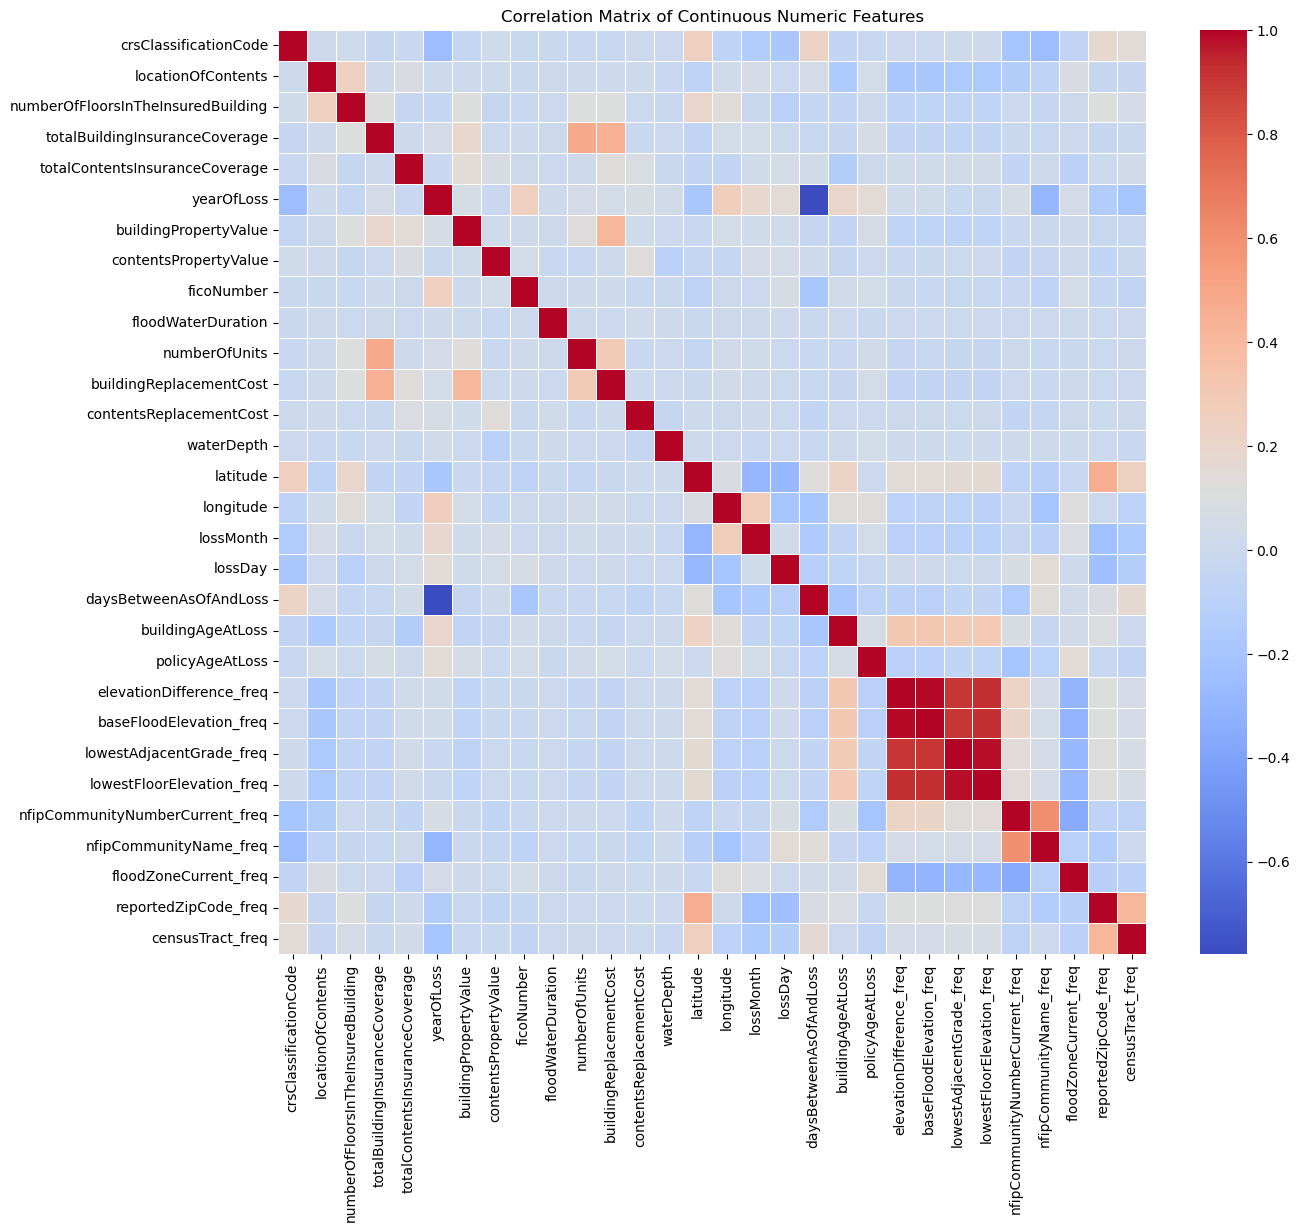

In [136]:
# Select all numeric columns from the encoded DataFrame
all_numeric = nfip_valid.select_dtypes(include=['number'])

# Filter out binary dummy columns (assuming binary dummies only contain 0 and 1)
# We'll keep only columns that have more than 2 unique values.
continuous_cols = [col for col in all_numeric.columns if all_numeric[col].nunique() > 2]

print(f"Using {len(continuous_cols)} continuous numeric features for the correlation matrix.")

# Compute correlation matrix on these continuous features
corr_matrix = nfip_valid[continuous_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Matrix of Continuous Numeric Features")
plt.show()


# Heatmap of Corr matrix with scaled features

42


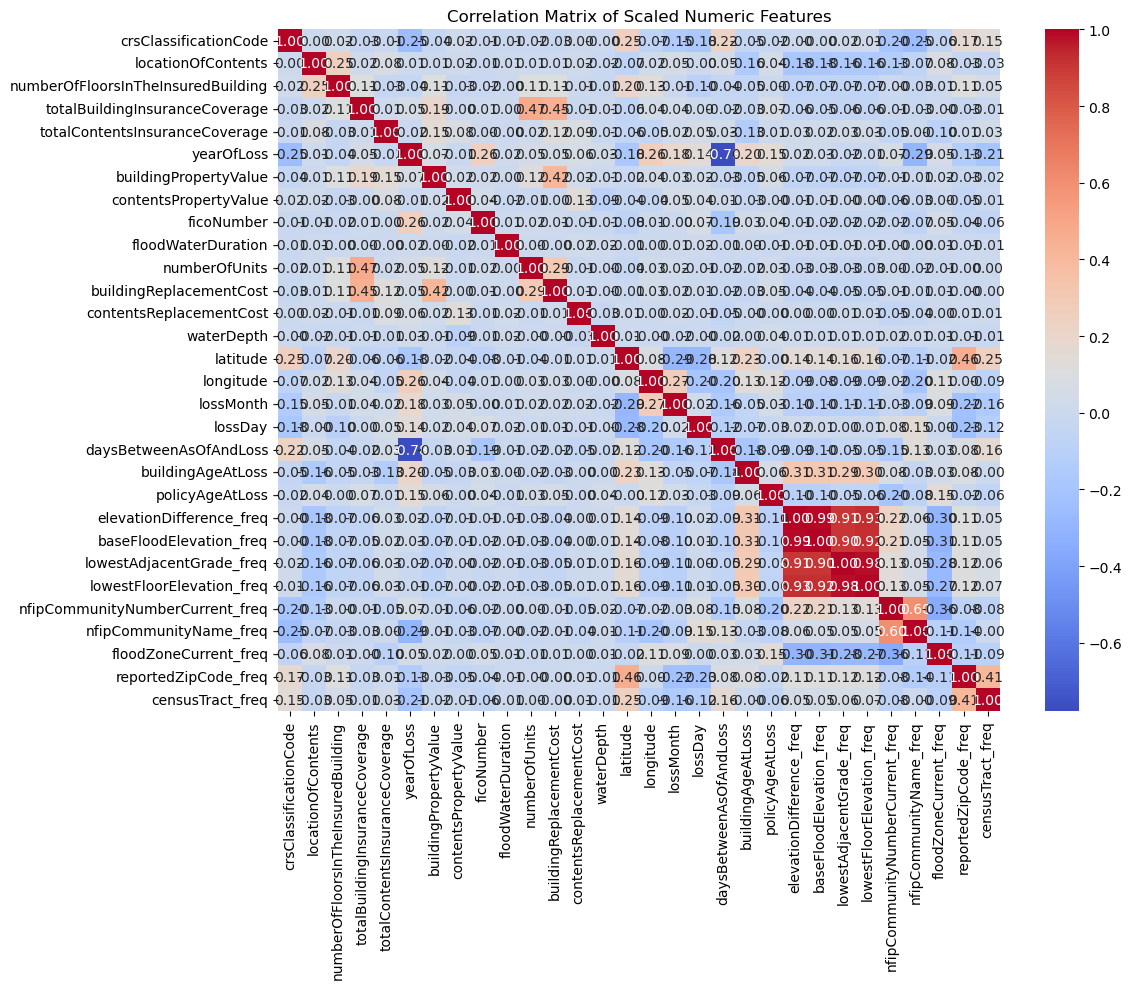

In [140]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numeric columns in nfip_valid
numeric_cols = nfip_valid.select_dtypes(include=[np.number]).columns.tolist()
print(len(numeric_cols))

# Scale the numeric features
scaler = StandardScaler()
scaled_values = scaler.fit_transform(nfip_valid[continuous_cols])
scaled_df = pd.DataFrame(scaled_values, columns=continuous_cols, index=nfip_valid.index)

# Compute the correlation matrix on the scaled data
corr_matrix_scaled = scaled_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_scaled, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Scaled Numeric Features")
plt.tight_layout()
plt.show()


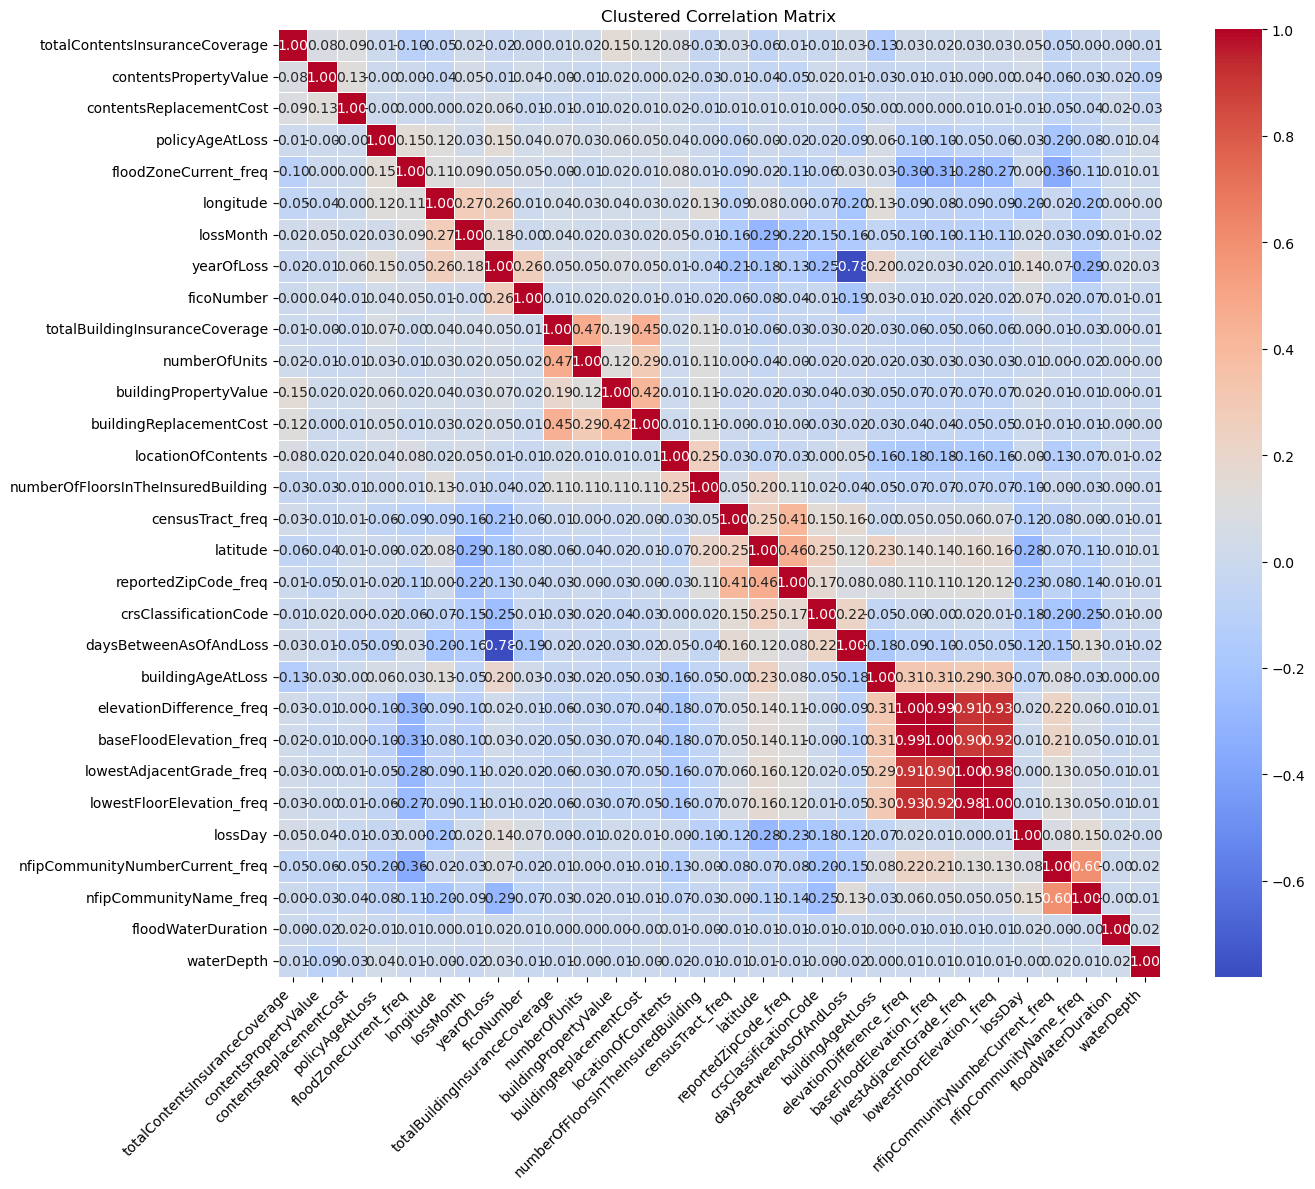

In [142]:
import seaborn as sns
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

def plot_clustered_heatmap(corr, figsize=(14,12), decimals=2):
    # Convert correlation matrix to condensed distance for clustering
    d = 1 - corr  # distance = 1 - correlation
    linkage = sch.linkage(sch.distance.squareform(d), method='average')
    
    # Get cluster order
    dendro = sch.dendrogram(linkage, no_plot=True)
    idx = dendro['leaves']
    
    # Reorder the correlation matrix
    corr_reordered = corr.iloc[idx, :].iloc[:, idx]
    
    # Round if needed
    corr_reordered_rounded = corr_reordered.round(decimals)
    
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_reordered_rounded, 
        annot=True, 
        cmap='coolwarm', 
        fmt=".2f", 
        linewidths=0.5
    )
    plt.title("Clustered Correlation Matrix")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Usage
plot_clustered_heatmap(corr_matrix_scaled)


In [144]:
def get_highly_correlated_pairs(df, threshold=0.90001):
    corr_matrix = df.select_dtypes(include=[np.number]).corr()
    corr_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                corr_pairs.append((col1, col2, corr_value))

    # Sort by absolute correlation value (descending)
    corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
    return corr_pairs_sorted

# Example usage:
high_corr_pairs = get_highly_correlated_pairs(nfip_valid)
for col1, col2, corr in high_corr_pairs:
    print(f"{col1} ↔ {col2} : correlation = {corr:.3f}")


elevationDifference_freq ↔ baseFloodElevation_freq : correlation = 0.991
lowestAdjacentGrade_freq ↔ lowestFloorElevation_freq : correlation = 0.980
elevationDifference_freq ↔ lowestFloorElevation_freq : correlation = 0.925
baseFloodElevation_freq ↔ lowestFloorElevation_freq : correlation = 0.922
elevationDifference_freq ↔ lowestAdjacentGrade_freq : correlation = 0.906
baseFloodElevation_freq ↔ lowestAdjacentGrade_freq : correlation = 0.905


In [146]:
from sklearn.impute import SimpleImputer

# Identify numeric columns in your dataset
numeric_cols = nfip_valid.select_dtypes(include=[np.number]).columns.tolist()

# Create an imputer with median strategy
imputer = SimpleImputer(strategy='median')

# Impute missing values in the numeric features
X_numeric = nfip_valid[numeric_cols]
X_numeric_imputed = imputer.fit_transform(X_numeric)

# Replace the original numeric columns with the imputed values in your DataFrame
nfip_valid[numeric_cols] = X_numeric_imputed

# Now re-check that there are no missing values in numeric features
print(nfip_valid[numeric_cols].isna().sum())


agricultureStructureIndicator         0
crsClassificationCode                 0
elevatedBuildingIndicator             0
houseWorship                          0
locationOfContents                    0
numberOfFloorsInTheInsuredBuilding    0
nonProfitIndicator                    0
postFIRMConstructionIndicator         0
smallBusinessIndicatorBuilding        0
totalBuildingInsuranceCoverage        0
totalContentsInsuranceCoverage        0
yearOfLoss                            0
primaryResidenceIndicator             0
buildingPropertyValue                 0
contentsPropertyValue                 0
ficoNumber                            0
floodWaterDuration                    0
floodproofedIndicator                 0
iccCoverage                           0
numberOfUnits                         0
buildingReplacementCost               0
contentsReplacementCost               0
stateOwnedIndicator                   0
waterDepth                            0
rentalPropertyIndicator               0


# Model after scaled features.

In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Assuming nfip_valid is your preprocessed NFIP DataFrame
# (with leakage columns dropped and the target variable "claim_approval" created)

# Separate features and target
X = nfip_valid.drop(columns=["claim_approval"])
y = nfip_valid["claim_approval"]

# Perform stratified train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a baseline logistic regression model with balanced class weights
model = LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7647806992984617
ROC AUC: 0.8266990465543371

Classification Report:
               precision    recall  f1-score   support

         0.0       0.48      0.71      0.57     27471
         1.0       0.91      0.78      0.84     97540

    accuracy                           0.76    125011
   macro avg       0.69      0.75      0.70    125011
weighted avg       0.81      0.76      0.78    125011



In [149]:
import pandas as pd

importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print(importance.head(50))  # Top predictors


causeOfDamage_2                        0.935080
causeOfDamage_4                        0.925544
causeOfDamage_1                        0.658673
buildingPropertyValue                  0.448735
replacementCostBasis_R                 0.425032
contentsReplacementCost                0.201620
condominiumCoverageTypeCode_N          0.200466
buildingReplacementCost                0.182725
floodEvent_TROPICAL STORM IMELDA       0.162725
floodEvent_MID-SUMMER SEVERE STORMS    0.150338
countyCode_OTHER                       0.115334
floodEvent_HURRICANE HARVEY            0.114330
buildingAgeAtLoss                      0.114070
floodEvent_HURRICANE HELENE            0.111889
lowestFloorElevation_freq              0.101046
nfipRatedCommunityNumber_480296        0.099332
countyCode_48201                       0.097023
contentsPropertyValue                  0.093086
causeOfDamage_OTHER                    0.091842
nfipRatedCommunityNumber_480287        0.091204
floodZoneCurrent_freq                  0

In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress convergence warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Separate features (X) and target (y)
X = nfip_valid.drop(columns=["claim_approval"])
y = nfip_valid["claim_approval"]

# ========================
# Baseline 1: Logistic Regression with Scaling
# ========================

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up stratified K-Fold cross-validation (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Build Logistic Regression with balanced class weights
logreg = LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)

# Evaluate using ROC AUC as the metric
logreg_scores = cross_val_score(logreg, X_scaled, y, cv=cv, scoring='roc_auc')
print("Logistic Regression CV ROC AUC scores:", logreg_scores)
print("Mean ROC AUC for Logistic Regression:", np.mean(logreg_scores))

# ========================
# Baseline 2: Random Forest Classifier (Tree-Based)
# ========================

# For tree-based models, scaling is not necessary.
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
print("\nRandom Forest CV ROC AUC scores:", rf_scores)
print("Mean ROC AUC for Random Forest:", np.mean(rf_scores))


Logistic Regression CV ROC AUC scores: [0.82363209 0.82398039 0.82480025 0.8240195  0.82600475]
Mean ROC AUC for Logistic Regression: 0.8244873971913671

Random Forest CV ROC AUC scores: [0.95427522 0.95443084 0.95373624 0.95463938 0.95504802]
Mean ROC AUC for Random Forest: 0.9544259385614081


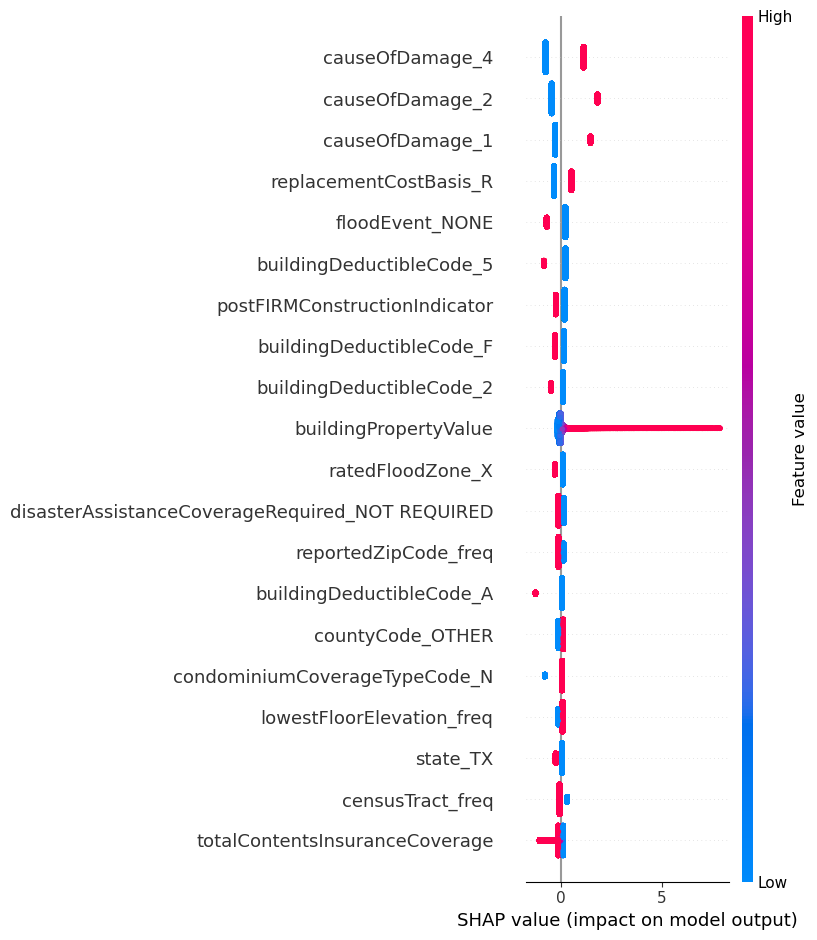

In [152]:
import shap

# Initialize the SHAP explainer for your logistic regression model.
# We use LinearExplainer since we're using a linear model.
explainer = shap.LinearExplainer(model, X_train_scaled, feature_perturbation="interventional")

# Compute SHAP values for the test set.
shap_values = explainer.shap_values(X_test_scaled)

# Plot a summary of SHAP values using a summary plot.
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


# 5 different types of plots with insights

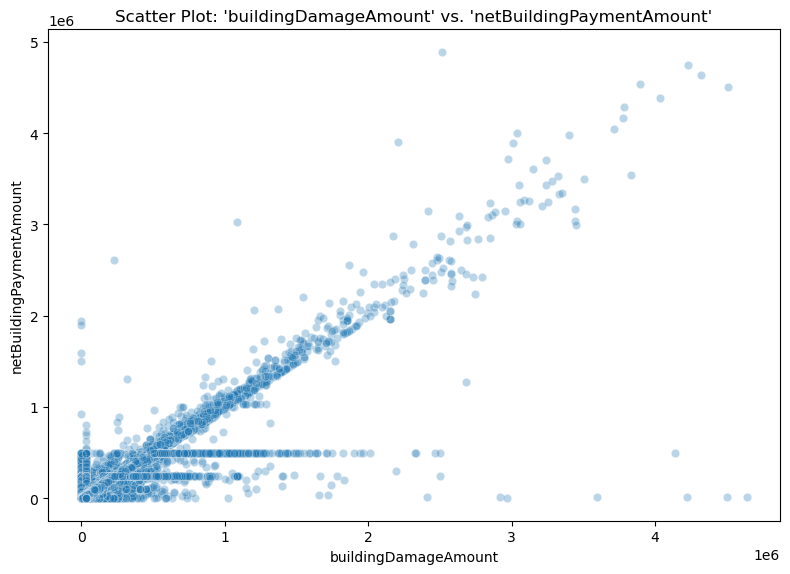

In [180]:

def plot_scatter(df, x_col, y_col):
    """
    Scatter plot for two numeric columns (e.g., buildingDamageAmount vs. netBuildingPaymentAmount).
    Helps visualize how two numeric features relate.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.3)
    plt.title(f"Scatter Plot: '{x_col}' vs. '{y_col}'")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_scatter(nfip_valid, "buildingDamageAmount", "netBuildingPaymentAmount")


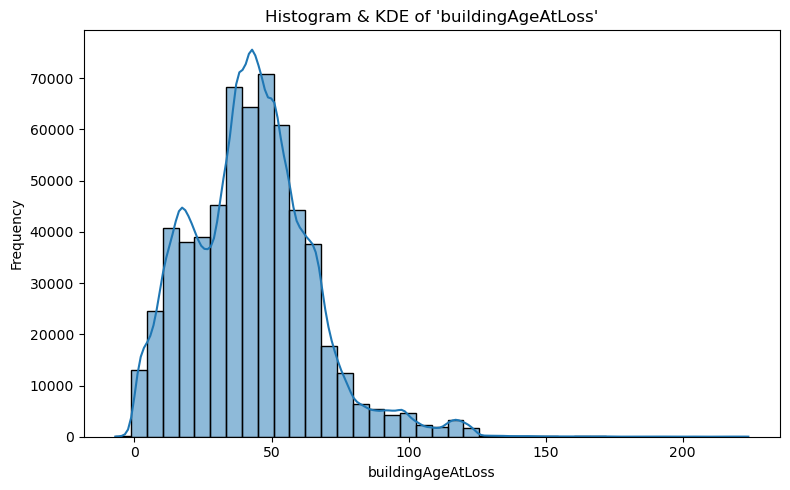

In [186]:
def plot_histogram_kde(df, numeric_col, bins=30):
    """
    Plots a histogram and a Kernel Density Estimate (KDE) for a numeric column.
    E.g., distribution of buildingAgeAtLoss or netBuildingPaymentAmount.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(df[numeric_col].dropna(), kde=True, bins=bins)
    plt.title(f"Histogram & KDE of '{numeric_col}'")
    plt.xlabel(numeric_col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Example usage:
plot_histogram_kde(nfip_valid, "buildingAgeAtLoss", bins=40)


In [194]:
numeric_cols

['agricultureStructureIndicator',
 'asOfDate',
 'policyCount',
 'dateOfLoss',
 'elevatedBuildingIndicator',
 'houseWorship',
 'locationOfContents',
 'numberOfFloorsInTheInsuredBuilding',
 'nonProfitIndicator',
 'originalConstructionDate',
 'originalNBDate',
 'amountPaidOnBuildingClaim',
 'amountPaidOnContentsClaim',
 'amountPaidOnIncreasedCostOfComplianceClaim',
 'postFIRMConstructionIndicator',
 'smallBusinessIndicatorBuilding',
 'totalBuildingInsuranceCoverage',
 'totalContentsInsuranceCoverage',
 'yearOfLoss',
 'primaryResidenceIndicator',
 'buildingDamageAmount',
 'netBuildingPaymentAmount',
 'buildingPropertyValue',
 'contentsDamageAmount',
 'netContentsPaymentAmount',
 'contentsPropertyValue',
 'ficoNumber',
 'floodWaterDuration',
 'floodproofedIndicator',
 'iccCoverage',
 'netIccPaymentAmount',
 'numberOfUnits',
 'buildingReplacementCost',
 'contentsReplacementCost',
 'stateOwnedIndicator',
 'waterDepth',
 'rentalPropertyIndicator',
 'latitude',
 'longitude']

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


# Merging Storm Event data for 2014-2024 year range

In [152]:
df_storm1 = pd.read_csv('./NOAA_STORM_EVENTS_2014_2024/StormEvents_details-ftp_v1.0_d2014_c20231116.csv')
df_storm2 = pd.read_csv('./NOAA_STORM_EVENTS_2014_2024/StormEvents_details-ftp_v1.0_d2015_c20240716.csv')
df_storm3 = pd.read_csv('./NOAA_STORM_EVENTS_2014_2024/StormEvents_details-ftp_v1.0_d2016_c20220719.csv')
df_storm4 = pd.read_csv('./NOAA_STORM_EVENTS_2014_2024/StormEvents_details-ftp_v1.0_d2017_c20250122.csv')
df_storm5 = pd.read_csv('./NOAA_STORM_EVENTS_2014_2024/StormEvents_details-ftp_v1.0_d2018_c20240716.csv')
df_storm6 = pd.read_csv('./NOAA_STORM_EVENTS_2014_2024/StormEvents_details-ftp_v1.0_d2019_c20240117.csv')
df_storm7 = pd.read_csv('./NOAA_STORM_EVENTS_2014_2024/StormEvents_details-ftp_v1.0_d2020_c20240620.csv')
df_storm8 = pd.read_csv('./NOAA_STORM_EVENTS_2014_2024/StormEvents_details-ftp_v1.0_d2021_c20240716.csv')
df_storm9 = pd.read_csv('./NOAA_STORM_EVENTS_2014_2024/StormEvents_details-ftp_v1.0_d2022_c20241121.csv')
df_storm10 = pd.read_csv('./NOAA_STORM_EVENTS_2014_2024/StormEvents_details-ftp_v1.0_d2023_c20250216.csv')
df_storm11 = pd.read_csv('./NOAA_STORM_EVENTS_2014_2024/StormEvents_details-ftp_v1.0_d2024_c20250216.csv')

In [154]:
df_storm1.head()

BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  END_TIME  \
0           201402         18        1000         201402       18      2000   
1           201402          5         300         201402        5      2300   
2           201401         18        1000         201401       19       700   
3           201411         26        1000         201411       27      1000   
4           201402         13         630         201402       14       800   

   EPISODE_ID  EVENT_ID          STATE  STATE_FIPS  ...  END_RANGE  \
0       83473    503953  NEW HAMPSHIRE          33  ...        NaN   
1       83491    504065  NEW HAMPSHIRE          33  ...        NaN   
2       82185    494521  NEW HAMPSHIRE          33  ...        NaN   
3       91728    549746  NEW HAMPSHIRE          33  ...        NaN   
4       83476    503982  NEW HAMPSHIRE          33  ...        NaN   

  END_AZIMUTH END_LOCATION BEGIN_LAT  BEGIN_LON END_LAT END_LON  \
0         NaN          NaN       NaN        NaN     NaN     NaN   
1         NaN          NaN       NaN        NaN     NaN     NaN   
2         NaN          NaN       NaN        NaN     NaN     NaN   
3         NaN          NaN       NaN        NaN     NaN     NaN   
4         NaN          NaN       NaN        NaN     NaN     NaN   

                                   EPISODE_NARRATIVE  \
0  Low pressure developing south of Long Island a...   
1  Low pressure moving off the mid-Atlantic coast...   
2  Low pressure brought a brief period of heavy s...   
3  A strong coastal storm moved up the east coast...   
4  A significant winter storm brought six to twel...   

                                     EVENT_NARRATIVE DATA_SOURCE  
0  Eight to twelve inches of snow fell across eas...         CSV  
1  Six to twelve inches of snow fell across easte...         CSV  
2  Four to eight inches of snow fell across easte...         CSV  
3  Six to eight inches of snow fell across easter...         CSV  
4  Five to eight inches of snow fell across easte...         CSV  

[5 rows x 51 columns]

In [156]:
# List of your 10 dataframes
dfs = [df_storm1, df_storm2, df_storm3, df_storm4, df_storm5, df_storm6, df_storm7, df_storm8, df_storm9, df_storm10]

# Get column sets
column_sets = [set(df.columns) for df in dfs]

# Check if all column sets are the same
all_same = all(cols == column_sets[0] for cols in column_sets)

print("All dataframes have the same columns:", all_same)


All dataframes have the same columns: True


In [158]:
noaa_df = pd.concat(dfs, ignore_index=True)

In [160]:
noaa_df.shape

(629124, 51)

In [286]:
noaa_df.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [371]:
import pandas as pd
import numpy as np

# 1. Subset NOAA dataset to keep only relevant features
final_noaa_columns = [
    "BEGIN_DATE_TIME",  # Event start date
    "EVENT_TYPE",       # Type of weather event (focus on flood-related events)
    "STATE", "STATE_FIPS",  # State identifiers
    "CZ_NAME", "CZ_FIPS",   # Zone/county identifiers
    "DAMAGE_PROPERTY",      # Property damage estimate
    "DAMAGE_CROPS",         # Crop damage estimate
    "MAGNITUDE", "MAGNITUDE_TYPE",  # Storm intensity measures
    "FLOOD_CAUSE",      # Primary cause of flooding
    "CATEGORY",         # Flood category (if available)
    "BEGIN_LAT", "BEGIN_LON",  # Geospatial coordinates (start)
    "END_LAT", "END_LON"       # Geospatial coordinates (end)
]

# Create a subset with these columns (only if they exist in the dataframe)
noaa_selected = noaa_df[[col for col in final_noaa_columns if col in noaa_df.columns]].copy()
print("Initial NOAA shape after subsetting:", noaa_selected.shape)
print("Columns:", noaa_selected.columns.tolist())

Initial NOAA shape after subsetting: (629124, 16)
Columns: ['BEGIN_DATE_TIME', 'EVENT_TYPE', 'STATE', 'STATE_FIPS', 'CZ_NAME', 'CZ_FIPS', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON']


In [373]:
# print(noaa_selected.isna().sum())
(noaa_selected.isnull().sum()/len(noaa_selected))*100

BEGIN_DATE_TIME     0.000000
EVENT_TYPE          0.000000
STATE               0.000000
STATE_FIPS          0.000000
CZ_NAME             0.000000
CZ_FIPS             0.000000
DAMAGE_PROPERTY    20.273905
DAMAGE_CROPS       19.926119
MAGNITUDE          48.125012
MAGNITUDE_TYPE     62.292966
FLOOD_CAUSE        89.123448
CATEGORY           99.950884
BEGIN_LAT          38.771530
BEGIN_LON          38.771530
END_LAT            38.771530
END_LON            38.771530
dtype: float64

# EDA and preprocessing of NOAA

In [376]:
noaa_selected.head()

BEGIN_DATE_TIME  EVENT_TYPE          STATE  STATE_FIPS  \
0  18-FEB-14 10:00:00  Heavy Snow  NEW HAMPSHIRE          33   
1  05-FEB-14 03:00:00  Heavy Snow  NEW HAMPSHIRE          33   
2  18-JAN-14 10:00:00  Heavy Snow  NEW HAMPSHIRE          33   
3  26-NOV-14 10:00:00  Heavy Snow  NEW HAMPSHIRE          33   
4  13-FEB-14 06:30:00  Heavy Snow  NEW HAMPSHIRE          33   

                CZ_NAME  CZ_FIPS DAMAGE_PROPERTY DAMAGE_CROPS  MAGNITUDE  \
0  EASTERN HILLSBOROUGH       12           0.00K        0.00K        NaN   
1  EASTERN HILLSBOROUGH       12           0.00K        0.00K        NaN   
2  EASTERN HILLSBOROUGH       12           0.00K        0.00K        NaN   
3  EASTERN HILLSBOROUGH       12          15.00K        0.00K        NaN   
4  EASTERN HILLSBOROUGH       12           0.00K        0.00K        NaN   

  MAGNITUDE_TYPE FLOOD_CAUSE  CATEGORY  BEGIN_LAT  BEGIN_LON  END_LAT  END_LON  
0            NaN         NaN       NaN        NaN        NaN      NaN      NaN  
1            NaN         NaN       NaN        NaN        NaN      NaN      NaN  
2            NaN         NaN       NaN        NaN        NaN      NaN      NaN  
3            NaN         NaN       NaN        NaN        NaN      NaN      NaN  
4            NaN         NaN       NaN        NaN        NaN      NaN      NaN

In [378]:
print(noaa_selected["DAMAGE_PROPERTY"].value_counts()[0:50])
print(noaa_selected["DAMAGE_CROPS"].value_counts()[0:50])


DAMAGE_PROPERTY
0.00K      376149
1.00K       19547
5.00K       14843
10.00K      13133
2.00K       11971
3.00K        6595
50.00K       5434
0.50K        5312
20.00K       4939
15.00K       4545
25.00K       4495
100.00K      3537
4.00K        2412
30.00K       2174
8.00K        1402
500.00K      1162
250.00K      1150
6.00K        1137
75.00K       1085
200.00K      1084
0.20K        1068
40.00K       1025
150.00K       962
1.50K         920
0.10K         904
7.00K         868
1.00M         793
2.50K         786
12.00K        628
35.00K        540
0.25K         532
300.00K       465
60.00K        461
0.01K         321
2.00M         278
80.00K        262
0.80K         262
400.00K       212
70.00K        207
45.00K        203
0.30K         196
750.00K       187
125.00K       182
5.00M         168
9.00K         167
1.50M         162
10.00M        159
3.00M         158
7.50K         156
3.50K         151
Name: count, dtype: int64
DAMAGE_CROPS
0.00K      495130
1.00K        1386
0.10K    

In [380]:
(noaa_selected["FLOOD_CAUSE"].isnull().sum()/len(noaa_selected))*100

89.12344784176092

In [382]:
(noaa_selected["FLOOD_CAUSE"].isnull().sum()/len(noaa_selected))*100

89.12344784176092

# Converting 

In [385]:
def convert_damage_value(val):
    """
    Converts a damage value string (e.g., '1.00K', '2.50M') into a numeric value.
    Assumes 'K' means thousand and 'M' means million.
    If the value is not a string or is invalid, returns np.nan.
    """
    try:
        if isinstance(val, str):
            val = val.strip()
            if val.endswith("K"):
                return float(val[:-1]) * 1e3
            elif val.endswith("M"):
                return float(val[:-1]) * 1e6
            else:
                # If no suffix, try converting directly
                return float(val)
        else:
            return float(val)
    except Exception as e:
        return np.nan

def convert_damage_columns(df, cols):
    """
    Applies the convert_damage_value function to each specified column in the dataframe.
    
    Parameters:
      df (pd.DataFrame): Input dataframe.
      cols (list): List of column names to convert.
    
    Returns:
      pd.DataFrame: DataFrame with converted columns.
    """
    df = df.copy()
    for col in cols:
        if col in df.columns:
            df[col] = df[col].apply(convert_damage_value)
            print(f"Converted {col}, now stats:\n", df[col].describe())
    return df

# Usage example:
damage_cols = ["DAMAGE_PROPERTY", "DAMAGE_CROPS"]
noaa_selected = convert_damage_columns(noaa_selected, damage_cols)

# Now check the result:
print(noaa_selected[damage_cols].head())


Converted DAMAGE_PROPERTY, now stats:
 count    5.015360e+05
mean     2.154739e+05
std      8.698735e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.500000e+08
Name: DAMAGE_PROPERTY, dtype: float64
Converted DAMAGE_CROPS, now stats:
 count    5.037620e+05
mean     2.696026e+04
std      1.895022e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.000000e+08
Name: DAMAGE_CROPS, dtype: float64
   DAMAGE_PROPERTY  DAMAGE_CROPS
0              0.0           0.0
1              0.0           0.0
2              0.0           0.0
3          15000.0           0.0
4              0.0           0.0


In [387]:


# 2. Drop columns with high missing values (threshold = 70%)
def drop_high_null(df, threshold=0.70):
    missing_percentage = df.isnull().mean()
    cols_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()
    print(f"Dropping {len(cols_to_drop)} columns with > {threshold*100}% missing: {cols_to_drop}")
    return df.drop(columns=cols_to_drop)

noaa_selected = drop_high_null(noaa_selected, threshold=0.70)
print("Shape after dropping high-null columns:", noaa_selected.shape)

# 3. Check and convert data types

print("\nData types before conversion:")
print(noaa_selected.dtypes)

# Convert BEGIN_DATE_TIME to datetime if needed
if not pd.api.types.is_datetime64_any_dtype(noaa_selected["BEGIN_DATE_TIME"]):
    noaa_selected["BEGIN_DATE_TIME"] = pd.to_datetime(noaa_selected["BEGIN_DATE_TIME"], errors="coerce")

# Define numeric features that should be numeric
numeric_features = ["DAMAGE_PROPERTY", "DAMAGE_CROPS", "MAGNITUDE", "BEGIN_LAT", "BEGIN_LON", "END_LAT", "END_LON"]
for col in numeric_features:
    noaa_selected[col] = pd.to_numeric(noaa_selected[col], errors="coerce")

# Define categorical features to convert to strings (or 'category' dtype)
categorical_features = ["EVENT_TYPE", "STATE", "STATE_FIPS", "CZ_NAME", "CZ_FIPS", "MAGNITUDE_TYPE"]
for col in categorical_features:
    noaa_selected[col] = noaa_selected[col].astype(str)

print("\nData types after conversion:")
print(noaa_selected.dtypes)


Dropping 2 columns with > 70.0% missing: ['FLOOD_CAUSE', 'CATEGORY']
Shape after dropping high-null columns: (629124, 14)

Data types before conversion:
BEGIN_DATE_TIME     object
EVENT_TYPE          object
STATE               object
STATE_FIPS           int64
CZ_NAME             object
CZ_FIPS              int64
DAMAGE_PROPERTY    float64
DAMAGE_CROPS       float64
MAGNITUDE          float64
MAGNITUDE_TYPE      object
BEGIN_LAT          float64
BEGIN_LON          float64
END_LAT            float64
END_LON            float64
dtype: object

Data types after conversion:
BEGIN_DATE_TIME    datetime64[ns]
EVENT_TYPE                 object
STATE                      object
STATE_FIPS                 object
CZ_NAME                    object
CZ_FIPS                    object
DAMAGE_PROPERTY           float64
DAMAGE_CROPS              float64
MAGNITUDE                 float64
MAGNITUDE_TYPE             object
BEGIN_LAT                 float64
BEGIN_LON                 float64
END_LAT          

## Checking the number of flood related events

In [389]:
# Defining flood-related event types
flood_related_events = [
    "Hurricane", "Tropical Storm", "Heavy Rain",
    "Flash Flood", "Storm Surge/Tide", "Thunderstorm Wind", "Tornado",
    "Winter Storm", "Flood", "Marine Thunderstorm Wind", "Blizzard",
    "Heavy Snow", "Tropical Storm", "Hurricane", "Hail", "Lakeshore Flood",
    "Hurricane (Typhoon)", "Coastal Flood"
]

# Calculating percentage of NOAA records that contain flood-related events
total_records = len(noaa_selected)
flood_event_records = noaa_selected[noaa_selected["EVENT_TYPE"].isin(flood_related_events)]

# Percentage calculation
flood_event_percentage = (len(flood_event_records) / total_records) * 100

# Display the result
flood_event_percentage, total_records, len(flood_event_records)


(69.7220261824378, 629124, 438638)

In [390]:
(noaa_selected.isnull().sum()/len(noaa_selected))*100

BEGIN_DATE_TIME     0.000000
EVENT_TYPE          0.000000
STATE               0.000000
STATE_FIPS          0.000000
CZ_NAME             0.000000
CZ_FIPS             0.000000
DAMAGE_PROPERTY    20.280263
DAMAGE_CROPS       19.926437
MAGNITUDE          48.125012
MAGNITUDE_TYPE      0.000000
BEGIN_LAT          38.771530
BEGIN_LON          38.771530
END_LAT            38.771530
END_LON            38.771530
dtype: float64

In [394]:
noaa_flood = noaa_selected.loc[noaa_selected["EVENT_TYPE"].isin(flood_related_events)].copy()


In [396]:
noaa_flood.describe()

BEGIN_DATE_TIME  DAMAGE_PROPERTY  DAMAGE_CROPS  \
count                         438638     3.525470e+05  3.552430e+05   
mean   2019-01-23 16:43:38.184790272     2.844467e+05  2.891244e+04   
min              2014-01-01 00:00:00     0.000000e+00  0.000000e+00   
25%              2016-07-15 15:15:00     0.000000e+00  0.000000e+00   
50%              2019-03-14 21:01:00     0.000000e+00  0.000000e+00   
75%              2021-07-13 19:32:15     1.000000e+03  0.000000e+00   
max              2023-12-30 17:52:00     9.000000e+08  5.000000e+08   
std                              NaN     1.014779e+07  2.139295e+06   

           MAGNITUDE      BEGIN_LAT      BEGIN_LON        END_LAT  \
count  279259.000000  374649.000000  374649.000000  374649.000000   
mean       35.835048      37.741081     -90.186058      37.739429   
min         0.130000     -14.400000    -171.032700     -14.382500   
25%         1.750000      34.450000     -97.300000      34.450300   
50%        50.000000      38.230000     -89.496300      38.229600   
75%        52.000000      41.240000     -81.410000      41.240000   
max       126.000000      70.375400     151.848400      70.264600   
std        24.495030       5.089275      11.675231       5.090924   

             END_LON  
count  374649.000000  
mean      -90.179681  
min      -170.905900  
25%       -97.291600  
50%       -89.478900  
75%       -81.410000  
max       151.858900  
std        11.672536

In [398]:
noaa_flood.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438638 entries, 0 to 629123
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BEGIN_DATE_TIME  438638 non-null  datetime64[ns]
 1   EVENT_TYPE       438638 non-null  object        
 2   STATE            438638 non-null  object        
 3   STATE_FIPS       438638 non-null  object        
 4   CZ_NAME          438638 non-null  object        
 5   CZ_FIPS          438638 non-null  object        
 6   DAMAGE_PROPERTY  352547 non-null  float64       
 7   DAMAGE_CROPS     355243 non-null  float64       
 8   MAGNITUDE        279259 non-null  float64       
 9   MAGNITUDE_TYPE   438638 non-null  object        
 10  BEGIN_LAT        374649 non-null  float64       
 11  BEGIN_LON        374649 non-null  float64       
 12  END_LAT          374649 non-null  float64       
 13  END_LON          374649 non-null  float64       
dtypes: datetime64[ns](1), flo

In [400]:
import pandas as pd

missing_values_df = pd.DataFrame({
    "Column": noaa_selected.columns,
    "Missing Values": noaa_selected.isna().sum(),
    "Percentage Missing": (noaa_selected.isna().sum() / len(noaa_selected)) * 100
})

missing_values_df


Column  Missing Values  Percentage Missing
BEGIN_DATE_TIME  BEGIN_DATE_TIME               0            0.000000
EVENT_TYPE            EVENT_TYPE               0            0.000000
STATE                      STATE               0            0.000000
STATE_FIPS            STATE_FIPS               0            0.000000
CZ_NAME                  CZ_NAME               0            0.000000
CZ_FIPS                  CZ_FIPS               0            0.000000
DAMAGE_PROPERTY  DAMAGE_PROPERTY          127588           20.280263
DAMAGE_CROPS        DAMAGE_CROPS          125362           19.926437
MAGNITUDE              MAGNITUDE          302766           48.125012
MAGNITUDE_TYPE    MAGNITUDE_TYPE               0            0.000000
BEGIN_LAT              BEGIN_LAT          243921           38.771530
BEGIN_LON              BEGIN_LON          243921           38.771530
END_LAT                  END_LAT          243921           38.771530
END_LON                  END_LON          243921           38.771530

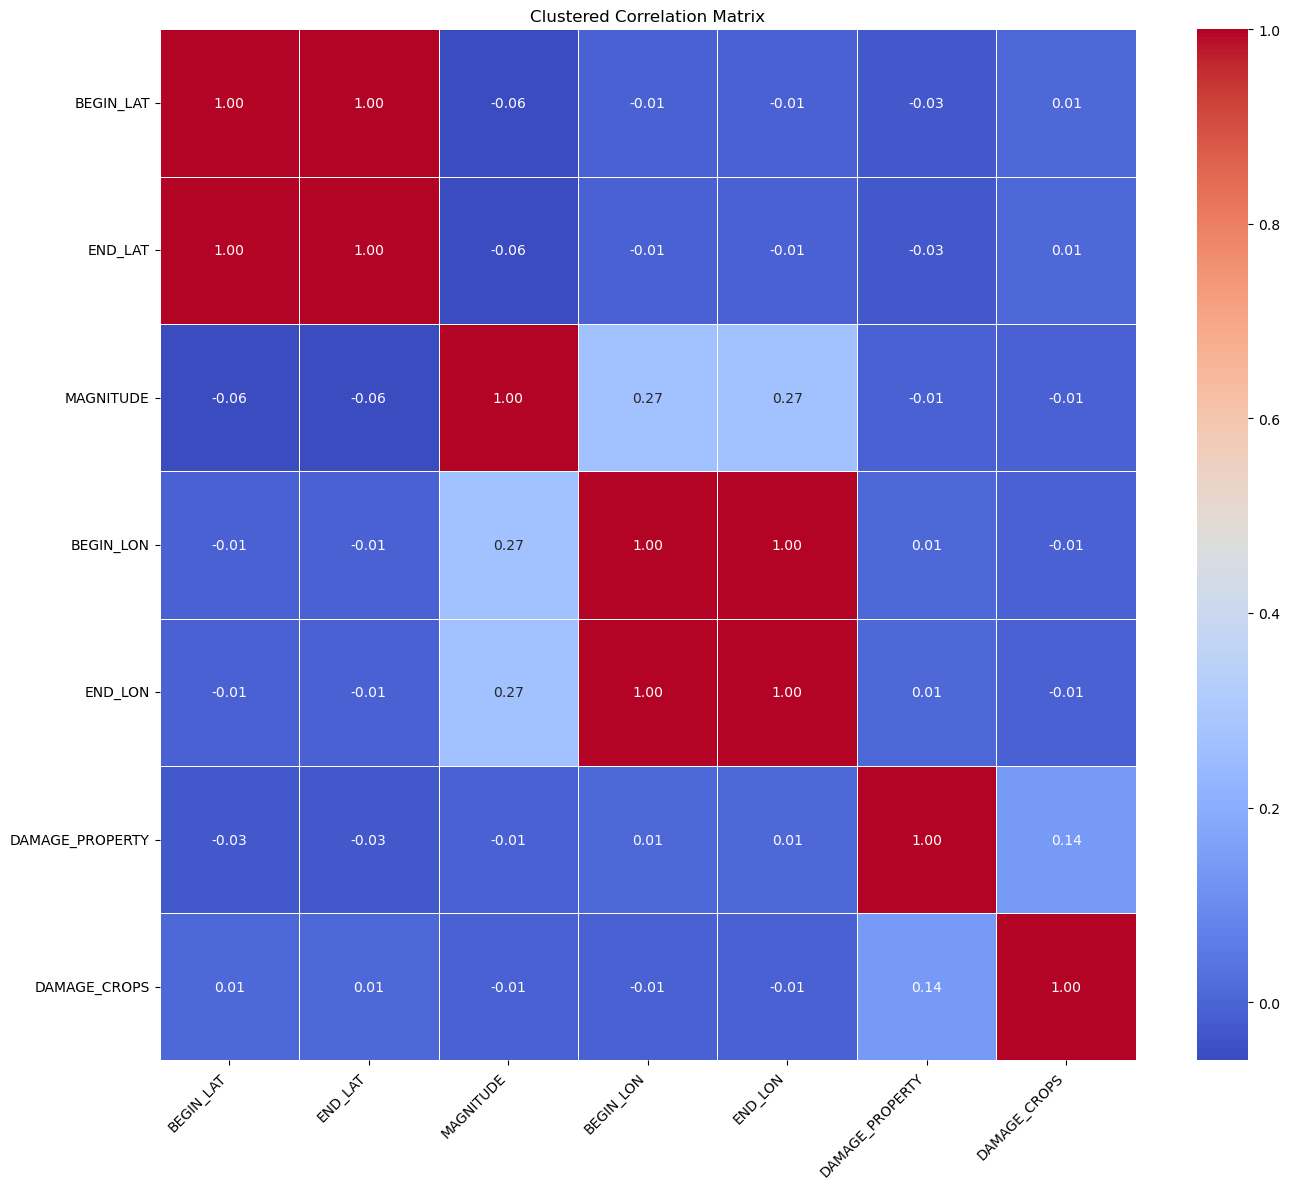

In [402]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Select all numeric columns from the encoded DataFrame
all_numeric = noaa_selected.select_dtypes(include=['number'])

# Filter out binary dummy columns (assuming binary dummies only contain 0 and 1)
# We'll keep only columns that have more than 2 unique values.
continuous_cols = [col for col in all_numeric.columns if all_numeric[col].nunique() > 2]

# Scale the numeric features
scaler = StandardScaler()
scaled_values = scaler.fit_transform(noaa_selected[continuous_cols])
scaled_df = pd.DataFrame(scaled_values, columns=continuous_cols, index=noaa_selected.index)

# Compute the correlation matrix on the scaled data
corr_matrix_scaled = scaled_df.corr()

def plot_clustered_heatmap(corr, figsize=(14,12), decimals=2):
    # Fill any NaN values in the correlation matrix (if any) with 0
    corr = corr.fillna(0)
    
    # Force symmetry by averaging with its transpose
    corr = (corr + corr.T) / 2

    # Convert correlation matrix to condensed distance for clustering
    d = 1 - corr  # distance = 1 - correlation
    linkage = sch.linkage(sch.distance.squareform(d), method='average')
    
    # Get cluster order
    dendro = sch.dendrogram(linkage, no_plot=True)
    idx = dendro['leaves']
    
    # Reorder the correlation matrix
    corr_reordered = corr.iloc[idx, :].iloc[:, idx]
    corr_reordered_rounded = corr_reordered.round(decimals)
    
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_reordered_rounded, 
        annot=True, 
        cmap='coolwarm', 
        fmt=".2f", 
        linewidths=0.5
    )
    plt.title("Clustered Correlation Matrix")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Usage:
plot_clustered_heatmap(corr_matrix_scaled)


# NOAA Outlier Analysis

Analyzing numeric outliers for NOAA dataset:
DAMAGE_PROPERTY: Q1=0.00, Q3=0.00, IQR=0.00, Lower Bound=0.00, Upper Bound=0.00, Outliers=125375


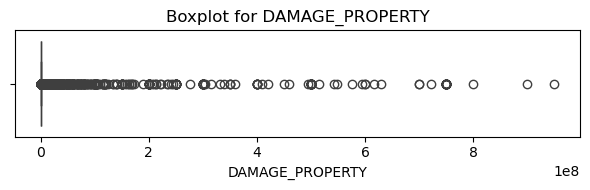

DAMAGE_CROPS: Q1=0.00, Q3=0.00, IQR=0.00, Lower Bound=0.00, Upper Bound=0.00, Outliers=8623


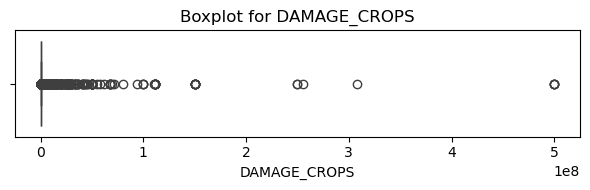

MAGNITUDE: Q1=2.00, Q3=52.00, IQR=50.00, Lower Bound=-73.00, Upper Bound=127.00, Outliers=14


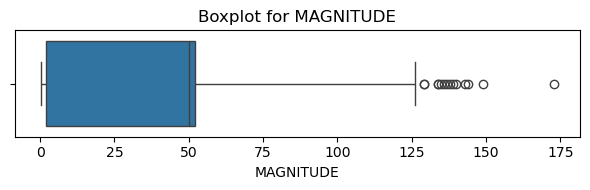

BEGIN_LAT: Q1=34.37, Q3=41.26, IQR=6.89, Lower Bound=24.03, Upper Bound=51.59, Outliers=3585


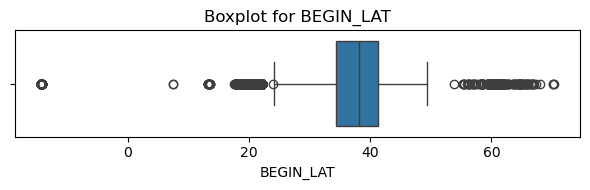

BEGIN_LON: Q1=-97.30, Q3=-81.39, IQR=15.91, Lower Bound=-121.18, Upper Bound=-57.52, Outliers=4668


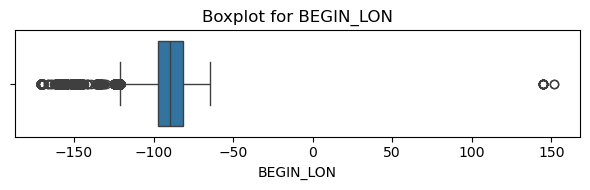

END_LAT: Q1=34.37, Q3=41.26, IQR=6.89, Lower Bound=24.03, Upper Bound=51.59, Outliers=3585


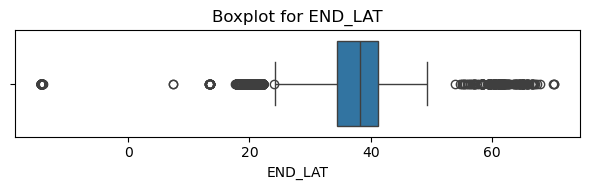

END_LON: Q1=-97.30, Q3=-81.38, IQR=15.92, Lower Bound=-121.17, Upper Bound=-57.51, Outliers=4667


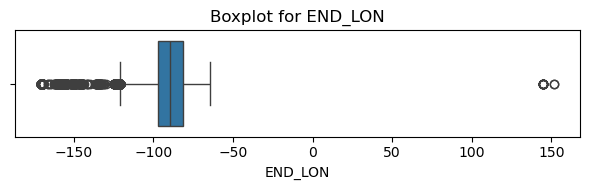


Analyzing categorical distributions for NOAA dataset:

Column: EVENT_TYPE | Unique Values: 55
EVENT_TYPE
Thunderstorm Wind           167280
Hail                         88869
Flash Flood                  39112
Winter Weather               37433
High Wind                    35816
Drought                      30362
Winter Storm                 30030
Flood                        27987
Marine Thunderstorm Wind     23110
Heavy Snow                   22478
Heavy Rain                   14506
Tornado                      13806
Heat                         12336
Excessive Heat               11276
Strong Wind                  10378
Extreme Cold/Wind Chill       8811
Dense Fog                     6987
Frost/Freeze                  5838
Blizzard                      5601
Cold/Wind Chill               5577
Name: count, dtype: int64
High cardinality in EVENT_TYPE; skipping bar plot.

Column: STATE | Unique Values: 69
STATE
TEXAS             46782
KANSAS            23081
VIRGINIA          20964
CALI

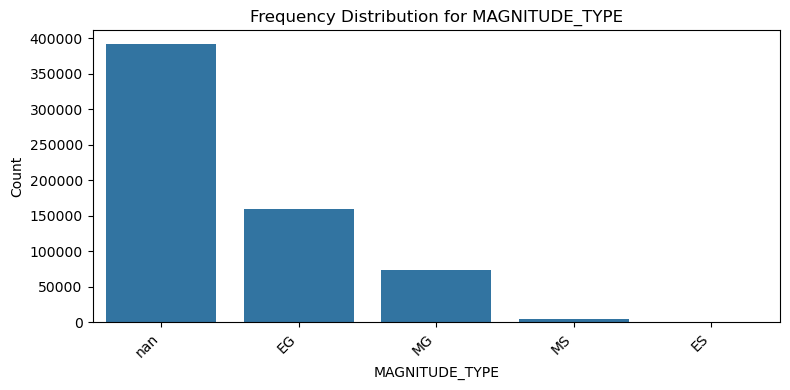

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

def analyze_numeric_outliers(df, numeric_cols, multiplier=1.5):
    """
    For each numeric column in df, computes Q1, Q3, IQR, and defines lower/upper bounds.
    Flags and prints the count of outliers, and displays a boxplot for visual inspection.
    
    Parameters:
      df (pd.DataFrame): Input dataframe.
      numeric_cols (list): List of numeric column names.
      multiplier (float): Multiplier for the IQR to define outliers.
    
    Returns:
      dict: Mapping of column names to (lower_bound, upper_bound, outlier_count).
    """
    outlier_info = {}
    for col in numeric_cols:
        data = df[col].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        count_outliers = outliers.count()
        outlier_info[col] = (lower_bound, upper_bound, count_outliers)
        print(f"{col}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}, Lower Bound={lower_bound:.2f}, Upper Bound={upper_bound:.2f}, Outliers={count_outliers}")
        
        # Plot boxplot
        plt.figure(figsize=(6,2))
        sns.boxplot(x=data)
        plt.title(f"Boxplot for {col}")
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()
    return outlier_info

def analyze_categorical_outliers(df, categorical_cols, top_n=20):
    """
    For each categorical column, prints frequency distribution.
    If the column has ≤50 unique values, plots a bar chart for the top categories.
    
    Parameters:
      df (pd.DataFrame): Input dataframe.
      categorical_cols (list): List of categorical column names.
      top_n (int): Number of top categories to display.
    """
    for col in categorical_cols:
        freq = df[col].value_counts(dropna=False)
        unique_count = freq.shape[0]
        print(f"\nColumn: {col} | Unique Values: {unique_count}")
        print(freq.head(top_n))
        
        if unique_count <= 50:
            plt.figure(figsize=(8,4))
            sns.barplot(x=freq.index.astype(str), y=freq.values)
            plt.title(f"Frequency Distribution for {col}")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()
        else:
            print(f"High cardinality in {col}; skipping bar plot.")

# For the NOAA dataset:
# Identify numeric columns (excluding date fields, which we treat separately)
noaa_numeric_cols = noaa_selected.select_dtypes(include=[np.number]).columns.tolist()

# Identify categorical columns (excluding date/time columns)
noaa_categorical_cols = noaa_selected.select_dtypes(include=["object"]).columns.tolist()

print("Analyzing numeric outliers for NOAA dataset:")
noaa_numeric_outliers = analyze_numeric_outliers(noaa_selected, noaa_numeric_cols)

print("\nAnalyzing categorical distributions for NOAA dataset:")
analyze_categorical_outliers(noaa_selected, noaa_categorical_cols)


# Outlier Handling for Numeric features and transforming categorical domains

In [406]:
import numpy as np
import pandas as pd

def handle_noaa_numeric_outliers(df, lat_range=(15, 72), lon_range=(-179, -66), cap_percentile=0.99):
    """
    Handles numeric outliers for NOAA data:
      1. Drops rows outside plausible lat/lon range.
      2. Floors negative damage to 0.
      3. Caps extreme damage & magnitude at a chosen percentile.
    
    Parameters:
      df (pd.DataFrame): NOAA DataFrame.
      lat_range (tuple): (min_lat, max_lat) for plausible US latitudes.
      lon_range (tuple): (min_lon, max_lon) for plausible US longitudes.
      cap_percentile (float): percentile at which to cap extreme values (e.g. 0.99).
    
    Returns:
      pd.DataFrame: Copy of df with outlier handling applied.
    """
    df_out = df.copy()
    
    # 1. Filter lat/lon out of plausible range
    lat_mask = (df_out["BEGIN_LAT"].between(lat_range[0], lat_range[1], inclusive="both")) & \
               (df_out["END_LAT"].between(lat_range[0], lat_range[1], inclusive="both"))
    lon_mask = (df_out["BEGIN_LON"].between(lon_range[0], lon_range[1], inclusive="both")) & \
               (df_out["END_LON"].between(lon_range[0], lon_range[1], inclusive="both"))
    df_out = df_out[lat_mask & lon_mask]
    
    # 2. Floor negative damage to 0
    for dmg_col in ["DAMAGE_PROPERTY", "DAMAGE_CROPS"]:
        if dmg_col in df_out.columns:
            df_out[dmg_col] = df_out[dmg_col].clip(lower=0)
    
    # 3. Cap extreme damage and magnitude at the chosen percentile
    for col in ["DAMAGE_PROPERTY", "DAMAGE_CROPS", "MAGNITUDE"]:
        if col in df_out.columns:
            upper_cap = df_out[col].quantile(cap_percentile)
            df_out[col] = df_out[col].clip(upper=upper_cap)
    
    return df_out

def handle_noaa_categorical_outliers(df, cat_cols, freq_threshold=100):
    """
    Groups rare categories below a frequency threshold into 'OTHER'.
    Useful for high-cardinality fields like EVENT_TYPE, STATE, etc.
    
    Parameters:
      df (pd.DataFrame): NOAA DataFrame.
      cat_cols (list): List of categorical columns to process.
      freq_threshold (int): Minimum frequency below which categories become 'OTHER'.
    
    Returns:
      pd.DataFrame: Copy of df with rare categories grouped as 'OTHER'.
    """
    df_out = df.copy()
    for col in cat_cols:
        if col in df_out.columns:
            freq = df_out[col].value_counts()
            rare_cats = freq[freq < freq_threshold].index
            df_out[col] = df_out[col].where(~df_out[col].isin(rare_cats), other="OTHER")
    return df_out

# Example usage:
# 1. Numeric outlier handling
noaa_handled_numeric = handle_noaa_numeric_outliers(noaa_selected)

# 2. Categorical outlier handling
# Identify your categorical columns (excluding date/time)
cat_cols = ["EVENT_TYPE", "STATE", "STATE_FIPS", "CZ_NAME", "CZ_FIPS", "MAGNITUDE_TYPE", "FLOOD_CAUSE", "CATEGORY"]
noaa_final = handle_noaa_categorical_outliers(noaa_handled_numeric, cat_cols, freq_threshold=100)

print("Final shape after outlier handling:", noaa_final.shape)
print(noaa_final.head())


Final shape after outlier handling: (384644, 14)
       BEGIN_DATE_TIME         EVENT_TYPE     STATE STATE_FIPS    CZ_NAME  \
10 2014-07-02 12:38:00  Thunderstorm Wind  NEW YORK         36     ALBANY   
11 2014-07-02 13:15:00  Thunderstorm Wind  NEW YORK         36     WARREN   
12 2014-07-02 13:07:00  Thunderstorm Wind  NEW YORK         36     ULSTER   
13 2014-07-02 13:07:00  Thunderstorm Wind  NEW YORK         36  SCHOHARIE   
14 2014-07-02 13:30:00  Thunderstorm Wind  NEW YORK         36   COLUMBIA   

   CZ_FIPS  DAMAGE_PROPERTY  DAMAGE_CROPS  MAGNITUDE MAGNITUDE_TYPE  \
10       1              NaN           NaN       50.0             EG   
11     113              NaN           NaN       50.0             EG   
12     111              NaN           NaN       50.0             EG   
13      95              NaN           NaN       50.0             EG   
14      21              NaN           NaN       50.0             EG   

    BEGIN_LAT  BEGIN_LON  END_LAT  END_LON  
10    42.4719   

In [408]:
noaa_final['EVENT_TYPE'].value_counts() / (len(noaa_final)) * 100

EVENT_TYPE
Thunderstorm Wind           43.484105
Hail                        23.102401
Flash Flood                 10.098169
Flood                        7.246181
Marine Thunderstorm Wind     6.007113
Heavy Rain                   3.753341
Tornado                      3.586433
Lightning                    0.888614
Funnel Cloud                 0.726906
Waterspout                   0.516582
Debris Flow                  0.335375
Marine High Wind             0.146629
Marine Hail                  0.068895
OTHER                        0.039257
Name: count, dtype: float64

In [410]:
# prompt: i want to check how many records having hail EVENT_TYPE have null values in MAGNITUDE column.

# Filter for hail events
hail_events = noaa_final[noaa_final["EVENT_TYPE"] == "Hail"]

# Count null values in MAGNITUDE for hail events
null_magnitude_count = hail_events["MAGNITUDE"].isnull().sum()

print(f"Number of hail events with null MAGNITUDE: {null_magnitude_count}")


Number of hail events with null MAGNITUDE: 0


In [412]:
hail_events['MAGNITUDE'].value_counts()

MAGNITUDE
1.00    36288
1.75    11522
0.75     9534
0.88     8877
1.25     7497
1.50     6855
2.00     3249
2.50     1750
2.75     1446
3.00      591
0.25      305
2.25      224
4.00      188
3.50       75
4.25       67
0.50       52
4.50       49
3.25       46
0.70       29
3.75       20
0.90       17
5.00       17
0.80       12
1.10       11
1.30        6
1.90        5
2.10        5
2.20        4
1.60        4
1.20        4
1.40        4
1.13        4
5.50        4
0.13        3
3.20        3
1.85        3
1.80        3
1.88        3
6.00        3
1.02        2
3.30        2
1.26        2
3.40        2
2.80        2
4.75        2
1.27        2
0.30        2
0.91        2
2.30        2
1.65        2
5.25        2
4.88        1
2.14        1
5.33        1
3.41        1
4.60        1
1.24        1
1.32        1
1.33        1
3.37        1
6.42        1
3.07        1
3.61        1
0.85        1
4.10        1
4.30        1
5.90        1
3.85        1
2.70        1
1.70        1
0.87      

# Creating a new feature HAIL_UPDRAFT_SPEED for HAIL events

In [418]:

# Define function to calculate updraft speed from hail size
def calculate_updraft_speed(hail_size):
    if pd.isna(hail_size):
        return None  # Return None for non-hail events
    return 20 + (35 * hail_size)  # Formula-based conversion

# Apply function only to hail events
noaa_final["HAIL_UPDRAFT_SPEED"] = noaa_final.apply(
    lambda row: calculate_updraft_speed(row["MAGNITUDE"]) if row["EVENT_TYPE"] == "Hail" else None,
    axis=1
)


In [434]:
hail_events = noaa_final.loc[
    (noaa_final["EVENT_TYPE"] != "Hail") & (noaa_final["MAGNITUDE"].notna()),
    ["MAGNITUDE", "HAIL_UPDRAFT_SPEED"]
]

print(hail_events.head(10))


    MAGNITUDE  HAIL_UPDRAFT_SPEED
10       50.0                 0.0
11       50.0                 0.0
12       50.0                 0.0
13       50.0                 0.0
14       50.0                 0.0
15       64.0                 0.0
16       50.0                 0.0
17       60.0                 0.0
20       50.0                 0.0
22       50.0                 0.0


In [426]:

# Set `MAGNITUDE` for hail events to 0
noaa_final.loc[noaa_final["EVENT_TYPE"] == "Hail", "MAGNITUDE"] = 0


In [432]:
noaa_final.loc[noaa_final["EVENT_TYPE"] != "Hail", "HAIL_UPDRAFT_SPEED"] = 0


In [ ]:
# import numpy as np

# # Create a new column 'HAIL_SIZE' that retains the raw magnitude value for hail events
# noaa_final["HAIL_SIZE"] = np.where(noaa_final["EVENT_TYPE"] == "Hail", noaa_final["MAGNITUDE"], np.nan)

# # For hail events, set the 'MAGNITUDE' column to 0 so that it only represents wind speeds for non-hail events
# noaa_final.loc[noaa_final["EVENT_TYPE"] == "Hail", "MAGNITUDE"] = 0

# # Verify the change
# hail_sample = noaa_final.loc[noaa_final["EVENT_TYPE"] == "Hail", ["EVENT_ID", "MAGNITUDE", "HAIL_SIZE"]].head()
# print(hail_sample)


# Imputation and Encoding steps for NOAA

In [436]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Robust Numeric Imputation Function
def impute_noaa_numeric_robust(df, numeric_cols, skew_threshold=1):
    """
    Imputes missing values in numeric columns based on skewness.
    If |skew| > skew_threshold, uses median imputation; otherwise, uses mean imputation.
    """
    df_numeric = df.copy()
    for col in numeric_cols:
        if df_numeric[col].isnull().sum() == 0:
            continue  # no missing values
        skew = df_numeric[col].skew()
        if abs(skew) > skew_threshold:
            impute_val = df_numeric[col].median()
            strategy = "median"
        else:
            impute_val = df_numeric[col].mean()
            strategy = "mean"
        df_numeric[col] = df_numeric[col].fillna(impute_val)
        print(f"Numeric Column: {col} | Skew: {skew:.2f} | Imputed with {strategy}: {impute_val}")
    return df_numeric

# Robust Categorical Imputation Function
def impute_noaa_categorical_robust(df, categorical_cols, method="mode", missing_value="OTHER"):
    """
    Imputes missing values in categorical columns.
    Uses the mode by default, but you can choose a fixed value.
    """
    df_cat = df.copy()
    for col in categorical_cols:
        if df_cat[col].isnull().sum() == 0:
            continue  # no missing values
        if method == "mode":
            mode_val = df_cat[col].mode()[0] if not df_cat[col].mode().empty else missing_value
            df_cat[col] = df_cat[col].fillna(mode_val)
            print(f"Categorical Column: {col} | Imputed missing with mode: {mode_val}")
        else:
            df_cat[col] = df_cat[col].fillna(missing_value)
            print(f"Categorical Column: {col} | Imputed missing with: {missing_value}")
    return df_cat

# Robust Categorical Encoding Function
def encode_noaa_categorical_robust(df, categorical_cols, low_threshold=40):
    """
    Encodes categorical variables:
      - One-hot encoding for columns with cardinality <= low_threshold.
      - Frequency encoding for columns with higher cardinality.
    """
    df_encoded = df.copy()
    for col in categorical_cols:
        unique_count = df_encoded[col].nunique()
        print(f"Encoding Column: {col} | Unique: {unique_count}")
        if unique_count <= low_threshold:
            dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
            df_encoded = pd.concat([df_encoded.drop(col, axis=1), dummies], axis=1)
            print(f"  -> {col} one-hot encoded.")
        else:
            freq = df_encoded[col].value_counts(normalize=True)
            df_encoded[col + "_freq"] = df_encoded[col].map(freq)
            df_encoded.drop(col, axis=1, inplace=True)
            print(f"  -> {col} frequency encoded.")
    return df_encoded

# Apply robust imputation and encoding on NOAA dataset.
# Assume noaa_selected is your NOAA dataset after preliminary feature selection.
# Identify numeric and categorical columns (excluding date fields)
noaa_numeric_cols = noaa_final.select_dtypes(include=[np.number]).columns.tolist()
noaa_categorical_cols = noaa_final.select_dtypes(include=["object"]).columns.tolist()

# Robust numeric imputation
noaa_numeric_imputed = impute_noaa_numeric_robust(noaa_final, noaa_numeric_cols, skew_threshold=1)

# Robust categorical imputation
noaa_imputed = impute_noaa_categorical_robust(noaa_numeric_imputed, noaa_categorical_cols, method="mode", missing_value="OTHER")

# Robust categorical encoding
# Re-identify categorical columns after imputation (they should remain as object dtype)
noaa_categorical_cols_after = noaa_imputed.select_dtypes(include=["object"]).columns.tolist()
noaa_encoded_robust = encode_noaa_categorical_robust(noaa_imputed, noaa_categorical_cols_after, low_threshold=40)

print("Final NOAA dataset shape after robust imputation and encoding:", noaa_encoded_robust.shape)
print(noaa_encoded_robust.head())


Numeric Column: DAMAGE_PROPERTY | Skew: 6.76 | Imputed with median: 0.0
Numeric Column: DAMAGE_CROPS | Skew: 8.92 | Imputed with median: 0.0
Numeric Column: MAGNITUDE | Skew: -0.59 | Imputed with mean: 35.37969400139933
Encoding Column: EVENT_TYPE | Unique: 14
  -> EVENT_TYPE one-hot encoded.
Encoding Column: STATE | Unique: 62
  -> STATE frequency encoded.
Encoding Column: STATE_FIPS | Unique: 62
  -> STATE_FIPS frequency encoded.
Encoding Column: CZ_NAME | Unique: 1061
  -> CZ_NAME frequency encoded.
Encoding Column: CZ_FIPS | Unique: 252
  -> CZ_FIPS frequency encoded.
Encoding Column: MAGNITUDE_TYPE | Unique: 4
  -> MAGNITUDE_TYPE one-hot encoded.
Final NOAA dataset shape after robust imputation and encoding: (384644, 29)
       BEGIN_DATE_TIME  DAMAGE_PROPERTY  DAMAGE_CROPS  MAGNITUDE  BEGIN_LAT  \
10 2014-07-02 12:38:00              0.0           0.0       50.0    42.4719   
11 2014-07-02 13:15:00              0.0           0.0       50.0    43.4885   
12 2014-07-02 13:07:00     

In [438]:
# Alternatively, save as Parquet for faster I/O:
nfip_valid.to_parquet("nfip_valid_processed.parquet")
noaa_encoded_robust.to_parquet("noaa_encoded_robust_processed.parquet")

In [440]:
# Or, if using Parquet:
nfip_valid = pd.read_parquet("nfip_valid_processed.parquet")
noaa_encoded_robust = pd.read_parquet("noaa_encoded_robust_processed.parquet")

In [460]:
# Reconstructing dateOfLoss for merging

In [446]:
import pandas as pd
from tqdm import tqdm

def reconstruct_date_of_loss(nfip_df):
    """
    Reconstructs the 'dateOfLoss' column in the NFIP dataset from the engineered
    columns 'lossYear', 'lossMonth', and 'lossDay'.
    
    Assumes these columns exist and are convertible to integers.
    Returns a copy of the DataFrame with the new 'dateOfLoss' column.
    """
    df = nfip_df.copy()
    # Ensure the lossYear, lossMonth, and lossDay are integers
    df["yearOfLoss"] = df["yearOfLoss"].astype(int)
    df["lossMonth"] = df["lossMonth"].astype(int)
    df["lossDay"] = df["lossDay"].astype(int)
    
    # Construct a date string and convert to datetime
    df["dateOfLoss"] = pd.to_datetime(
        df["yearOfLoss"].astype(str) + "-" +
        df["lossMonth"].astype(str).str.zfill(2) + "-" +
        df["lossDay"].astype(str).str.zfill(2),
        errors="coerce"
    )
    return df

# Reconstruct dateOfLoss in nfip_valid
nfip_valid = reconstruct_date_of_loss(nfip_valid)
print("Reconstructed 'dateOfLoss' sample:")
print(nfip_valid[["yearOfLoss", "lossMonth", "lossDay", "dateOfLoss"]].head())


Reconstructed 'dateOfLoss' sample:
   yearOfLoss  lossMonth  lossDay dateOfLoss
0        2020          9       16 2020-09-16
1        2020          9       16 2020-09-16
2        2016          8        2 2016-08-02
3        2014          9        8 2014-09-08
4        2018          1        9 2018-01-09


In [ ]:
#Merging noaa_encoded_robust and nfip_valid

In [450]:
import pandas as pd
from tqdm import tqdm

def merge_nfip_noaa(nfip_df, noaa_df, time_tolerance="4D", spatial_tolerance=2):
    """
    Merges NFIP and NOAA datasets using a left join.
    
    Merging Criteria:
      - NFIP claim's 'dateOfLoss' must be within 'time_tolerance' (default 4 days) of NOAA's 'BEGIN_DATE_TIME'
      - NFIP property location (latitude, longitude) must be within ±spatial_tolerance degrees (default 2°) 
        of either NOAA's BEGIN or END coordinates.
    
    Parameters:
      nfip_df (pd.DataFrame): Processed NFIP DataFrame with 'dateOfLoss', 'latitude', and 'longitude'.
      noaa_df (pd.DataFrame): Processed NOAA DataFrame with 'BEGIN_DATE_TIME', 'BEGIN_LAT', 'BEGIN_LON', 
                              'END_LAT', and 'END_LON'.
      time_tolerance (str): Time tolerance for merging (e.g., "4D" for 4 days).
      spatial_tolerance (float): Tolerance in degrees for latitude/longitude matching.
    
    Returns:
      pd.DataFrame: The merged DataFrame after applying time and spatial filtering.
    """
    # Work on copies of the dataframes
    nfip = nfip_df.copy()
    noaa = noaa_df.copy()
    
    # Ensure the relevant date columns are datetime
    nfip["dateOfLoss"] = pd.to_datetime(nfip["dateOfLoss"], errors="coerce")
    noaa["BEGIN_DATE_TIME"] = pd.to_datetime(noaa["BEGIN_DATE_TIME"], errors="coerce")
    
    # Add a dummy key for cross join
    nfip["merge_key"] = 1
    noaa["merge_key"] = 1
    
    # Sort both DataFrames by the date column
    nfip_sorted = nfip.sort_values("dateOfLoss").copy()
    noaa_sorted = noaa.sort_values("BEGIN_DATE_TIME").copy()
    
    with tqdm(total=4, desc="Merging NFIP and NOAA") as pbar:
        # Step 1: Merge using merge_asof with backward direction and time tolerance
        merged_df = pd.merge_asof(
            nfip_sorted,
            noaa_sorted,
            left_on="dateOfLoss",
            right_on="BEGIN_DATE_TIME",
            direction="backward",
            tolerance=pd.Timedelta(time_tolerance)
        )
        # Drop the dummy key if it exists
        if "merge_key" in merged_df.columns:
            merged_df.drop(columns=["merge_key"], inplace=True)
        pbar.update(1)
        
        # Step 2: Compute absolute time difference in days
        merged_df["time_diff_days"] = (merged_df["dateOfLoss"] - merged_df["BEGIN_DATE_TIME"]).dt.days.abs()
        pbar.update(1)
        
        # Step 3: Define spatial conditions (latitude and longitude within ±spatial_tolerance)
        lat_condition = (
            merged_df["latitude"].between(merged_df["BEGIN_LAT"] - spatial_tolerance, merged_df["BEGIN_LAT"] + spatial_tolerance) |
            merged_df["latitude"].between(merged_df["END_LAT"] - spatial_tolerance, merged_df["END_LAT"] + spatial_tolerance)
        )
        lon_condition = (
            merged_df["longitude"].between(merged_df["BEGIN_LON"] - spatial_tolerance, merged_df["BEGIN_LON"] + spatial_tolerance) |
            merged_df["longitude"].between(merged_df["END_LON"] - spatial_tolerance, merged_df["END_LON"] + spatial_tolerance)
        )
        pbar.update(1)
        
        # Step 4: Filter by time difference and spatial conditions
        # Here, we interpret time_tolerance "4D" as 4 days.
        time_condition = merged_df["time_diff_days"] <= pd.Timedelta(time_tolerance).days
        final_condition = time_condition & lat_condition & lon_condition
        merged_filtered = merged_df[final_condition].copy()
        merged_filtered.drop(columns=["time_diff_days"], inplace=True)
        pbar.update(1)
    
    print("Merged dataset shape:", merged_filtered.shape)
    return merged_filtered

# Example usage:
# Assume nfip_valid (with reconstructed 'dateOfLoss') and noaa_encoded_robust (or your robust NOAA dataset) are ready.
merged_noaa_nfip = merge_nfip_noaa(nfip_valid, noaa_encoded_robust, time_tolerance="4D", spatial_tolerance=2)


Merging NFIP and NOAA: 100%|██████████████████████| 4/4 [00:00<00:00, 16.36it/s]

Merged dataset shape: (137905, 209)


In [452]:
merged_noaa_nfip_relaxed_time_tolerance = merge_nfip_noaa(nfip_valid, noaa_encoded_robust, time_tolerance="8D", spatial_tolerance=3)


Merging NFIP and NOAA: 100%|██████████████████████| 4/4 [00:00<00:00, 10.58it/s]

Merged dataset shape: (200307, 209)


In [454]:
merged_noaa_nfip_relaxed_space_tolerance = merge_nfip_noaa(nfip_valid, noaa_encoded_robust, time_tolerance="10D", spatial_tolerance=4)


Merging NFIP and NOAA: 100%|██████████████████████| 4/4 [00:00<00:00, 11.99it/s]

Merged dataset shape: (231076, 209)


In [458]:
merged_noaa_nfip_relaxed_time_tolerance.isnull().sum()

agricultureStructureIndicator                      0
crsClassificationCode                              0
elevatedBuildingIndicator                          0
houseWorship                                       0
locationOfContents                                 0
numberOfFloorsInTheInsuredBuilding                 0
nonProfitIndicator                                 0
postFIRMConstructionIndicator                      0
smallBusinessIndicatorBuilding                     0
totalBuildingInsuranceCoverage                     0
totalContentsInsuranceCoverage                     0
yearOfLoss                                         0
primaryResidenceIndicator                          0
buildingPropertyValue                              0
contentsPropertyValue                              0
ficoNumber                                         0
floodWaterDuration                                 0
floodproofedIndicator                              0
iccCoverage                                   

In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

def plot_scaled_corr_matrix(df, numeric_cols=None, figsize=(12,10), decimals=2):
    """
    Scales the numeric columns of the DataFrame using StandardScaler,
    computes the correlation matrix, and plots it as a heatmap.
    
    Parameters:
      df (pd.DataFrame): Merged dataset.
      numeric_cols (list): List of columns to use; if None, automatically detect numeric columns.
      figsize (tuple): Size of the plot.
      decimals (int): Decimal rounding for correlation values.
      
    Returns:
      pd.DataFrame: The computed correlation matrix.
    """
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[numeric_cols])
    scaled_df = pd.DataFrame(scaled_values, columns=numeric_cols, index=df.index)
    
    corr_matrix = scaled_df.corr().round(decimals)
    
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=f".{decimals}f")
    plt.title("Correlation Matrix of Scaled Features")
    plt.tight_layout()
    plt.show()
    
    return corr_matrix

def run_baseline_model(df, target_col, test_size=0.2, random_state=42):
    """
    Splits the dataset into training and testing sets, scales numeric features,
    trains a logistic regression model with balanced class weights, and prints evaluation metrics.
    
    Parameters:
      df (pd.DataFrame): The merged dataset with all features.
      target_col (str): The name of the target variable column.
      test_size (float): Proportion of the dataset to include in the test split.
      random_state (int): Random seed for reproducibility.
      
    Returns:
      model: The trained logistic regression model.
      scaler: The fitted StandardScaler.
    """
    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Identify numeric columns to scale
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    
    # Scale numeric features
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])
    
    # Train Logistic Regression with balanced class weights
    model = LogisticRegression(max_iter=500, class_weight="balanced", random_state=random_state)
    model.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print("Baseline Logistic Regression Performance:")
    print("Accuracy:", acc)
    print("ROC AUC:", roc_auc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    return model, scaler



# Eliminating Features from merged df

In [480]:
def drop_merge_key_and_high_corr_features(df, merge_key="merge_key", corr_threshold=0.9):
    """
    Drops the merge key column if present and eliminates features that are 
    highly correlated (absolute correlation > corr_threshold) to reduce redundancy.
    
    Parameters:
      df (pd.DataFrame): The merged DataFrame.
      merge_key (str): Name of the merge key column (default "merge_key").
      corr_threshold (float): Correlation threshold above which one of the features is dropped.
      
    Returns:
      df_reduced (pd.DataFrame): DataFrame with redundant features dropped.
      dropped_features (list): List of dropped feature names.
    """
    df_reduced = df.copy()
    
    # Step 1: Drop the merge key column if it exists
    if merge_key in df_reduced.columns:
        df_reduced.drop(columns=[merge_key], inplace=True)
        print(f"Dropped merge key column: {merge_key}")
    
    # Step 2: Compute the absolute correlation matrix for numeric features
    numeric_cols = df_reduced.select_dtypes(include=[np.number]).columns.tolist()
    corr_matrix = df_reduced[numeric_cols].corr().abs()
    
    # Create an upper triangle matrix of correlations
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Identify columns to drop: any column with a correlation above the threshold with another column
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold)]
    
    df_reduced.drop(columns=to_drop, inplace=True)
    print(f"Dropped features due to high correlation (> {corr_threshold}): {to_drop}")
    
    return df_reduced, to_drop

# Example usage:
merged_reduced, dropped_feats = drop_merge_key_and_high_corr_features(merged_noaa_nfip, merge_key="merge_key", corr_threshold=0.9)
print("New shape of merged dataset:", merged_reduced.shape)


Dropped features due to high correlation (> 0.9): ['baseFloodElevation_freq', 'lowestAdjacentGrade_freq', 'lowestFloorElevation_freq', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'STATE_FIPS_freq']
New shape of merged dataset: (137905, 201)


In [ ]:
merged_noaa_nfip.to_excel('merged_noaa_nfip.xlsx', index=False)

In [ ]:
plot_clustered_heatmap(merged_noaa_nfip, decimals=1)

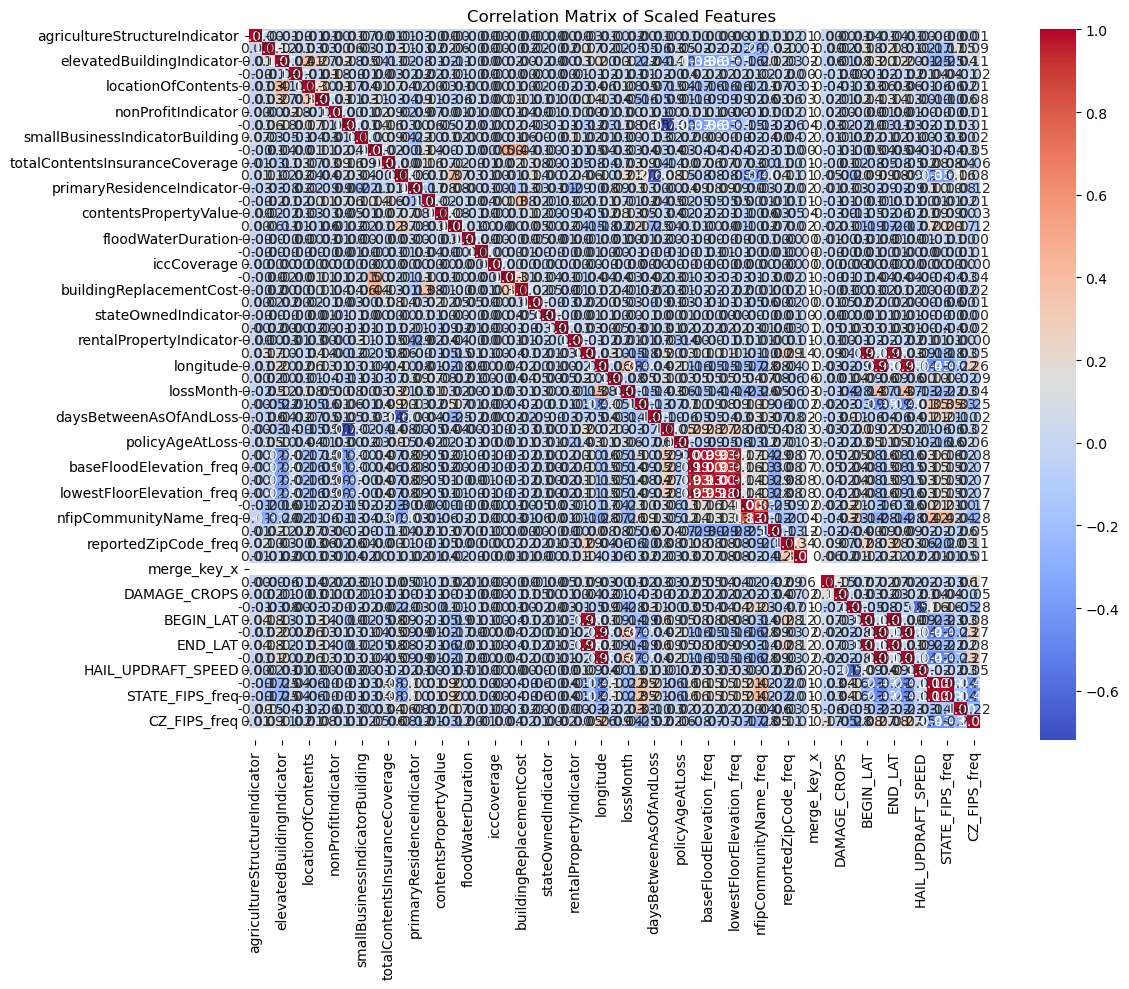

In [464]:
# Example usage:
# 1. Plot the correlation matrix on the merged dataset (assuming merged_df is your merged DataFrame)
corr_matrix = plot_scaled_corr_matrix(merged_noaa_nfip)


In [ ]:
# 2. Run the baseline logistic regression model on the merged dataset
# (Assuming your target column in the merged dataset is 'claim_approval')
model, scaler = run_baseline_model(merged_noaa_nfip, target_col="claim_approval")
